In [1]:
from pyts.multivariate.image import JointRecurrencePlot

In [2]:
import json
from collections import Counter
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Ellipse
import seaborn as sns
import pandas as pd
import networkx as nx
import base64
from collections import defaultdict
import sys,os
import math
import random
import operator
import csv
import matplotlib.pylab as pyl
import itertools
import scipy as sp
from scipy import stats
from scipy import optimize
from scipy.integrate import quad
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_json("data/events/events_Italy.json")
df.head()

eventId           subEventName                                      tags  \
0        8            Simple pass                            [{'id': 1801}]   
1        8            Simple pass                            [{'id': 1801}]   
2        7                  Touch                                        []   
3        1  Ground attacking duel  [{'id': 504}, {'id': 703}, {'id': 1801}]   
4        1  Ground attacking duel  [{'id': 503}, {'id': 703}, {'id': 1801}]   

   playerId                                 positions  matchId  \
0      8327  [{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]  2575959   
1     20438  [{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]  2575959   
2      8306  [{'y': 17, 'x': 36}, {'y': 56, 'x': 78}]  2575959   
3      8306  [{'y': 56, 'x': 78}, {'y': 15, 'x': 64}]  2575959   
4      8306  [{'y': 15, 'x': 64}, {'y': 15, 'x': 72}]  2575959   

            eventName  teamId matchPeriod  eventSec subEventId         id  
0                Pass    3158          1H  2.530536         85  180423957  
1                Pass    3158          1H  3.768418         85  180423958  
2  Others on the ball    3158          1H  4.868265         72  180423959  
3                Duel    3158          1H  8.114676         11  180423960  
4                Duel    3158          1H  8.647892         11  180423961

In [7]:
time_event = df[['eventSec', 'eventName','matchId','teamId','tags']]


In [8]:
time_event = time_event.loc[time_event['matchId'] == 2576315]
time_event.shape

(1507, 5)

In [9]:
fix_event = pd.DataFrame(time_event)
fe = fix_event.reset_index()

In [5]:
th = pd.read_json("data/matches/matches_Italy.json")
th.head()

status  roundId  gameweek  \
0  Played  4406278        38   
1  Played  4406278        38   
2  Played  4406278        38   
3  Played  4406278        38   
4  Played  4406278        38   

                                           teamsData  seasonId  \
0  {'3162': {'scoreET': 0, 'coachId': 251025, 'si...    181248   
1  {'3158': {'scoreET': 0, 'coachId': 210119, 'si...    181248   
2  {'3173': {'scoreET': 0, 'coachId': 251044, 'si...    181248   
3  {'3165': {'scoreET': 0, 'coachId': 272970, 'si...    181248   
4  {'3166': {'scoreET': 0, 'coachId': 20481, 'sid...    181248   

               dateutc  winner                                     venue  \
0  2018-05-20 18:45:00    3161                                             
1  2018-05-20 18:45:00    3158  MAPEI Stadium - Citt\u00e0 del Tricolore   
2  2018-05-20 16:00:00    3173                                             
3  2018-05-20 16:00:00    3165                                             
4  2018-05-20 16:00:00    3163                                             

      wyId                          label                              date  \
0  2576335  Lazio - Internazionale, 2 - 3  May 20, 2018 at 8:45:00 PM GMT+2   
1  2576336         Sassuolo - Roma, 0 - 1  May 20, 2018 at 8:45:00 PM GMT+2   
2  2576329     Cagliari - Atalanta, 1 - 0  May 20, 2018 at 6:00:00 PM GMT+2   
3  2576330      Chievo - Benevento, 1 - 0  May 20, 2018 at 6:00:00 PM GMT+2   
4  2576331       Udinese - Bologna, 1 - 0  May 20, 2018 at 6:00:00 PM GMT+2   

                                            referees duration  competitionId  
0  [{'refereeId': 377206, 'role': 'referee'}, {'r...  Regular            524  
1  [{'refereeId': 377255, 'role': 'referee'}, {'r...  Regular            524  
2  [{'refereeId': 377247, 'role': 'referee'}, {'r...  Regular            524  
3  [{'refereeId': 377246, 'role': 'referee'}, {'r...  Regular            524  
4  [{'refereeId': 377254, 'role': 'referee'}, {'r...  Regular            524

In [6]:
ci = th.loc[th['winner'] == 3161]#Chievo
ci

status  roundId  gameweek  \
0    Played  4406278        38   
27   Played  4406278        36   
43   Played  4406278        34   
59   Played  4406278        33   
92   Played  4406278        30   
104  Played  4406278        29   
128  Played  4406278        26   
141  Played  4406278        24   
237  Played  4406278        15   
248  Played  4406278        14   
253  Played  4406278        13   
271  Played  4406278        11   
290  Played  4406278        10   
302  Played  4406278         8   
313  Played  4406278         7   
326  Played  4406278         6   
350  Played  4406278         4   
358  Played  4406278         3   
367  Played  4406278         2   
372  Played  4406278         1   

                                             teamsData  seasonId  \
0    {'3162': {'scoreET': 0, 'coachId': 251025, 'si...    181248   
27   {'3163': {'scoreET': 0, 'coachId': 267555, 'si...    181248   
43   {'3165': {'scoreET': 0, 'coachId': 21603, 'sid...    181248   
59   {'3173': {'scoreET': 0, 'coachId': 251044, 'si...    181248   
92   {'3194': {'scoreET': 0, 'coachId': 270032, 'si...    181248   
104  {'3164': {'scoreET': 0, 'coachId': 0, 'side': ...    181248   
128  {'3219': {'scoreET': 0, 'coachId': 83888, 'sid...    181248   
141  {'3166': {'scoreET': 0, 'coachId': 20481, 'sid...    181248   
237  {'3165': {'scoreET': 0, 'coachId': 21603, 'sid...    181248   
248  {'3173': {'scoreET': 0, 'coachId': 251044, 'si...    181248   
253  {'3172': {'scoreET': 0, 'coachId': 210116, 'si...    181248   
271  {'3194': {'scoreET': 0, 'coachId': 270032, 'si...    181248   
290  {'3164': {'scoreET': 0, 'coachId': 210121, 'si...    181248   
302  {'3157': {'scoreET': 0, 'coachId': 21061, 'sid...    181248   
313  {'3219': {'scoreET': 0, 'coachId': 246913, 'si...    181248   
326  {'3193': {'scoreET': 0, 'coachId': 198390, 'si...    181248   
350  {'3197': {'scoreET': 0, 'coachId': 21414, 'sid...    181248   
358  {'3204': {'scoreET': 0, 'coachId': 357389, 'si...    181248   
367  {'3158': {'scoreET': 0, 'coachId': 210119, 'si...    181248   
372  {'3161': {'scoreET': 0, 'coachId': 101547, 'si...    181248   

                 dateutc  winner                          venue     wyId  \
0    2018-05-20 18:45:00    3161                                 2576335   
27   2018-05-06 10:30:00    3161                                 2576315   
43   2018-04-22 13:00:00    3161                                 2576294   
59   2018-04-17 18:45:00    3161                                 2576281   
92   2018-03-31 13:00:00    3161                                 2576251   
104  2018-03-18 11:30:00    3161                                 2576245   
128  2018-02-24 19:45:00    3161         Stadio Giuseppe Meazza  2576210   
141  2018-02-11 14:00:00    3161         Stadio Giuseppe Meazza  2576191   
237  2017-12-03 14:00:00    3161         Stadio Giuseppe Meazza  2576104   
248  2017-11-25 19:45:00    3161                 Sardegna Arena  2576091   
253  2017-11-19 19:45:00    3161         Stadio Giuseppe Meazza  2576082   
271  2017-10-30 19:45:00    3161  Stadio Marc'Antonio Bentegodi  2576061   
290  2017-10-24 18:45:00    3161         Stadio Giuseppe Meazza  2576055   
302  2017-10-15 18:45:00    3161         Stadio Giuseppe Meazza  2576034   
313  2017-10-01 13:00:00    3161           Stadio Ciro Vigorito  2576020   
326  2017-09-24 13:00:00    3161         Stadio Giuseppe Meazza  2576013   
350  2017-09-16 13:00:00    3161              Stadio Ezio Scida  2575990   
358  2017-09-10 10:30:00    3161         Stadio Giuseppe Meazza  2575984   
367  2017-08-26 18:45:00    3161                Stadio Olimpico  2575976   
372  2017-08-20 18:45:00    3161         Stadio Giuseppe Meazza  2575963   

                                     label  \
0            Lazio - Internazionale, 2 - 3   
27         Udinese - Internazionale, 0 - 4   
43          Chievo - Internazionale, 1 - 2   
59        Internazionale - Cagliari, 4 - 0   
92   Internazionale - Hellas Veron

In [115]:
co = pd.read_json("My_work/data/competitions.json")
co.head(15)

name  wyId             format  \
0  Italian first division   524    Domestic league   
1  English first division   364    Domestic league   
2  Spanish first division   795    Domestic league   
3   French first division   412    Domestic league   
4   German first division   426    Domestic league   
5   European Championship   102  International cup   
6               World Cup    28  International cup   

                                                area           type  
0  {'name': 'Italy', 'id': '380', 'alpha3code': '...           club  
1  {'name': 'England', 'id': '0', 'alpha3code': '...           club  
2  {'name': 'Spain', 'id': '724', 'alpha3code': '...           club  
3  {'name': 'France', 'id': '250', 'alpha3code': ...           club  
4  {'name': 'Germany', 'id': '276', 'alpha3code':...           club  
5  {'name': '', 'id': 0, 'alpha3code': 'XEU', 'al...  international  
6  {'name': '', 'id': 0, 'alpha3code': 'XWO', 'al...  international

In [116]:
te = pd.read_json("My_work/data/teams.json")

In [117]:
ft = te.loc[te['name'] == 'Chievo']
ft

city    name  wyId      officialName  \
50  Verona  Chievo  3165  AC Chievo Verona   

                                                 area  type  
50  {'name': 'Italy', 'id': '380', 'alpha3code': '...  club

In [118]:
fe.head()#match id = 2576041 

index   eventSec eventName  matchId  teamId                         tags
0  137620   1.602306      Pass  2576041    3194               [{'id': 1801}]
1  137621   3.631440      Pass  2576041    3194               [{'id': 1801}]
2  137622   6.180198      Pass  2576041    3194               [{'id': 1802}]
3  137623   7.734942      Pass  2576041    3165               [{'id': 1802}]
4  137624  10.509859      Duel  2576041    3165  [{'id': 701}, {'id': 1802}]

In [10]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(fe)

       index     eventSec                eventName  matchId  teamId  \
0     606576     2.688266                     Pass  2576315    3161   
1     606577     4.280077                     Pass  2576315    3161   
2     606578     5.617254                     Pass  2576315    3161   
3     606579    12.453533                     Pass  2576315    3161   
4     606580    16.790333       Others on the ball  2576315    3161   
5     606581    19.503771                     Pass  2576315    3161   
6     606582    20.877862                     Pass  2576315    3163   
7     606583    21.025079                     Pass  2576315    3161   
8     606584    23.554148       Others on the ball  2576315    3161   
9     606585    24.775113                     Pass  2576315    3161   
10    606586    26.799379                     Pass  2576315    3161   
11    606587    30.198150                     Pass  2576315    3161   
12    606588    31.729621       Others on the ball  2576315    3161   
13    

In [11]:
fe = fe.drop(columns=['index', 'matchId'])

In [12]:
fe.head()

eventSec           eventName  teamId            tags
0   2.688266                Pass    3161  [{'id': 1801}]
1   4.280077                Pass    3161  [{'id': 1801}]
2   5.617254                Pass    3161  [{'id': 1801}]
3  12.453533                Pass    3161  [{'id': 1801}]
4  16.790333  Others on the ball    3161              []

In [13]:
ht = fe.loc[fe['teamId']==3161]
ht

eventSec           eventName  teamId  \
0        2.688266                Pass    3161   
1        4.280077                Pass    3161   
2        5.617254                Pass    3161   
3       12.453533                Pass    3161   
4       16.790333  Others on the ball    3161   
...           ...                 ...     ...   
1499  2688.903056                Duel    3161   
1500  2689.391812                Pass    3161   
1502  2693.021733                Pass    3161   
1504  2695.173722                Duel    3161   
1506  2707.195923           Free Kick    3161   

                                          tags  
0                               [{'id': 1801}]  
1                               [{'id': 1801}]  
2                               [{'id': 1801}]  
3                               [{'id': 1801}]  
4                                           []  
...                                        ...  
1499  [{'id': 504}, {'id': 703}, {'id': 1801}]  
1500                            [{'id': 1802}]  
1502              [{'id': 1401}, {'id': 1801}]  
1504               [{'id': 703}, {'id': 1801}]  
1506                            [{'id': 1802}]  

[844 rows x 4 columns]

In [14]:

for index,j in ht.iterrows():
    lst=j['tags']
    for i in range(len(lst)):
        if lst[i]['id'] == 101 and j['eventName']!='Save attempt':
            ht.at[index,'eventName'] = 'Goal'
        
    
    

In [15]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(ht)

         eventSec                eventName  teamId  \
0        2.688266                     Pass    3161   
1        4.280077                     Pass    3161   
2        5.617254                     Pass    3161   
3       12.453533                     Pass    3161   
4       16.790333       Others on the ball    3161   
5       19.503771                     Pass    3161   
7       21.025079                     Pass    3161   
8       23.554148       Others on the ball    3161   
9       24.775113                     Pass    3161   
10      26.799379                     Pass    3161   
11      30.198150                     Pass    3161   
12      31.729621       Others on the ball    3161   
17      38.285003       Others on the ball    3161   
19      40.648614                     Pass    3161   
20      42.938335                     Pass    3161   
21      43.678396                     Pass    3161   
22      46.397511                     Pass    3161   
23      48.380345           

In [16]:
goal = ht.loc[ht['eventName']=='Goal']
goal

eventSec eventName  teamId  \
252    716.737600      Goal    3161   
726   2580.983404      Goal    3161   
752   2717.965113      Goal    3161   
1220  1552.944133      Goal    3161   

                                                   tags  
252   [{'id': 101}, {'id': 403}, {'id': 201}, {'id':...  
726   [{'id': 101}, {'id': 401}, {'id': 201}, {'id':...  
752   [{'id': 101}, {'id': 402}, {'id': 201}, {'id':...  
1220  [{'id': 101}, {'id': 402}, {'id': 201}, {'id':...

In [17]:
et = fe.loc[fe['teamId']==3163]
et = et.drop(columns=['teamId'])
et

eventSec eventName                                      tags
6       20.877862      Pass                            [{'id': 1802}]
13      32.618216      Pass                            [{'id': 1801}]
14      33.274573      Pass                            [{'id': 1801}]
15      36.747324      Pass                            [{'id': 1801}]
16      36.832655      Pass                            [{'id': 1802}]
...           ...       ...                                       ...
1496  2684.308155      Duel  [{'id': 503}, {'id': 701}, {'id': 1802}]
1498  2688.903056      Duel  [{'id': 503}, {'id': 701}, {'id': 1802}]
1501  2690.864596      Pass  [{'id': 401}, {'id': 801}, {'id': 1802}]
1503  2694.338192      Duel               [{'id': 701}, {'id': 1802}]
1505  2696.573902      Foul                                        []

[663 rows x 3 columns]

In [18]:
for index,j in et.iterrows():
    lst=j['tags']
    for i in range(len(lst)):
        if lst[i]['id'] == 101 and j['eventName']!='Save attempt':
            et.at[index,'eventName'] = 'Goal'
        

In [19]:
lt = et.loc[et['eventName']=='Goal']
lt.head()

Empty DataFrame
Columns: [eventSec, eventName, tags]
Index: []

In [98]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(lt)

         eventSec eventName                                               tags
113    335.343853      Shot  [{'id': 101}, {'id': 401}, {'id': 201}, {'id':...
563   2058.127113      Shot          [{'id': 401}, {'id': 2101}, {'id': 1802}]
622   2262.554715      Shot  [{'id': 403}, {'id': 201}, {'id': 1212}, {'id'...
899    453.991074      Shot  [{'id': 403}, {'id': 2101}, {'id': 201}, {'id'...
1099  1230.602307      Shot          [{'id': 402}, {'id': 2101}, {'id': 1802}]
1101  1232.975266      Shot          [{'id': 402}, {'id': 2101}, {'id': 1802}]
1104  1237.821912      Shot  [{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...
1298  1953.257755      Shot          [{'id': 401}, {'id': 2101}, {'id': 1802}]
1490  2598.365844      Shot          [{'id': 402}, {'id': 1216}, {'id': 1802}]


In [31]:

for index,rows in fe.iterrows() :
    if rows['eventSec']>0:
        rows['eventSec'] = rows['eventSec'] + (2 - rows['eventSec']) % 2
    #fe.set_value(index,'eventSec',rows['eventSec'])
    fe.at[index,'eventSec'] = rows['eventSec']
    
    
    

In [32]:
one_hot_encoded_data = pd.get_dummies(ht, columns = ['eventName'])
one_hot_encoded_data = one_hot_encoded_data.reset_index()
one_hot_encoded_data = one_hot_encoded_data.drop(columns=['index'])
one_hot_encoded_data.head()

eventSec  eventName_Duel  eventName_Foul  eventName_Free Kick  \
0       8.0               0               0                    0   
1      12.0               1               0                    0   
2      12.0               1               0                    0   
3      22.0               0               0                    0   
4      40.0               0               0                    0   

   eventName_Goalkeeper leaving line  eventName_Offside  \
0                                  0                  0   
1                                  0                  0   
2                                  0                  0   
3                                  0                  0   
4                                  0                  0   

   eventName_Others on the ball  eventName_Pass  eventName_Save attempt  \
0                             0               1                       0   
1                             0               0                       0   
2                             0               0                       0   
3                             1               0                       0   
4                             0               1                       0   

   eventName_Shot  
0               0  
1               0  
2               0  
3               0  
4               0

In [33]:
one_hot_encoded_data.shape

(855, 10)

In [34]:
rslt_df = one_hot_encoded_data.sort_values(by = 'eventSec')
rslt_df.head()

eventSec  eventName_Duel  eventName_Foul  eventName_Free Kick  \
369       4.0               0               0                    0   
370       6.0               0               0                    0   
371       8.0               0               0                    0   
0         8.0               0               0                    0   
2        12.0               1               0                    0   

     eventName_Goalkeeper leaving line  eventName_Offside  \
369                                  0                  0   
370                                  0                  0   
371                                  0                  0   
0                                    0                  0   
2                                    0                  0   

     eventName_Others on the ball  eventName_Pass  eventName_Save attempt  \
369                             0               1                       0   
370                             0               1                       0   
371                             0               1                       0   
0                               0               1                       0   
2                               0               0                       0   

     eventName_Shot  
369               0  
370               0  
371               0  
0                 0  
2                 0

In [35]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(rslt_df)

     eventSec  eventName_Duel  eventName_Foul  eventName_Free Kick  \
369       4.0               0               0                    0   
370       6.0               0               0                    0   
371       8.0               0               0                    0   
0         8.0               0               0                    0   
2        12.0               1               0                    0   
372      12.0               0               0                    0   
1        12.0               1               0                    0   
373      14.0               0               0                    0   
375      16.0               0               0                    0   
374      16.0               0               0                    0   
377      18.0               0               0                    0   
376      18.0               0               0                    0   
378      22.0               0               0                    0   
3        22.0       

In [36]:
one_hot_encoded_data = one_hot_encoded_data.groupby('eventSec').sum()

In [37]:
one_hot_encoded_data.shape

(659, 9)

In [38]:
one_hot_encoded_data.reset_index(inplace=True)

In [39]:
one_hot_encoded_data.shape

(659, 10)

In [40]:
one_hot_encoded_data.head()

eventSec  eventName_Duel  eventName_Foul  eventName_Free Kick  \
0       4.0               0               0                    0   
1       6.0               0               0                    0   
2       8.0               0               0                    0   
3      12.0               2               0                    0   
4      14.0               0               0                    0   

   eventName_Goalkeeper leaving line  eventName_Offside  \
0                                  0                  0   
1                                  0                  0   
2                                  0                  0   
3                                  0                  0   
4                                  0                  0   

   eventName_Others on the ball  eventName_Pass  eventName_Save attempt  \
0                             0               1                       0   
1                             0               1                       0   
2                             0               2                       0   
3                             0               1                       0   
4                             0               1                       0   

   eventName_Shot  
0               0  
1               0  
2               0  
3               0  
4               0

In [41]:
one_hot_encoded_data['eventName_Free Kick'].cumsum()
#,'one_hot_encoded_data','eventName_Free Kick','eventName_Goalkeeper leaving line','eventName_Offside','eventName_Others on the ball','eventName_Pass','eventName_Save attempt','eventName_Shot'

0       0
1       0
2       0
3       0
4       0
       ..
654    34
655    34
656    34
657    34
658    34
Name: eventName_Free Kick, Length: 659, dtype: uint32

In [42]:
heat = one_hot_encoded_data

In [43]:
one_hot_encoded_data.head()

eventSec  eventName_Duel  eventName_Foul  eventName_Free Kick  \
0       4.0               0               0                    0   
1       6.0               0               0                    0   
2       8.0               0               0                    0   
3      12.0               2               0                    0   
4      14.0               0               0                    0   

   eventName_Goalkeeper leaving line  eventName_Offside  \
0                                  0                  0   
1                                  0                  0   
2                                  0                  0   
3                                  0                  0   
4                                  0                  0   

   eventName_Others on the ball  eventName_Pass  eventName_Save attempt  \
0                             0               1                       0   
1                             0               1                       0   
2                             0               2                       0   
3                             0               1                       0   
4                             0               1                       0   

   eventName_Shot  
0               0  
1               0  
2               0  
3               0  
4               0

In [50]:
X = [[grt['eventSec']],[grt['eventName_Duel']],[grt['eventName_Pass']],[grt['eventName_Others on the ball']],[grt['eventName_Foul']],[grt['eventName_Free Kick']],[grt['eventName_Goalkeeper leaving line']],[grt['eventName_Offside']],[grt['eventName_Save attempt']],[grt['eventName_Shot']]]

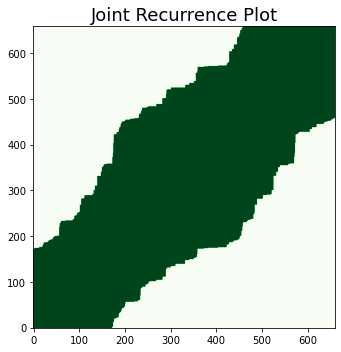

In [67]:
#X, _, _,_ = one_hot_encoded_data(return_X_y=True)
jrp = JointRecurrencePlot(threshold='point', percentage=50)
X_jrp = jrp.transform(X)

# Show the results for the first time series
plt.figure(figsize=(5, 5))
plt.imshow(X_jrp[1], cmap='Greens', origin='lower')
plt.title('Joint Recurrence Plot', fontsize=18)
plt.tight_layout()
plt.show()

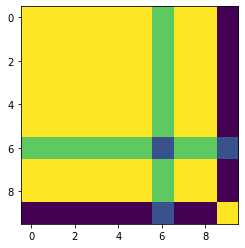

In [165]:
from pyts.image import GramianAngularField
import matplotlib.pyplot as plt

Xtrain  =  grt
#Xtest = get_some_data() # both N x T time series samples

gaf = GramianAngularField()
im_train = gaf.fit_transform(Xtrain)
#im_test = gaf.transform(Xtest)

#
plt.imshow(im_train[0])
plt.show()

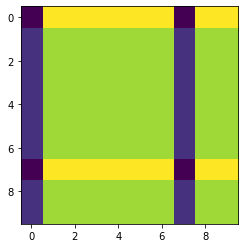

In [173]:
from pyts.image import MarkovTransitionField
import matplotlib.pyplot as plt

Xtrain = one_hot_encoded_data # both N x T time series samples

mtf = MarkovTransitionField()
im_train = mtf.fit_transform(Xtrain)
#im_test = mtf.transform(Xtest)

# plot one image
plt.imshow(im_train[0])
plt.show()

In [45]:
heat.head()

eventSec  eventName_Duel  eventName_Foul  eventName_Free Kick  \
0       4.0               0               0                    0   
1       6.0               0               0                    0   
2       8.0               0               0                    0   
3      12.0               2               0                    0   
4      14.0               0               0                    0   

   eventName_Goalkeeper leaving line  eventName_Offside  \
0                                  0                  0   
1                                  0                  0   
2                                  0                  0   
3                                  0                  0   
4                                  0                  0   

   eventName_Others on the ball  eventName_Pass  eventName_Save attempt  \
0                             0               1                       0   
1                             0               1                       0   
2                             0               2                       0   
3                             0               1                       0   
4                             0               1                       0   

   eventName_Shot  
0               0  
1               0  
2               0  
3               0  
4               0

In [46]:
grt  = pd.concat([heat[['eventName_Duel', 'eventName_Foul','eventName_Free Kick','eventName_Goalkeeper leaving line','eventName_Offside','eventName_Others on the ball','eventName_Pass','eventName_Save attempt','eventName_Shot']].cumsum(),heat['eventSec']],axis = 1)

In [47]:
grt.head()

eventName_Duel  eventName_Foul  eventName_Free Kick  \
0               0               0                    0   
1               0               0                    0   
2               0               0                    0   
3               2               0                    0   
4               2               0                    0   

   eventName_Goalkeeper leaving line  eventName_Offside  \
0                                  0                  0   
1                                  0                  0   
2                                  0                  0   
3                                  0                  0   
4                                  0                  0   

   eventName_Others on the ball  eventName_Pass  eventName_Save attempt  \
0                             0               1                       0   
1                             0               2                       0   
2                             0               4                       0   
3                             0               5                       0   
4                             0               6                       0   

   eventName_Shot  eventSec  
0               0       4.0  
1               0       6.0  
2               0       8.0  
3               0      12.0  
4               0      14.0

In [48]:
grt.shape

(659, 10)

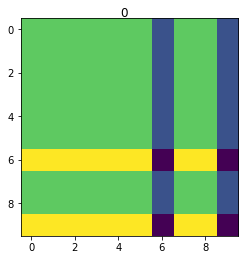

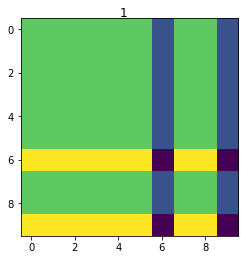

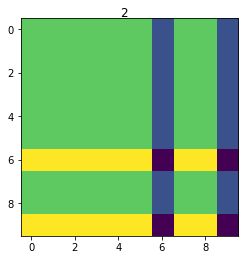

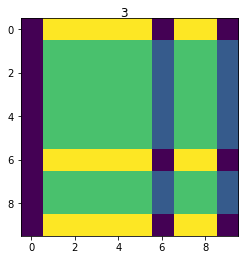

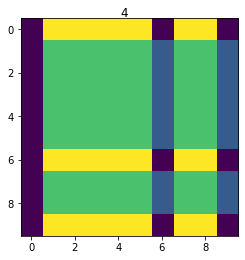

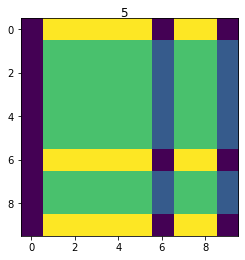

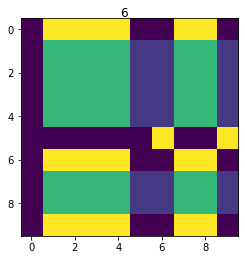

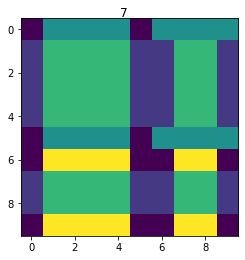

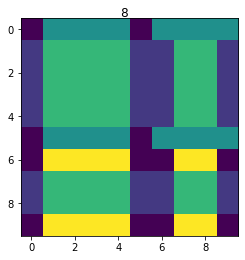

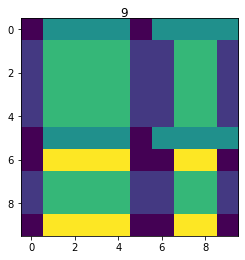

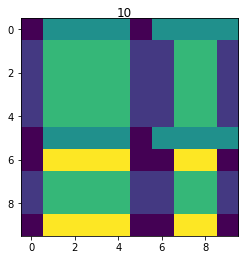

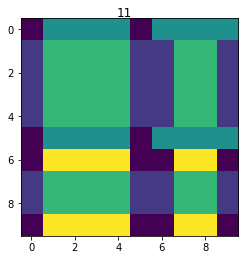

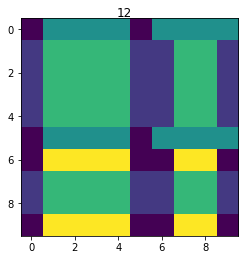

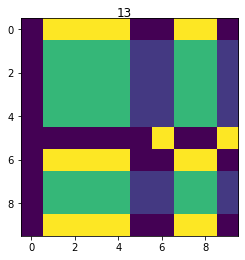

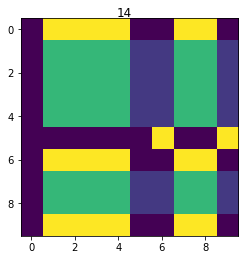

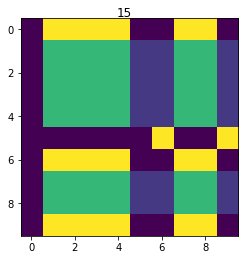

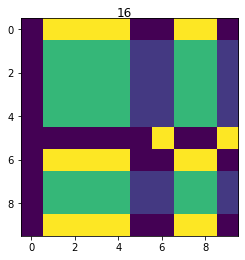

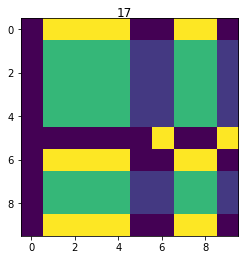

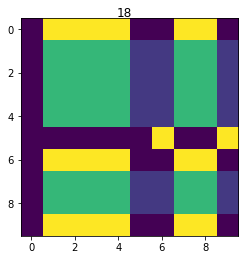

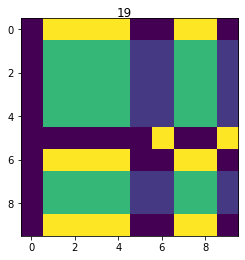

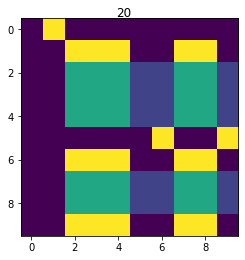

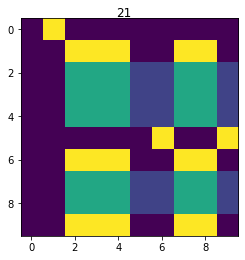

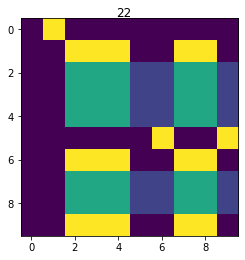

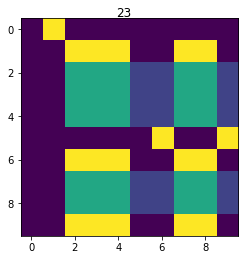

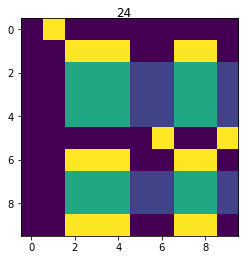

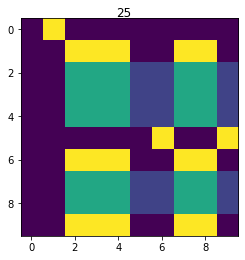

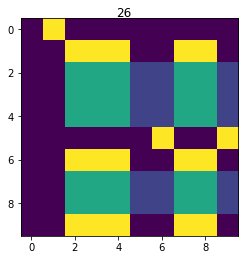

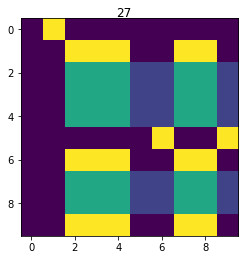

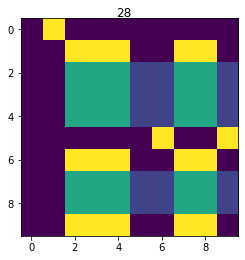

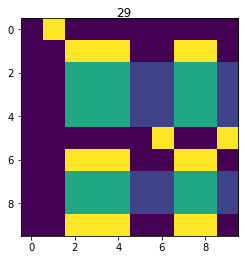

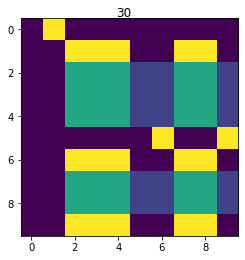

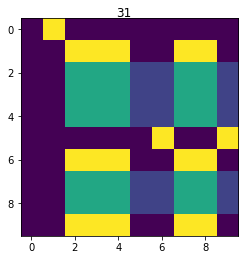

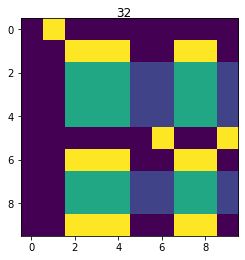

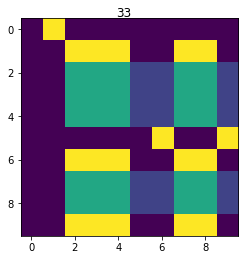

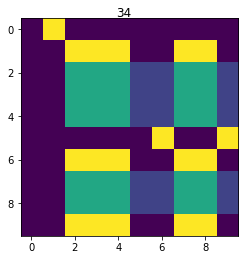

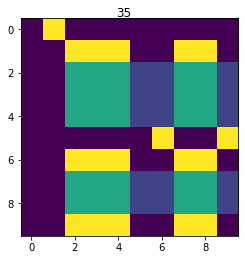

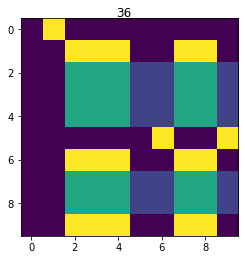

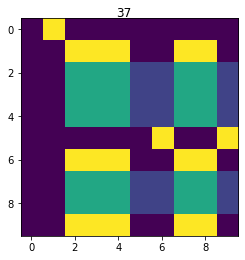

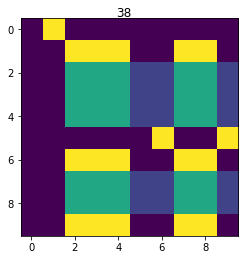

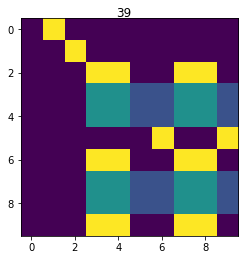

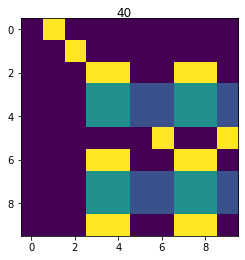

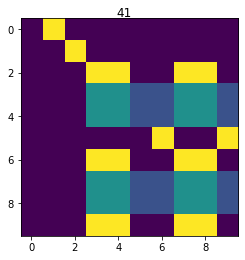

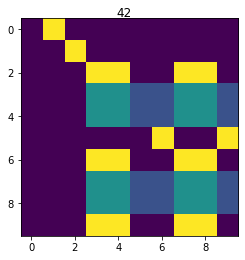

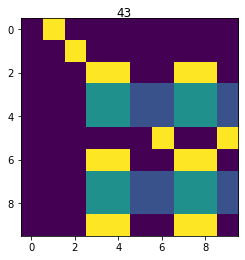

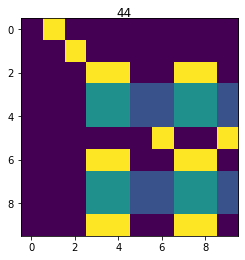

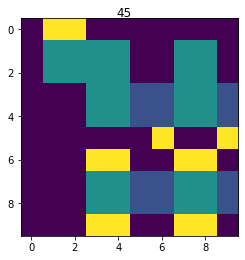

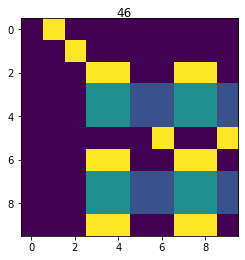

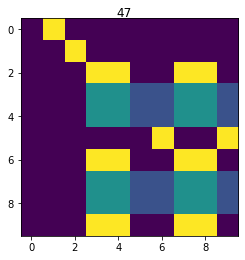

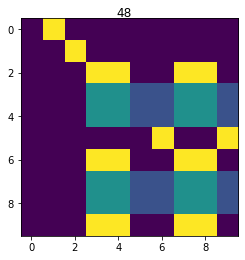

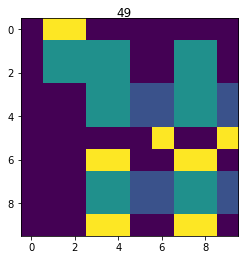

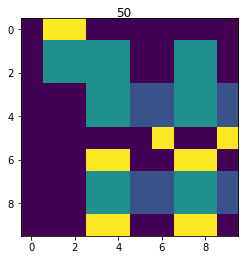

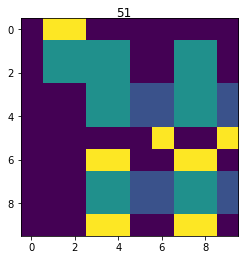

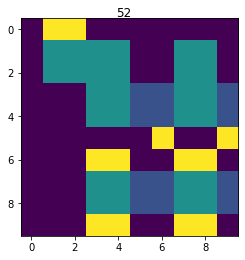

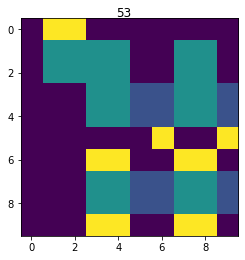

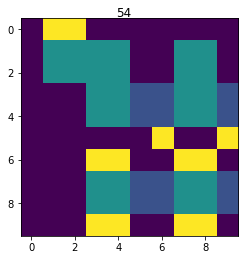

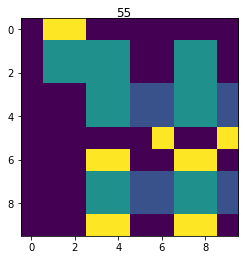

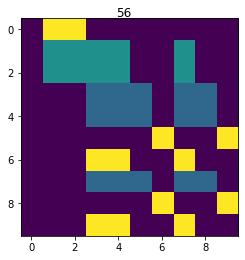

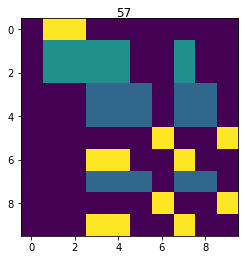

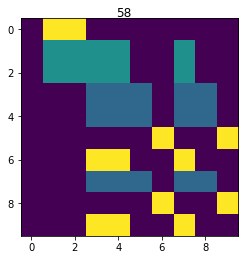

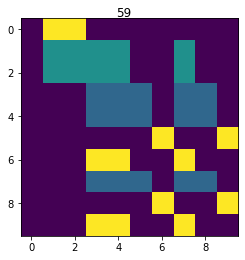

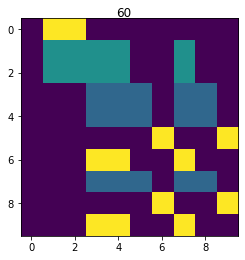

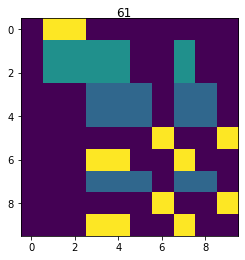

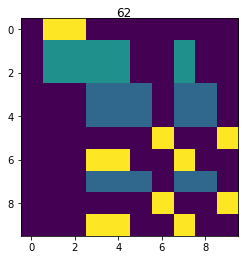

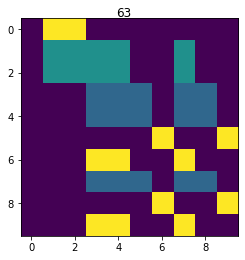

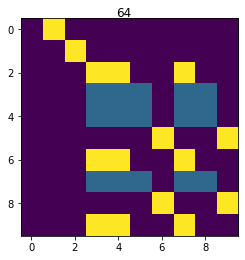

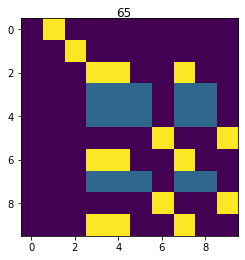

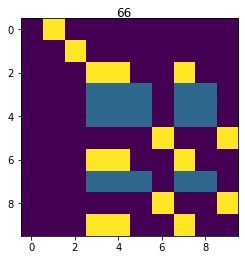

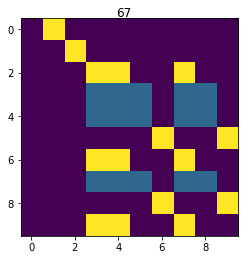

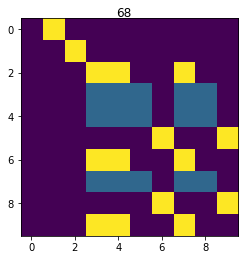

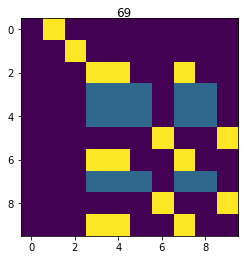

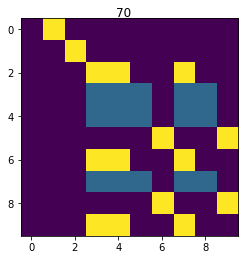

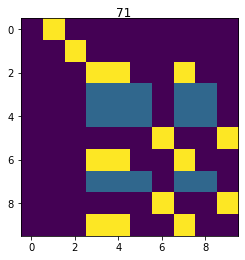

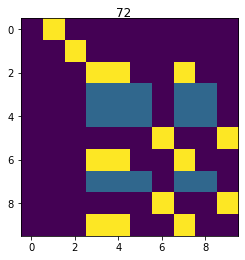

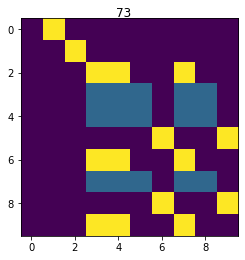

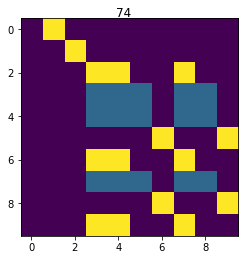

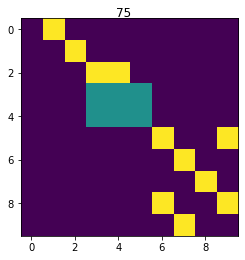

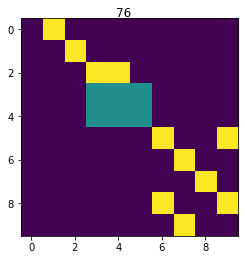

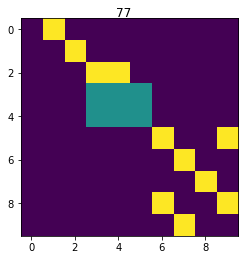

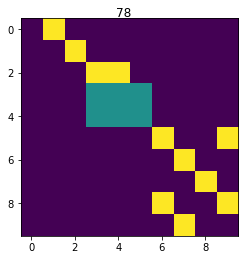

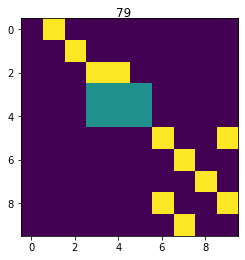

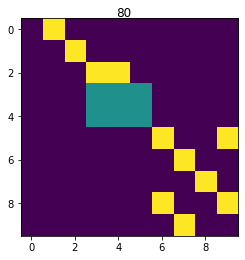

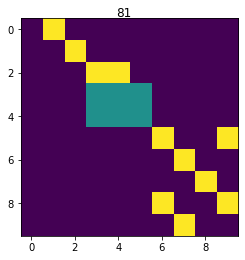

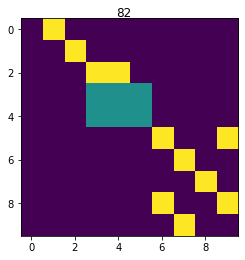

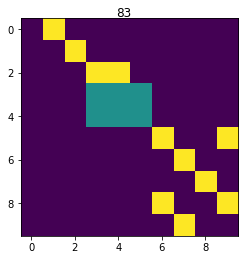

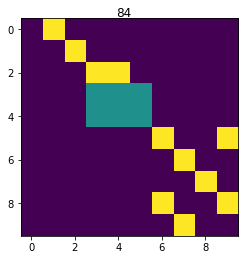

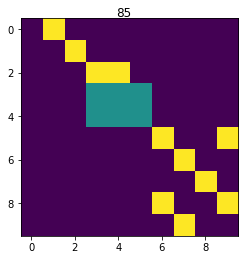

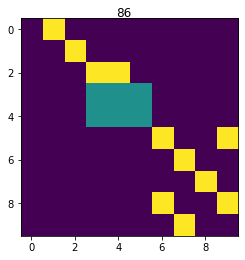

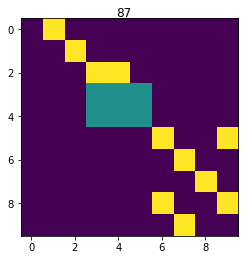

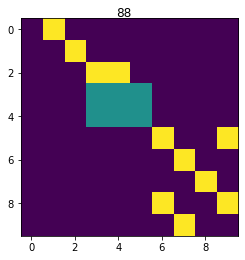

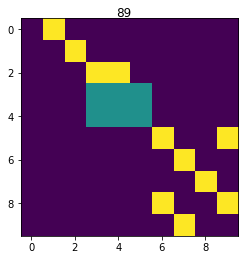

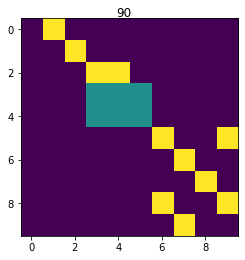

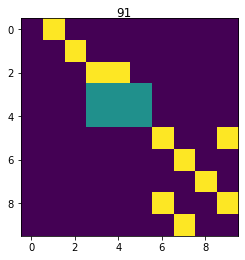

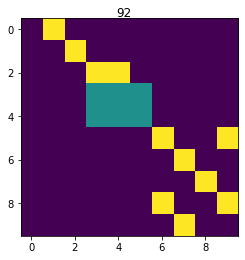

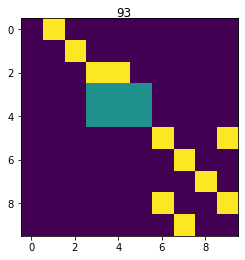

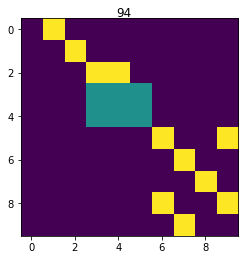

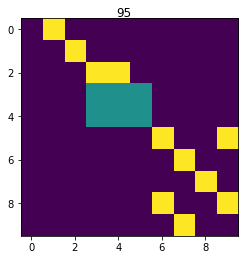

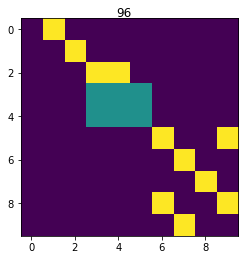

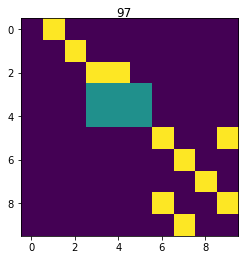

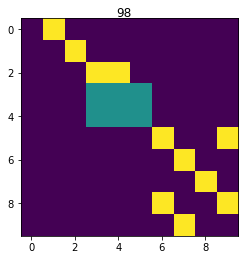

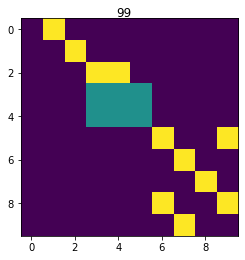

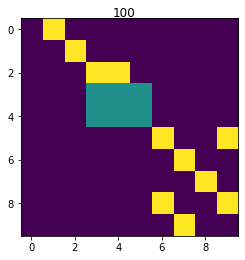

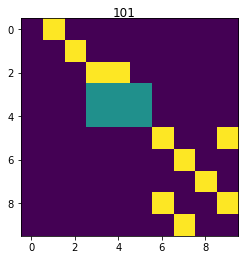

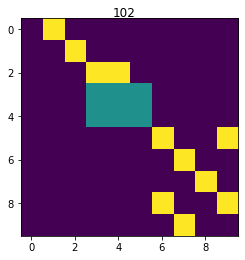

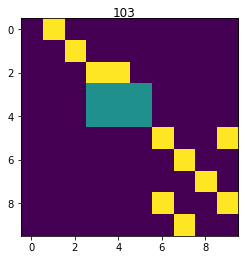

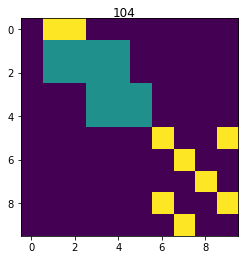

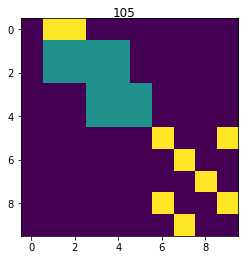

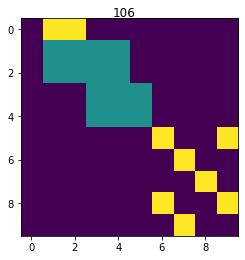

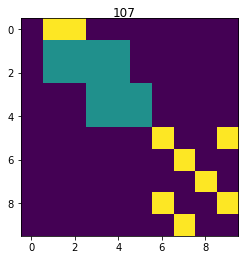

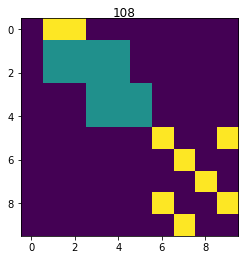

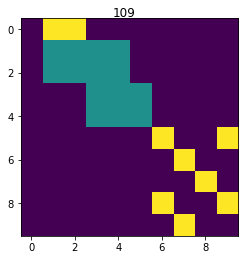

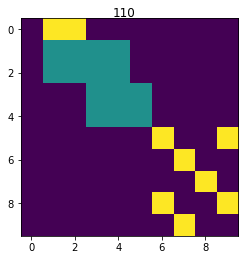

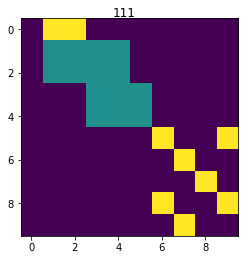

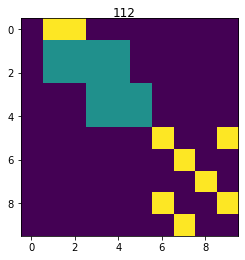

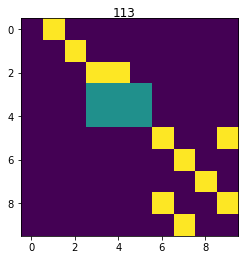

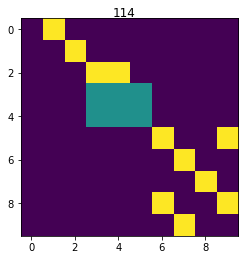

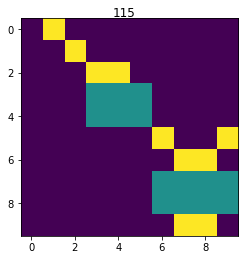

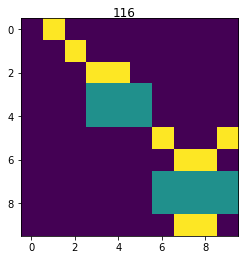

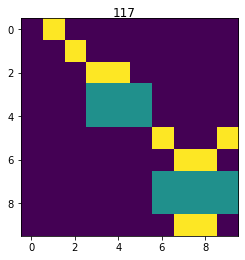

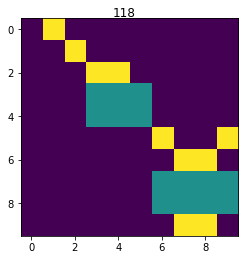

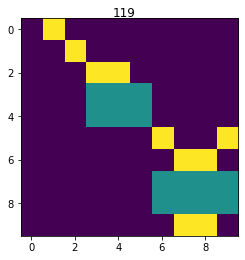

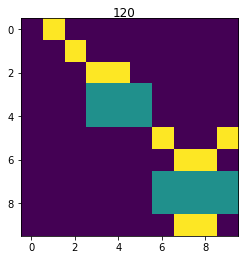

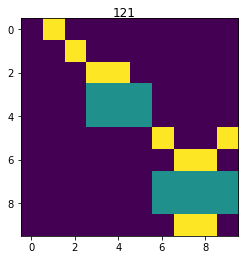

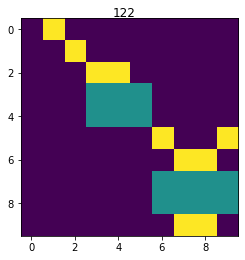

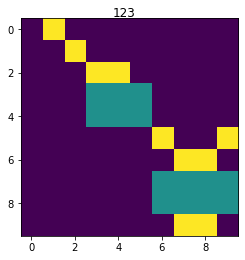

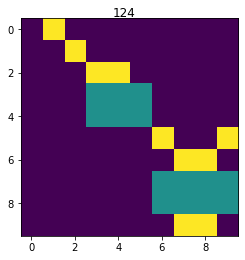

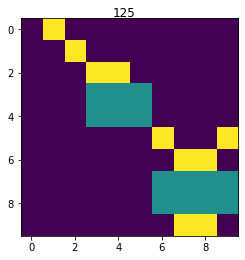

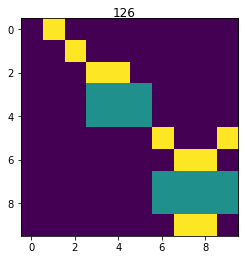

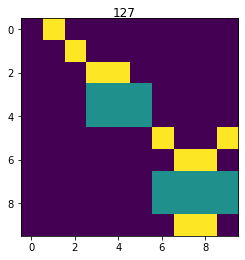

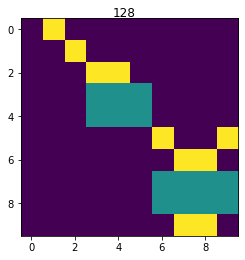

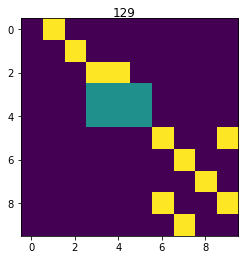

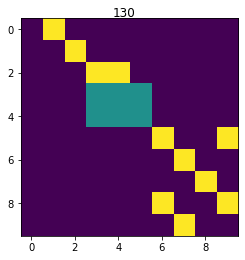

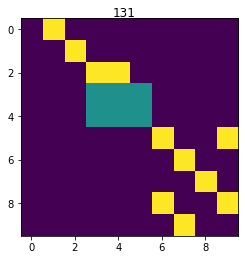

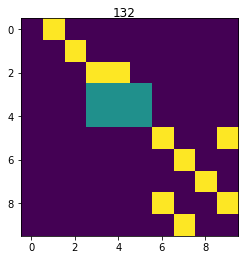

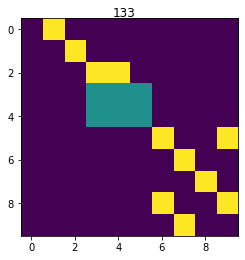

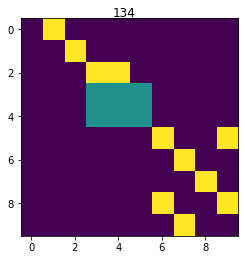

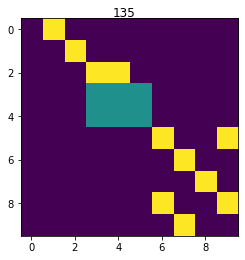

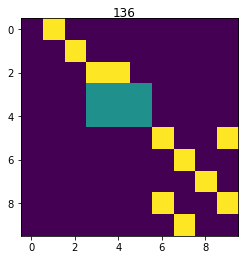

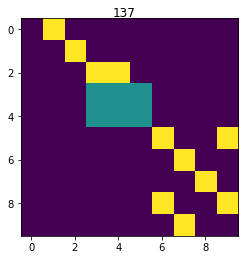

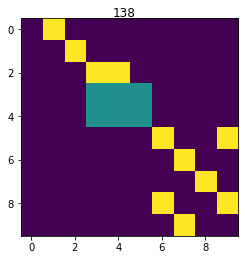

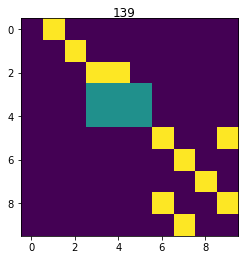

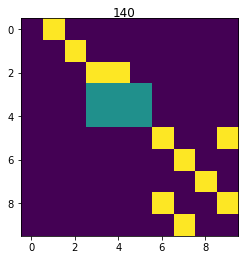

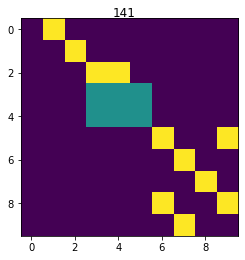

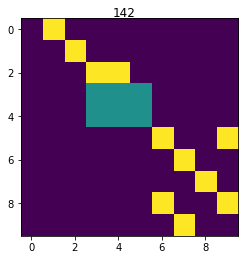

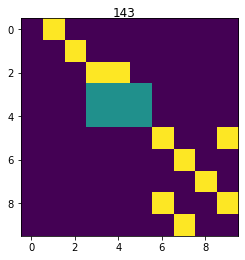

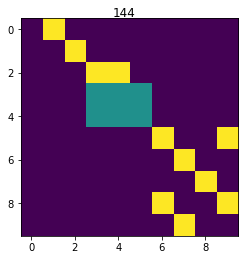

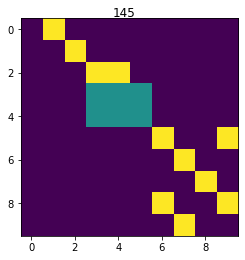

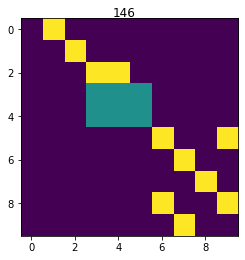

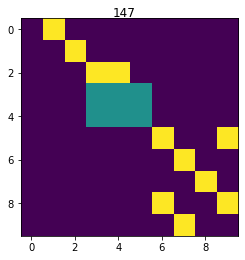

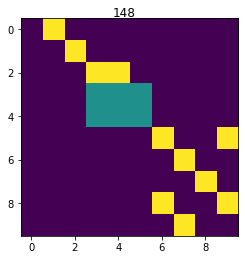

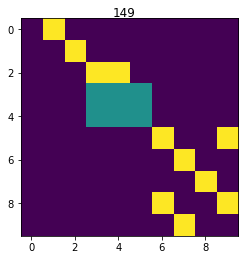

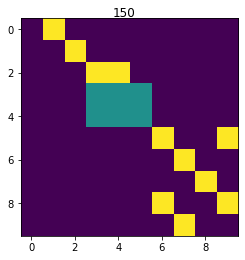

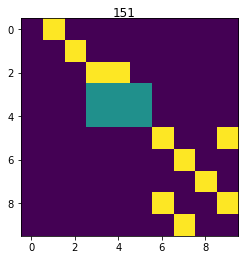

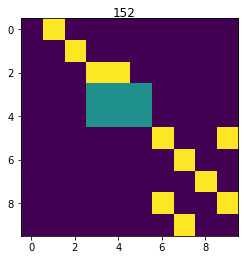

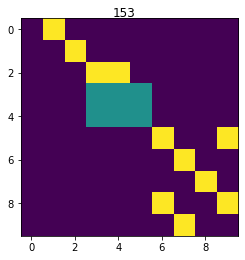

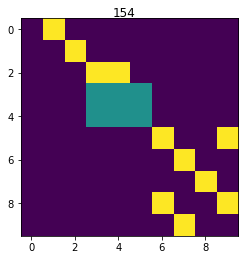

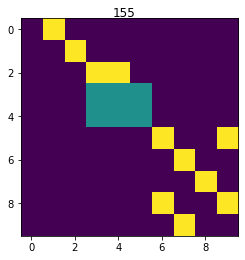

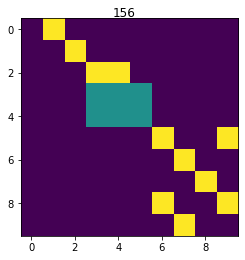

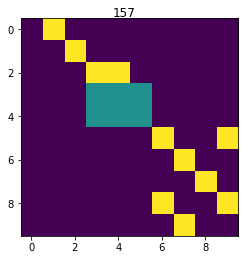

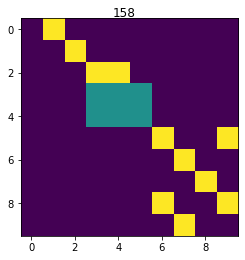

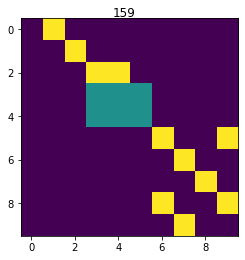

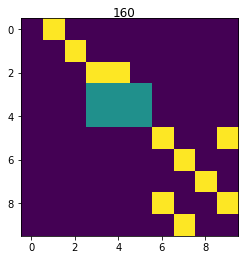

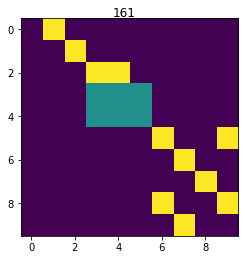

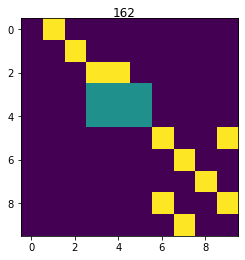

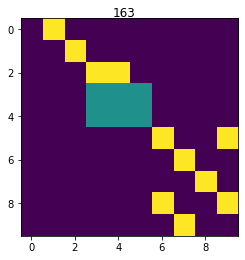

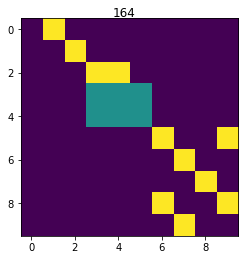

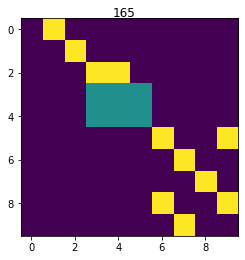

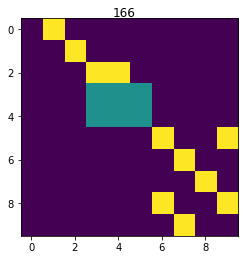

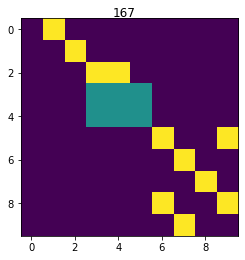

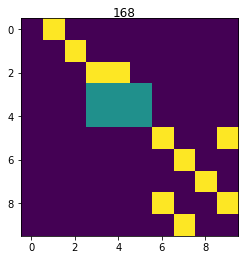

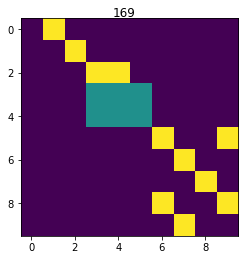

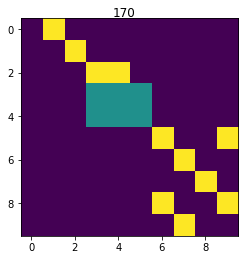

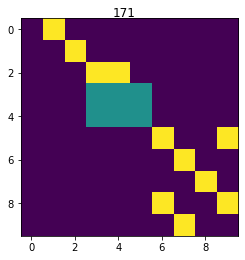

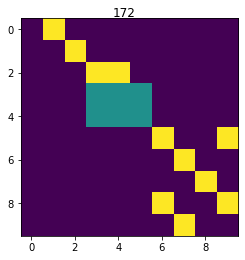

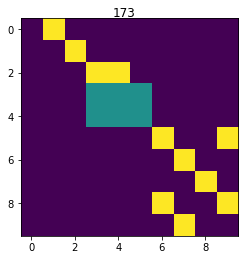

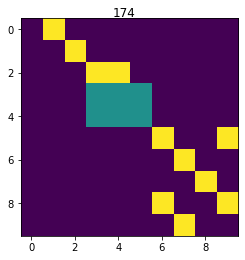

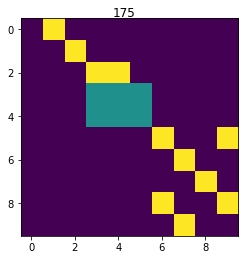

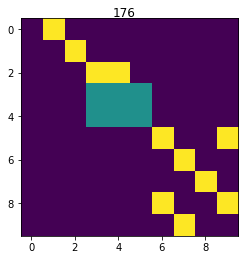

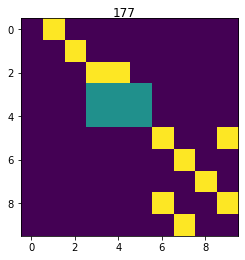

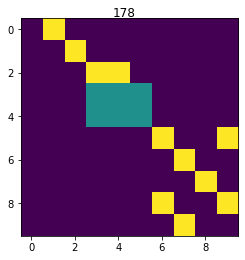

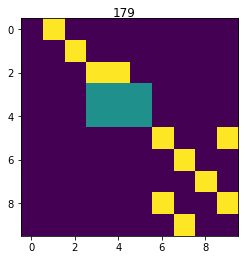

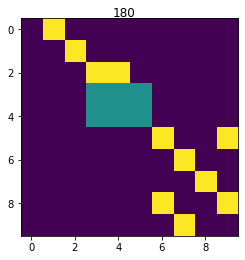

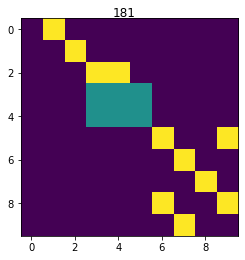

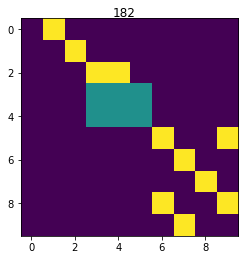

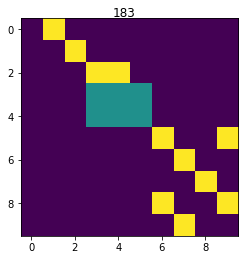

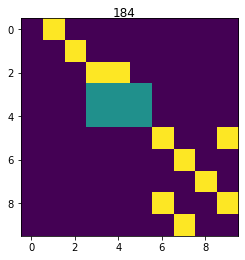

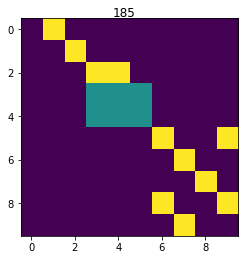

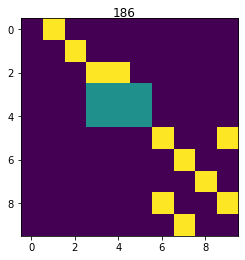

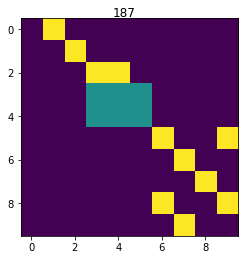

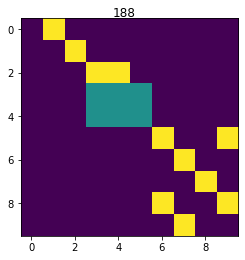

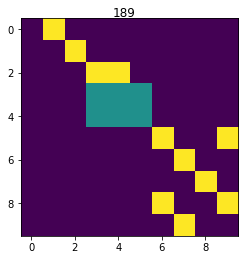

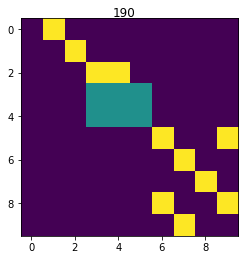

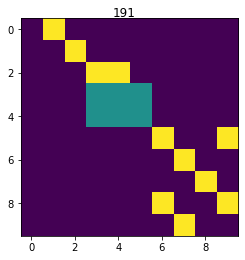

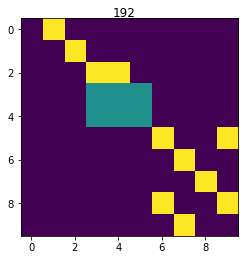

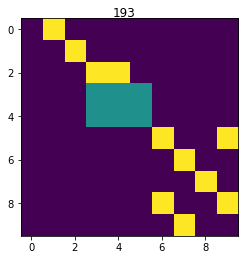

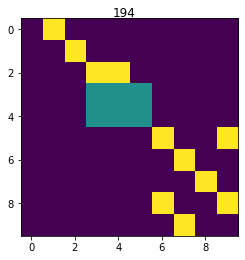

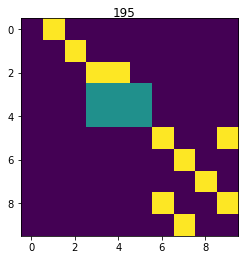

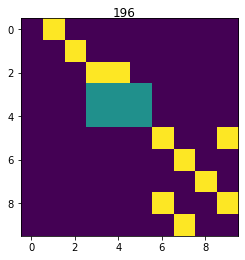

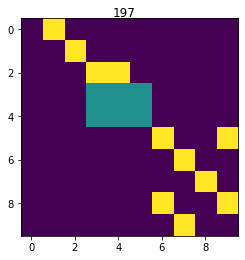

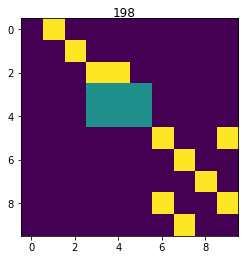

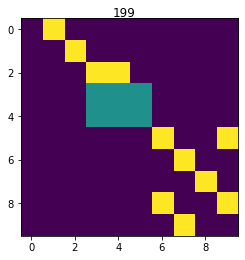

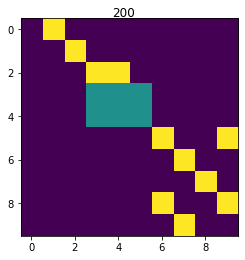

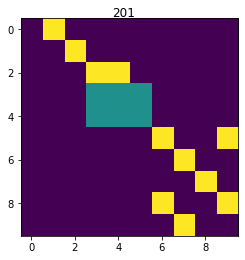

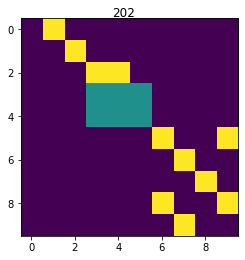

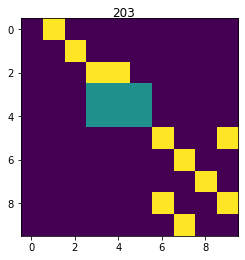

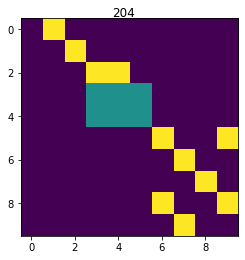

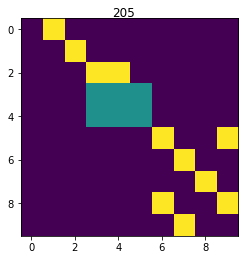

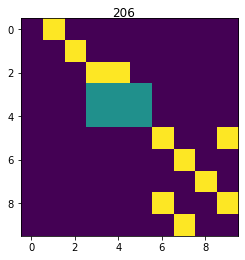

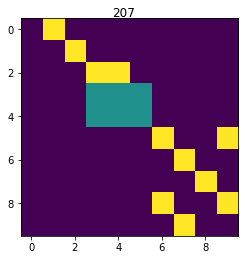

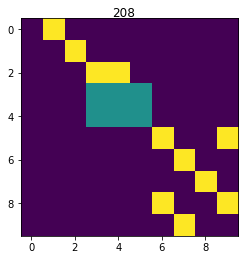

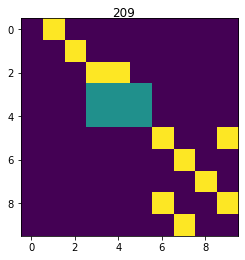

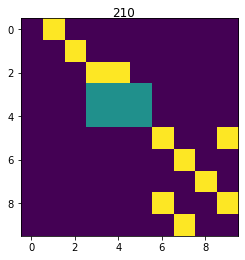

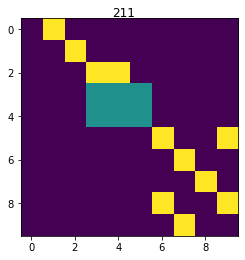

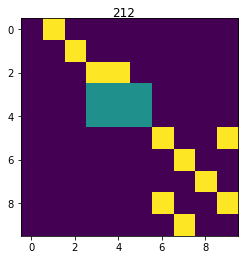

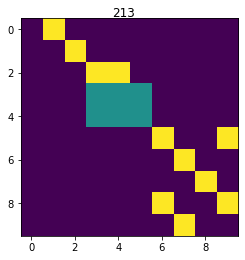

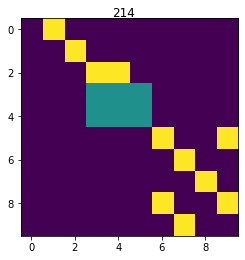

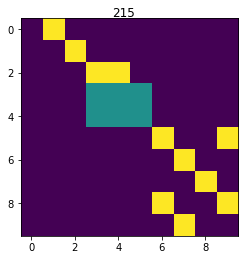

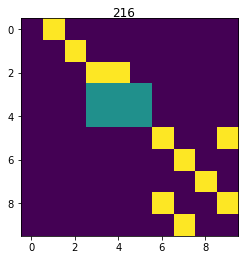

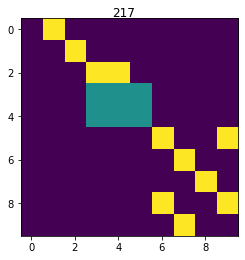

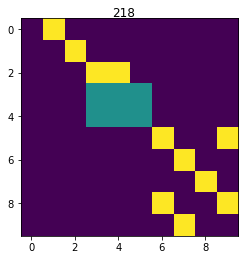

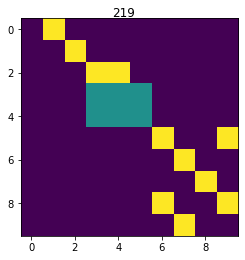

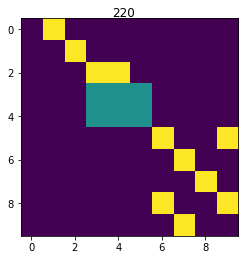

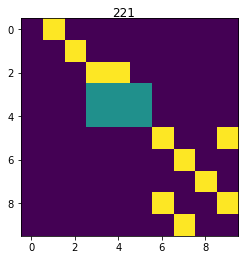

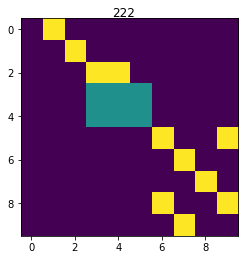

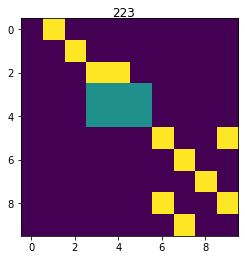

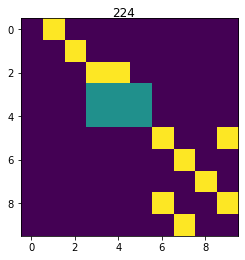

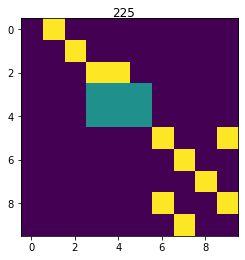

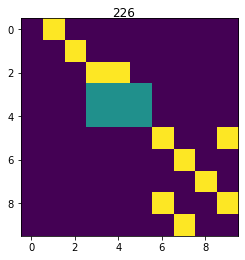

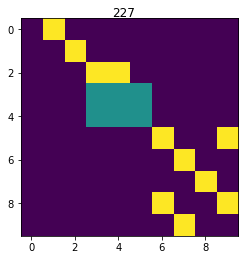

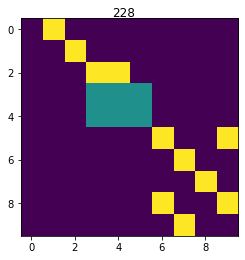

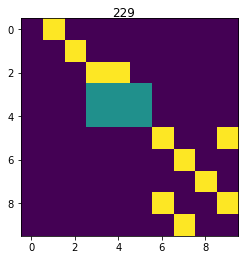

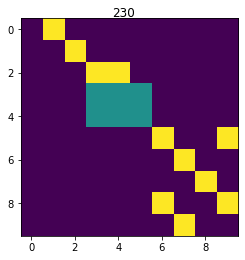

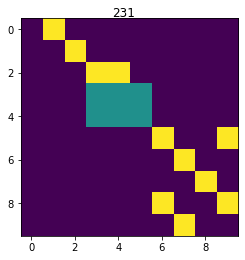

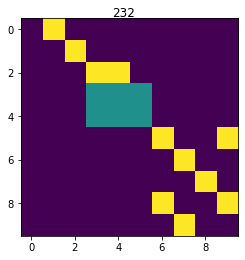

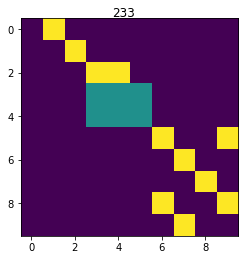

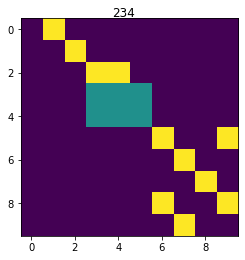

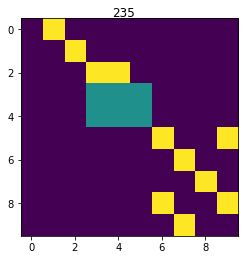

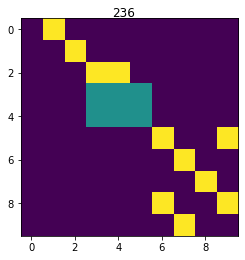

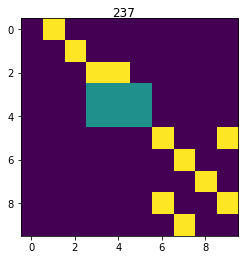

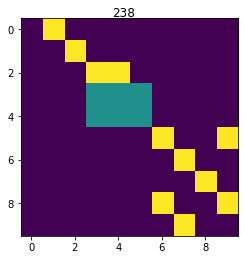

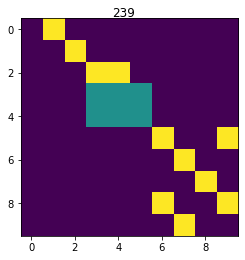

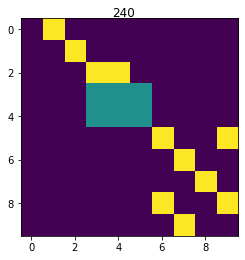

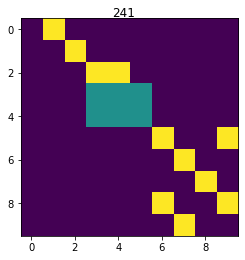

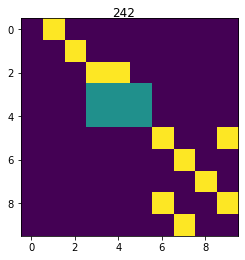

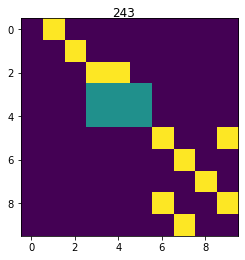

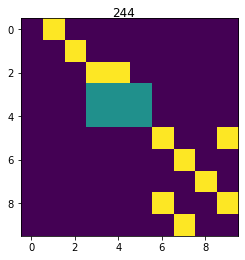

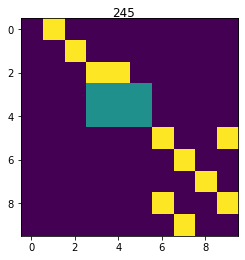

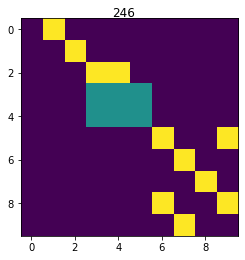

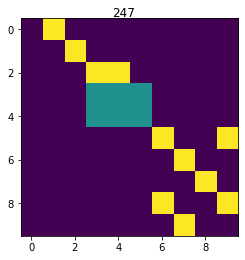

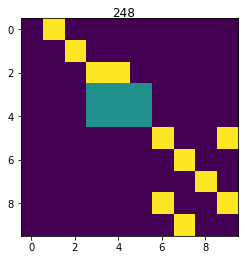

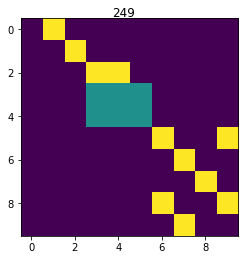

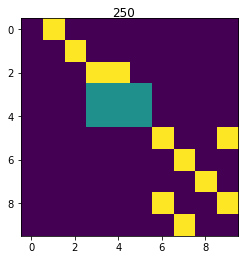

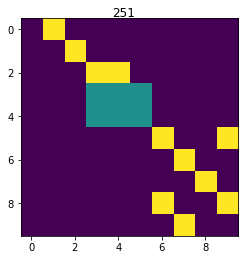

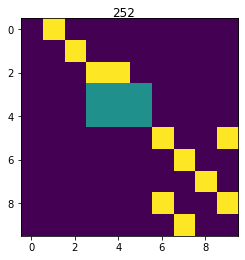

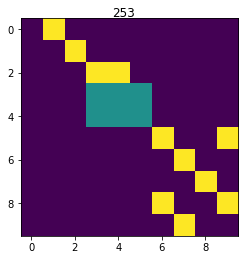

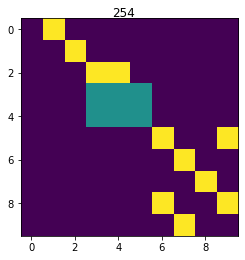

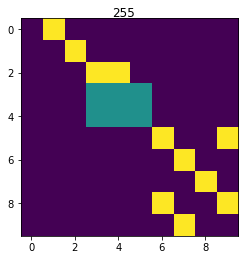

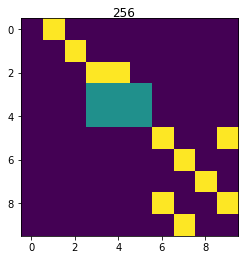

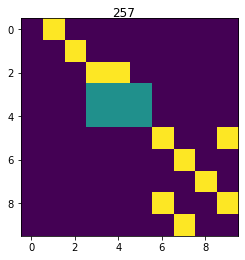

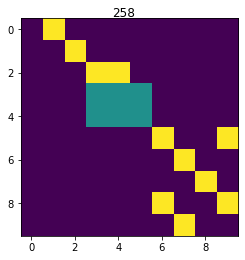

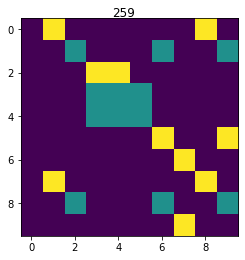

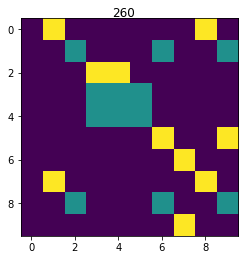

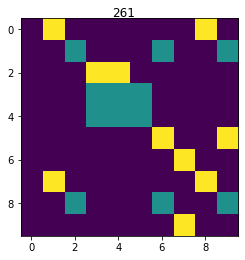

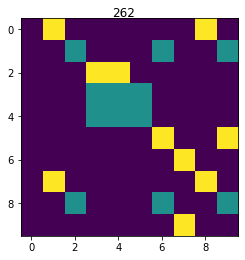

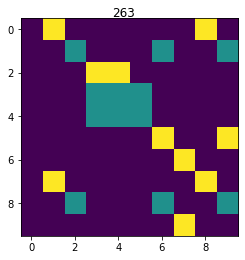

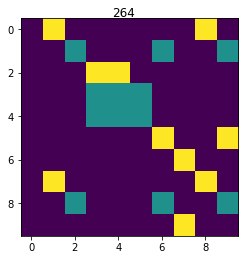

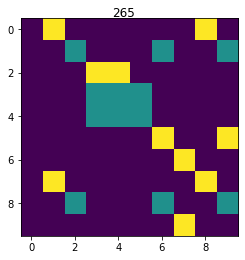

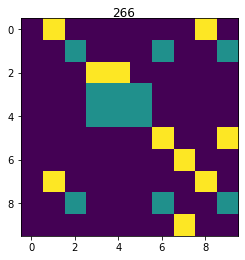

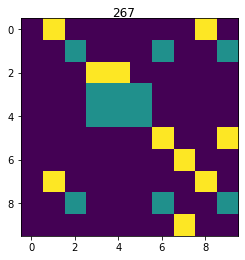

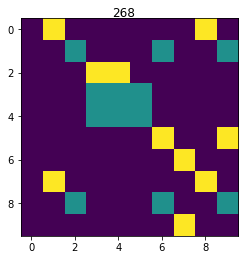

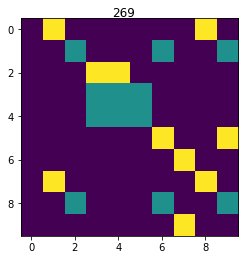

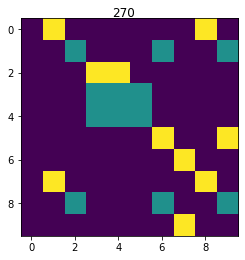

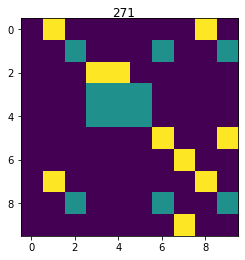

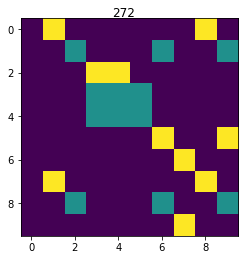

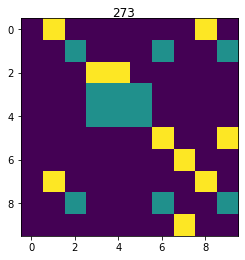

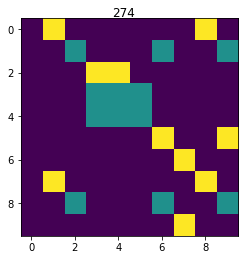

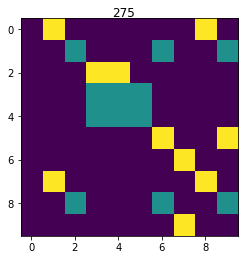

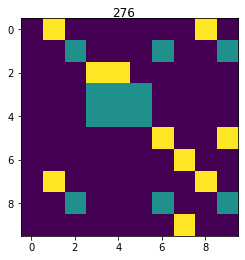

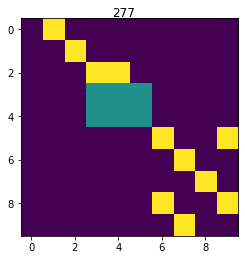

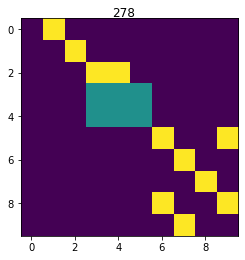

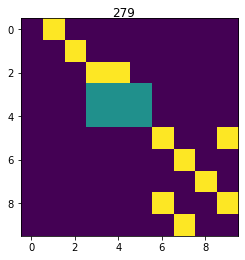

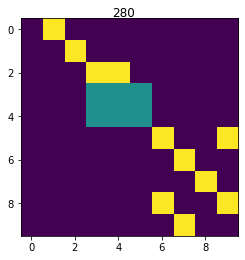

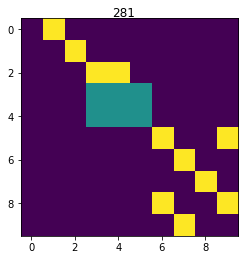

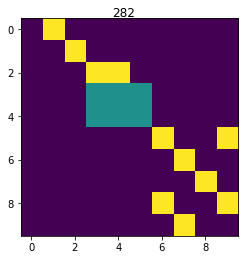

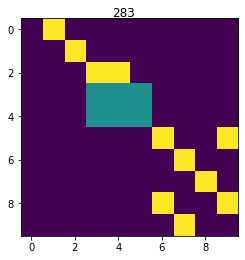

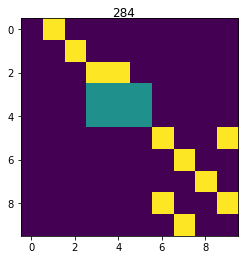

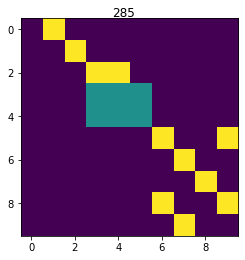

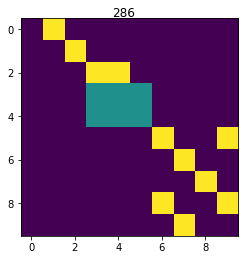

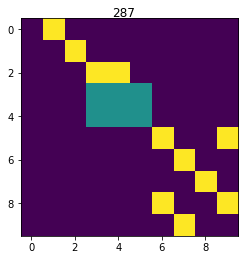

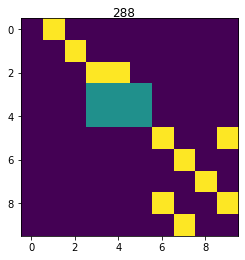

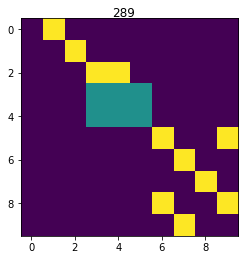

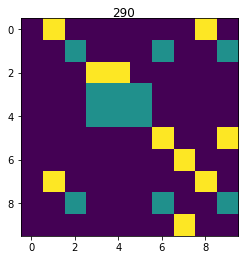

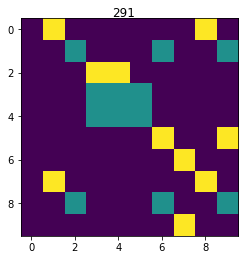

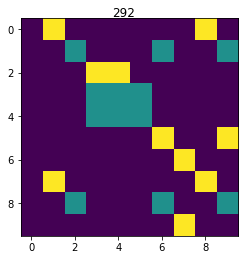

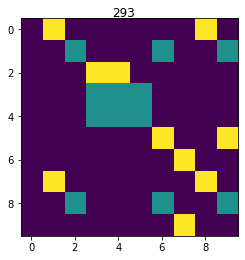

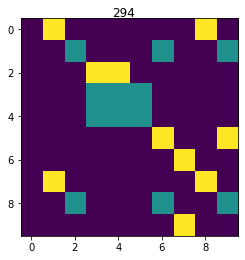

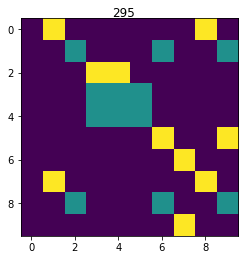

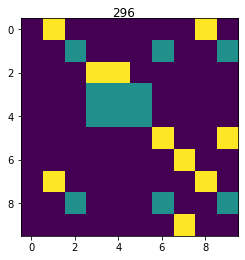

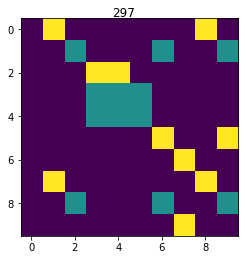

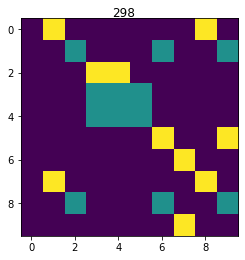

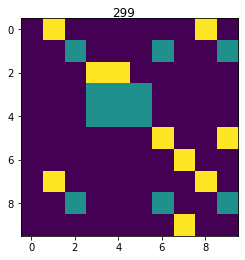

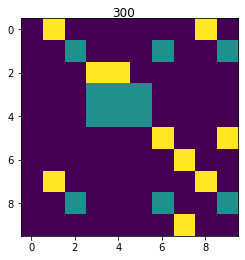

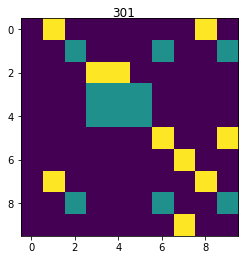

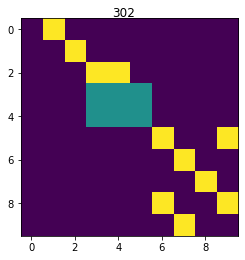

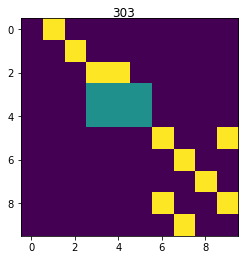

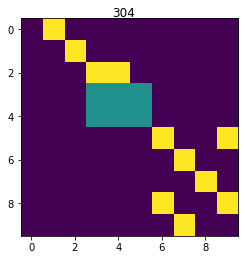

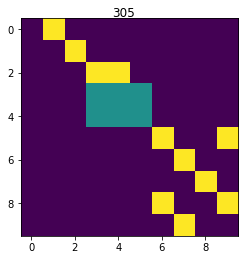

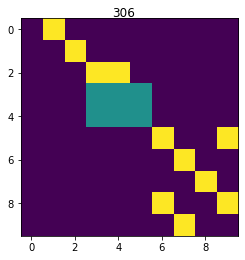

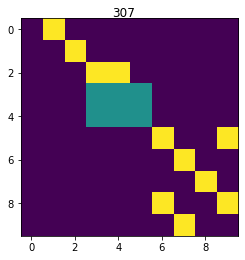

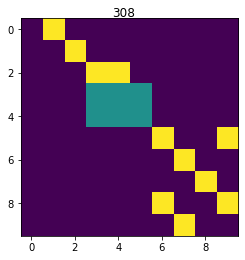

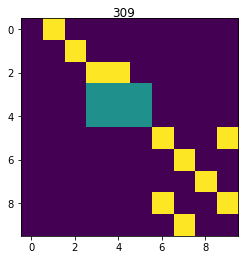

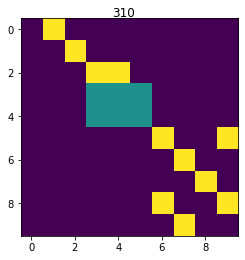

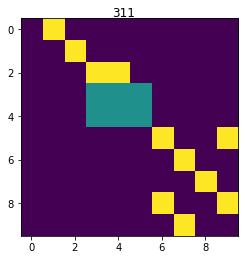

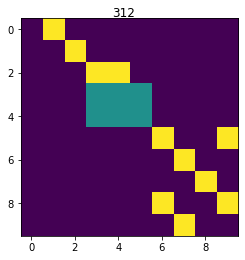

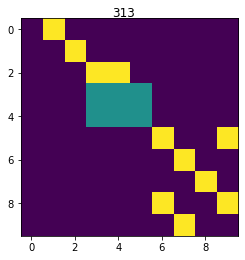

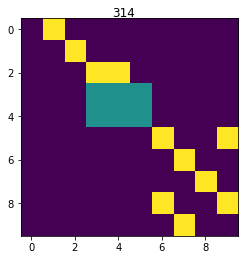

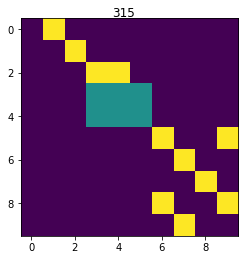

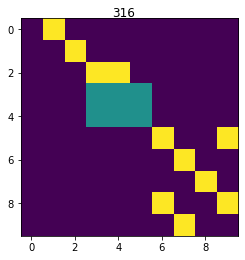

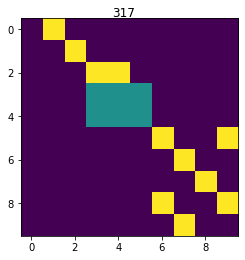

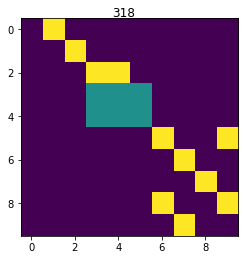

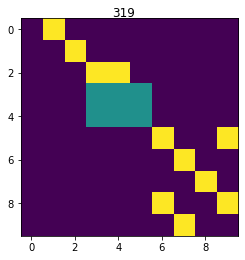

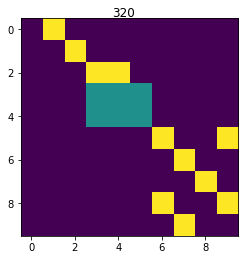

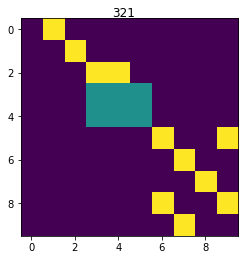

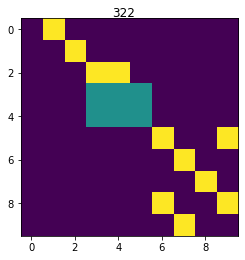

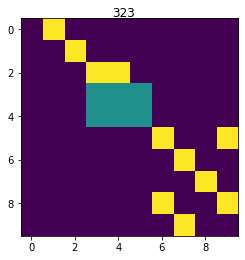

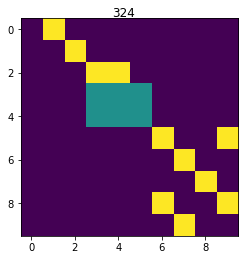

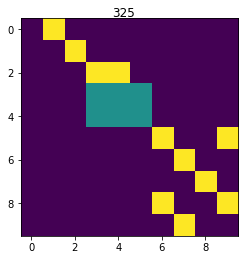

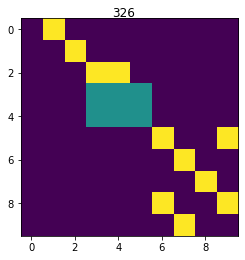

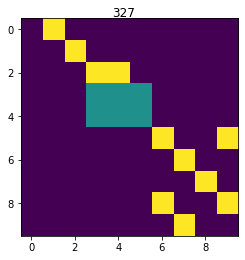

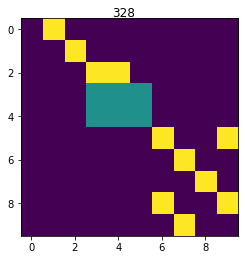

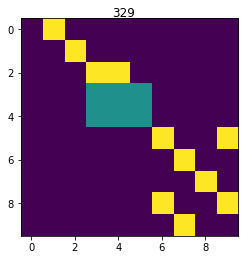

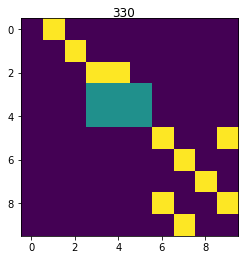

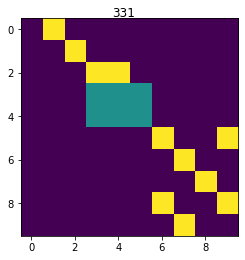

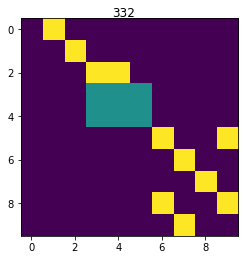

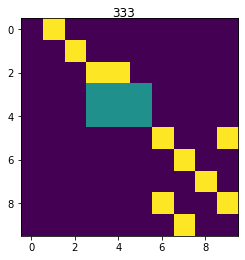

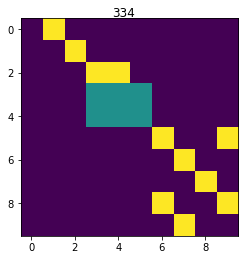

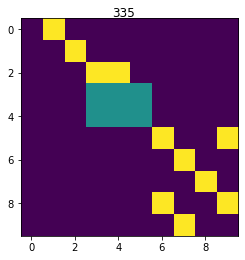

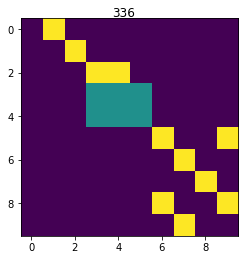

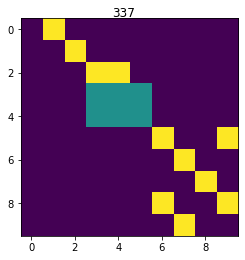

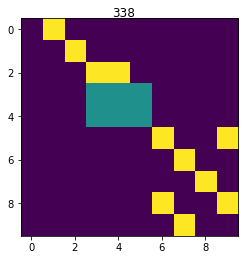

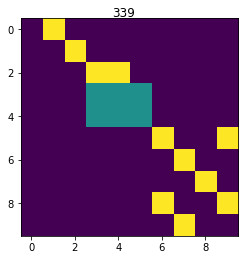

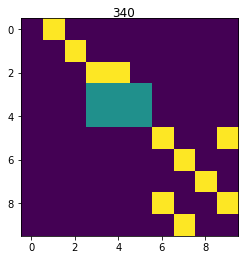

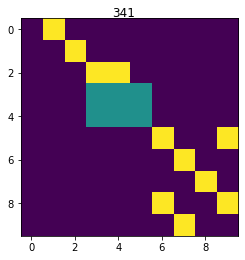

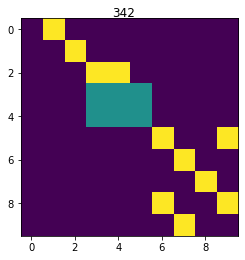

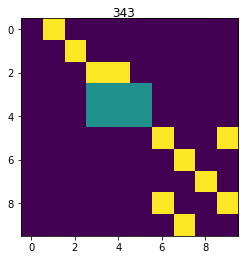

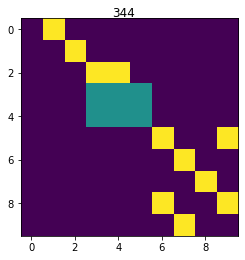

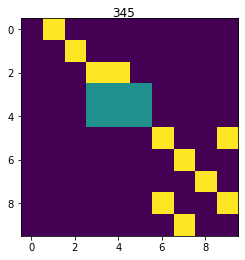

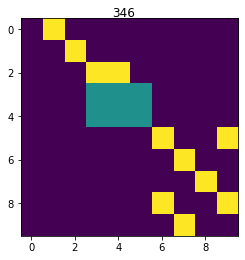

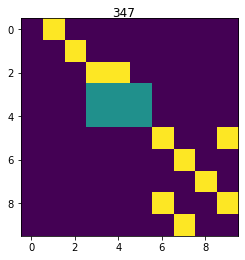

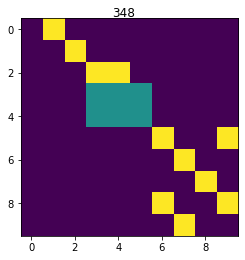

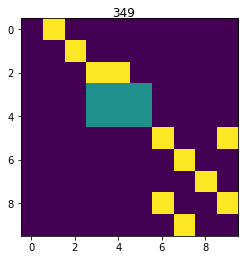

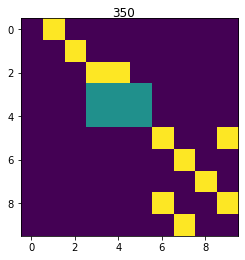

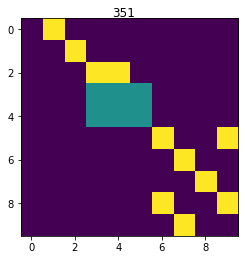

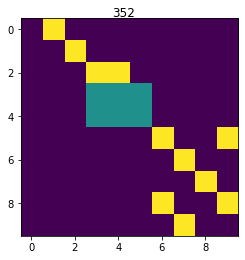

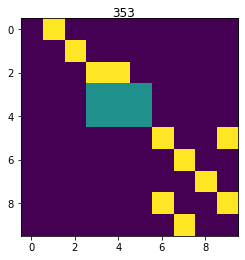

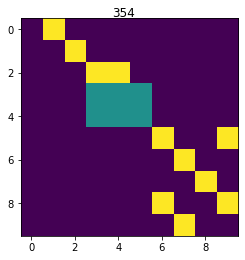

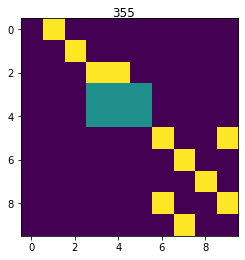

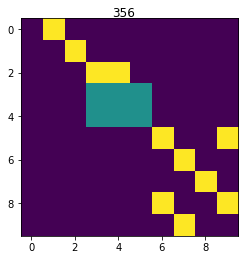

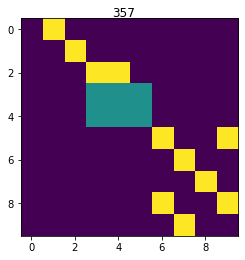

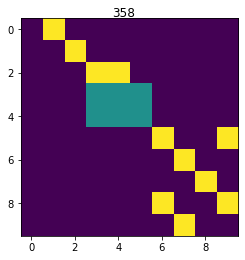

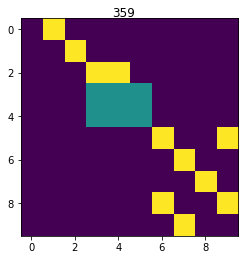

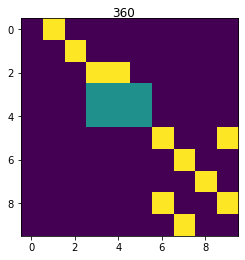

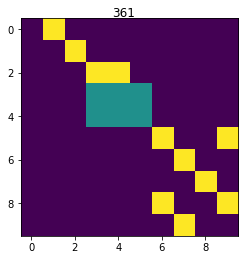

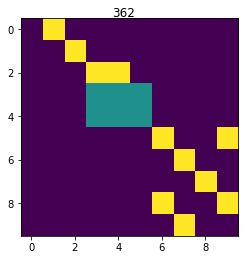

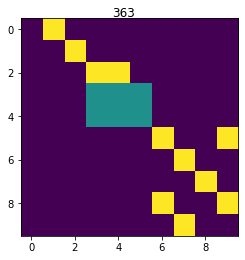

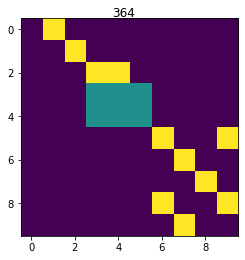

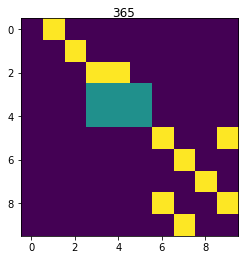

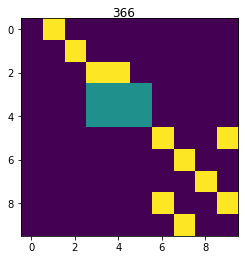

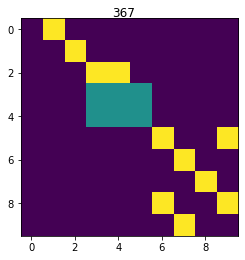

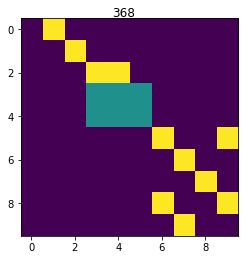

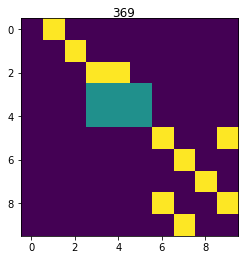

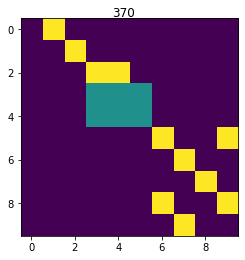

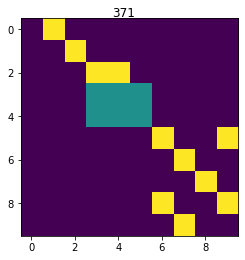

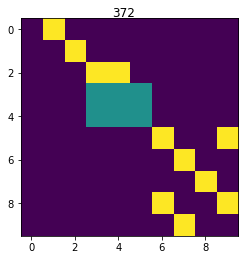

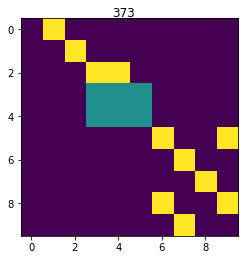

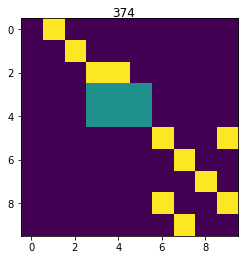

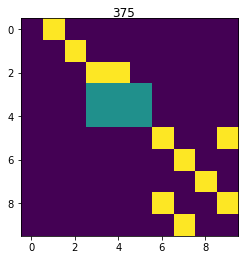

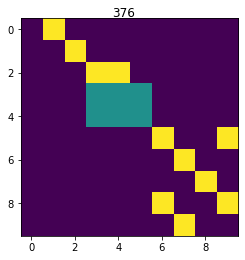

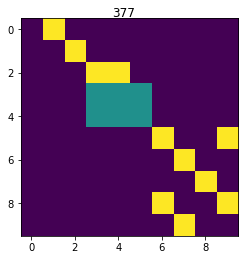

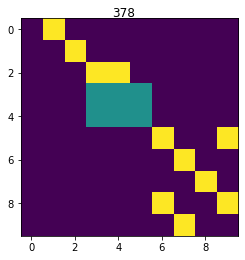

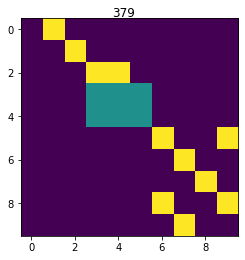

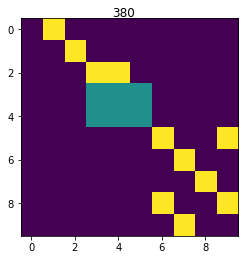

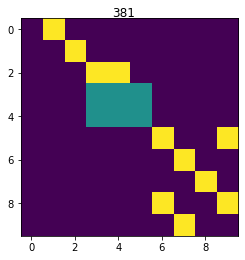

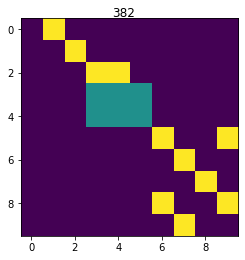

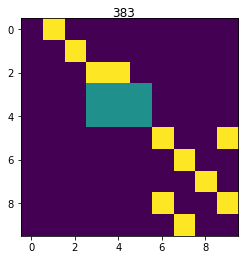

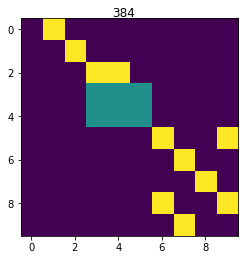

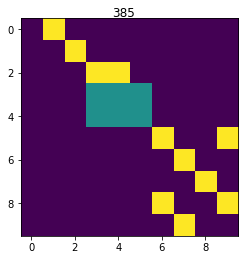

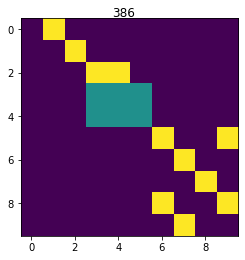

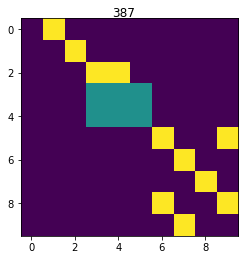

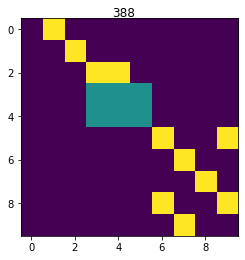

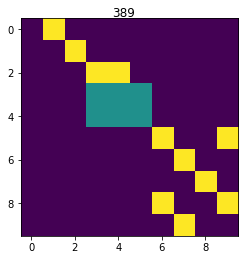

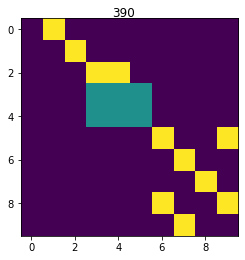

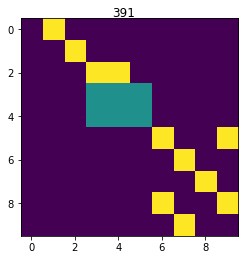

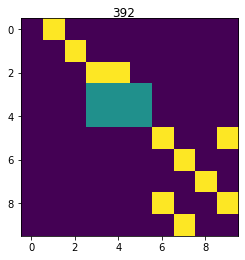

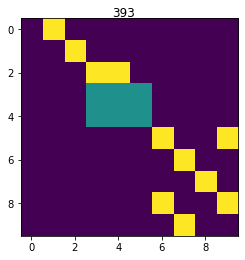

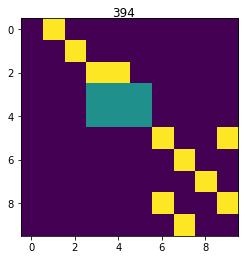

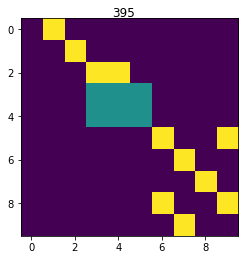

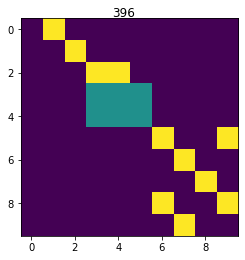

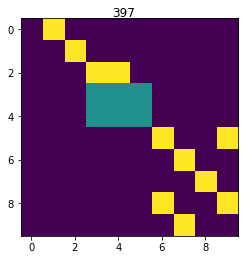

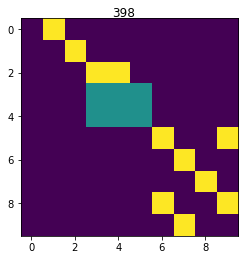

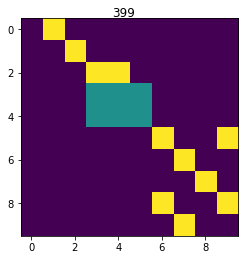

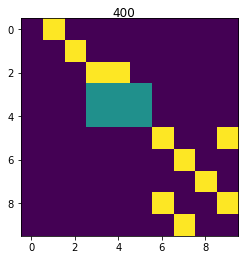

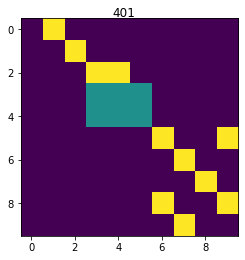

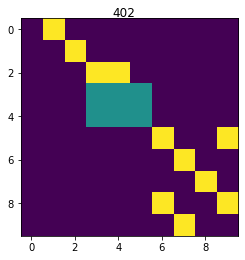

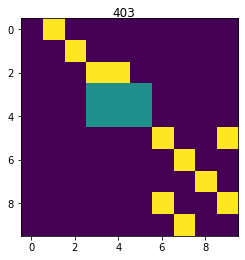

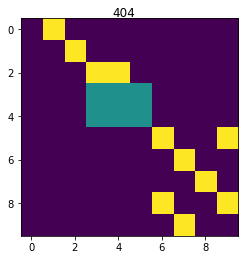

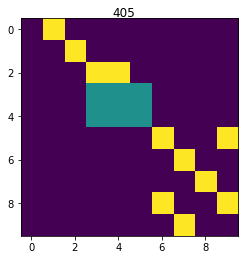

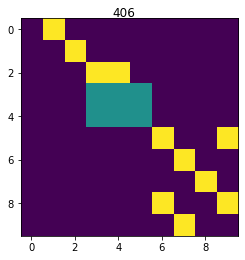

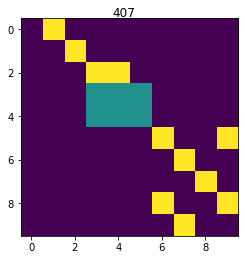

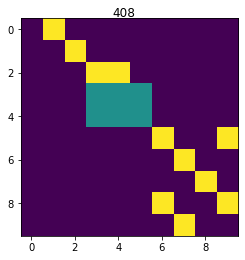

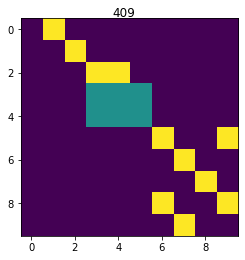

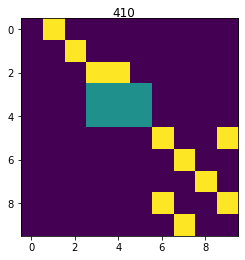

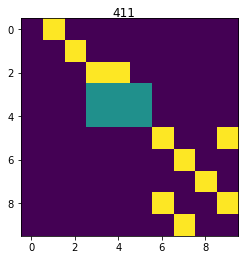

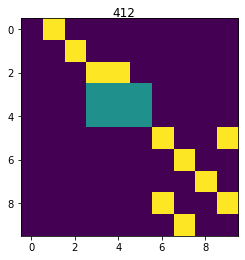

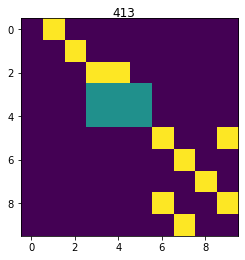

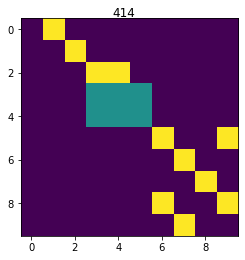

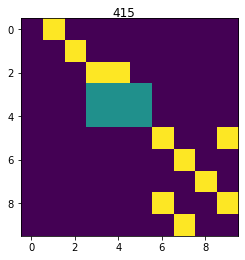

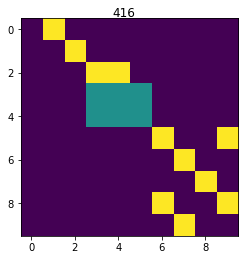

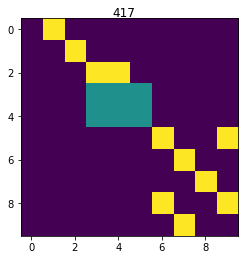

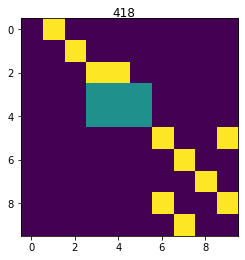

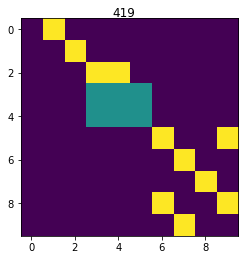

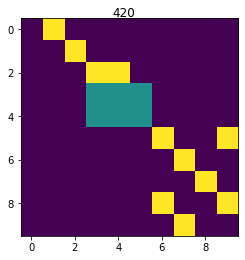

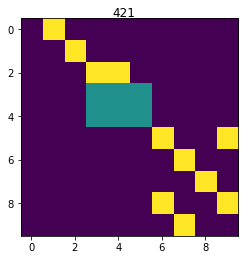

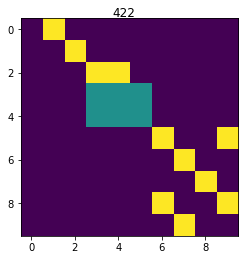

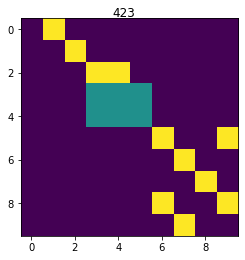

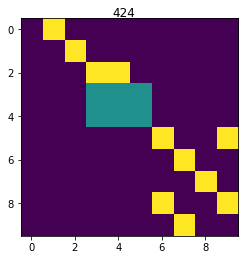

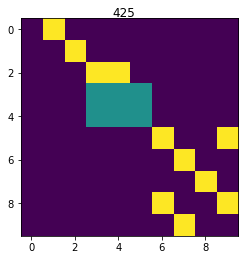

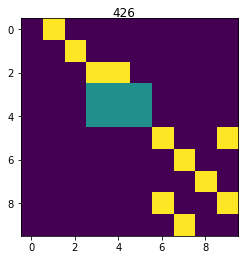

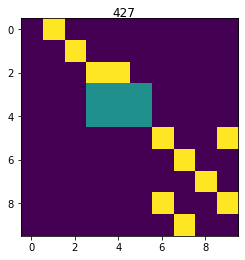

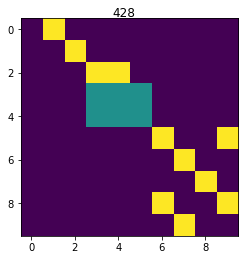

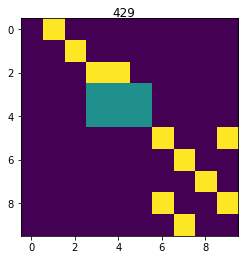

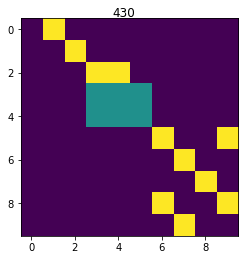

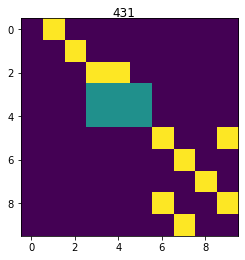

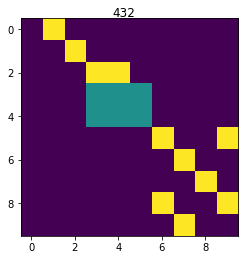

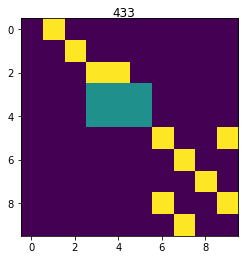

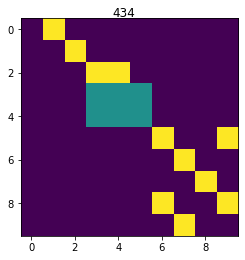

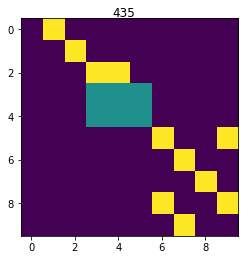

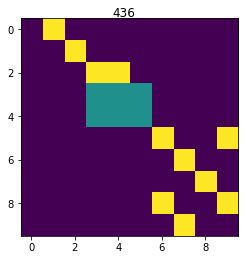

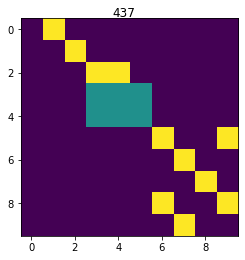

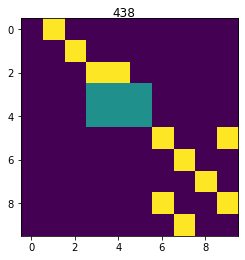

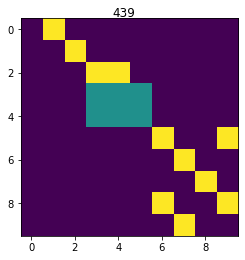

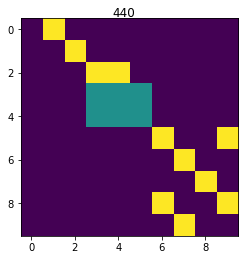

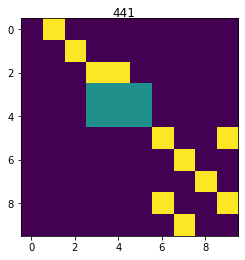

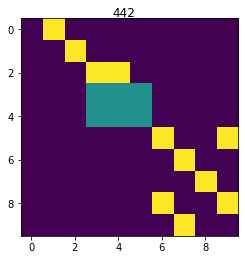

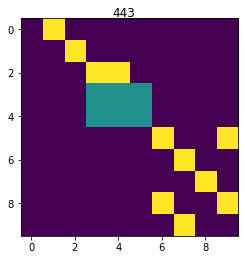

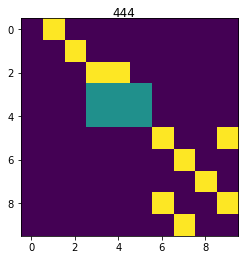

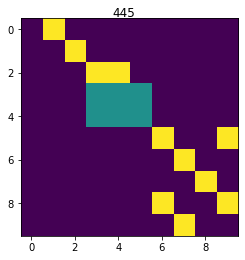

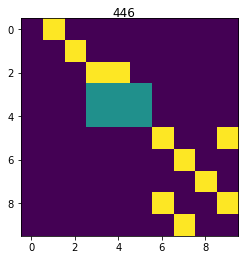

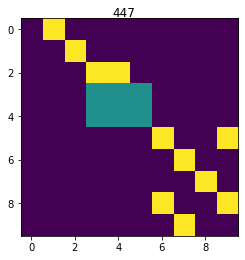

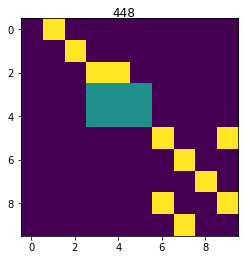

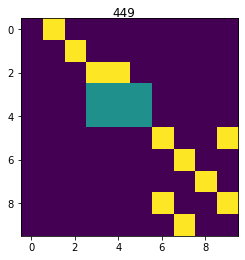

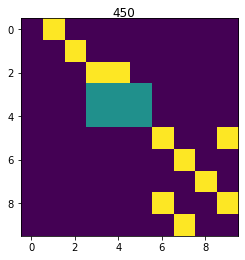

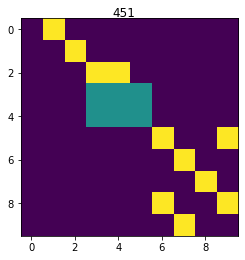

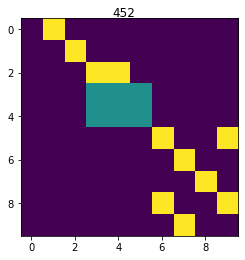

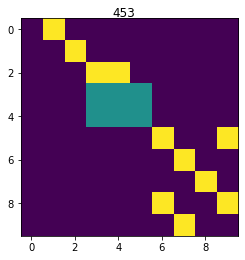

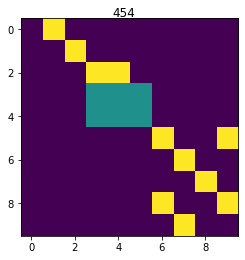

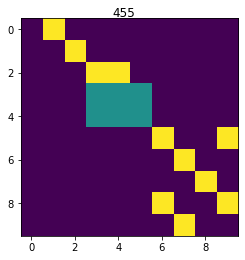

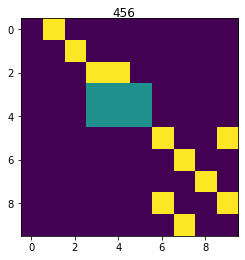

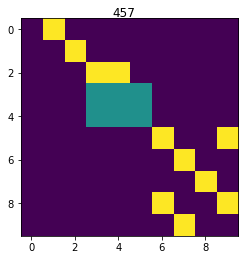

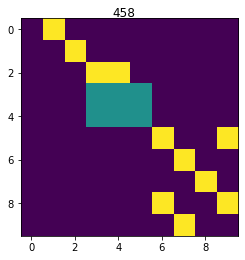

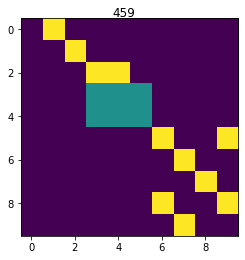

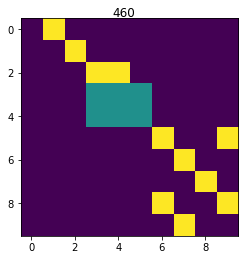

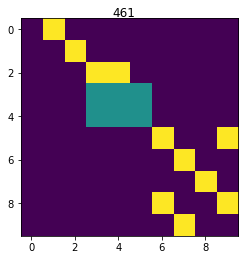

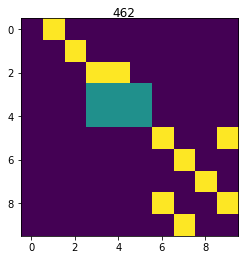

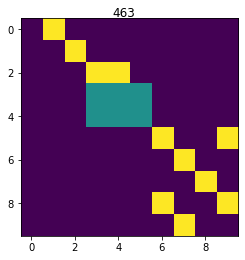

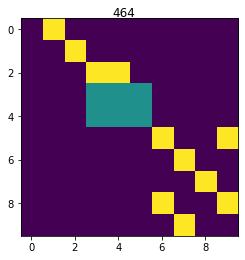

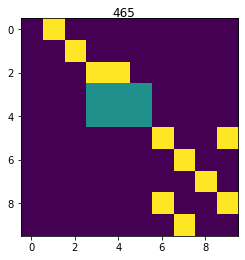

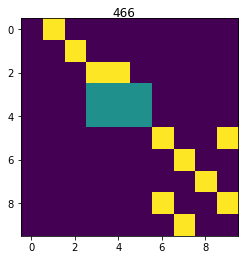

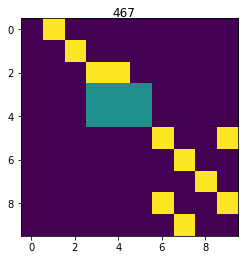

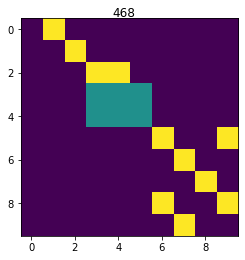

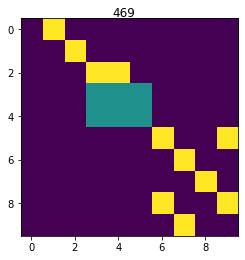

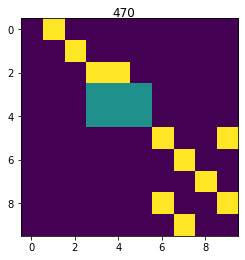

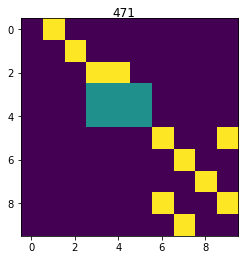

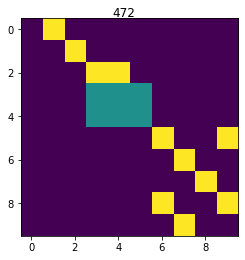

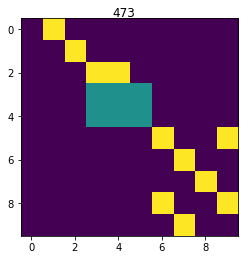

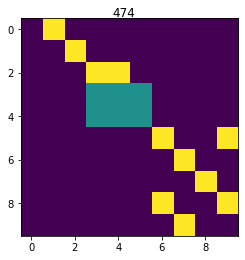

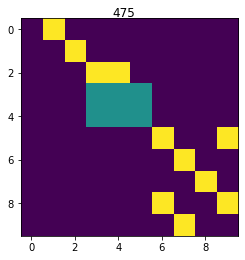

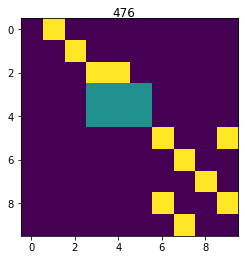

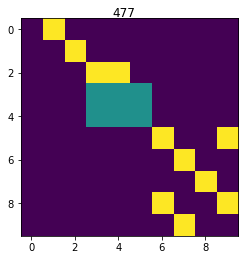

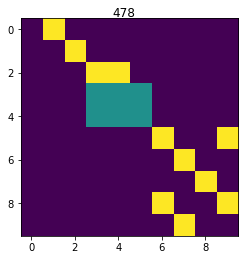

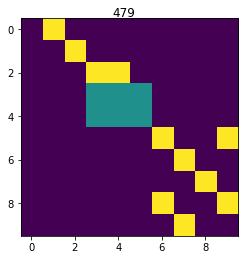

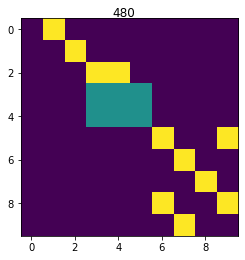

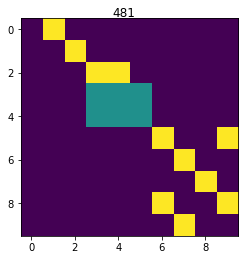

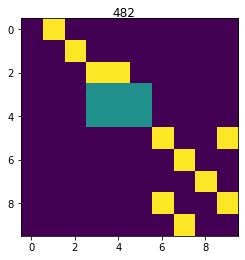

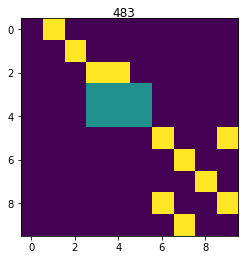

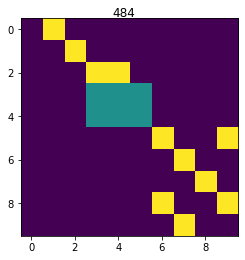

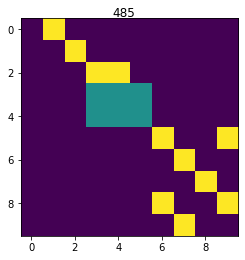

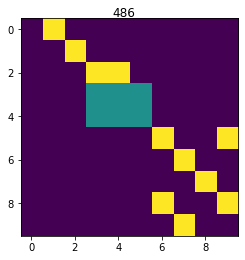

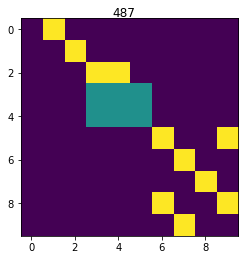

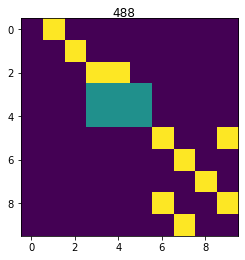

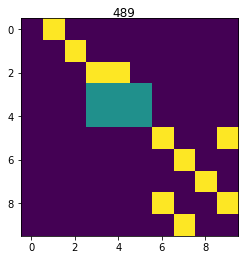

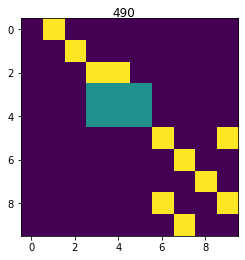

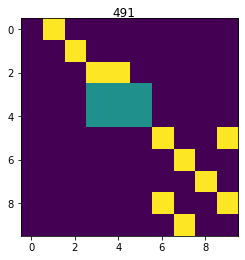

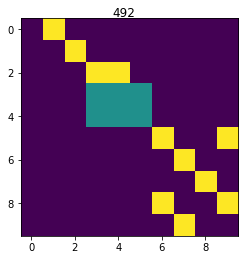

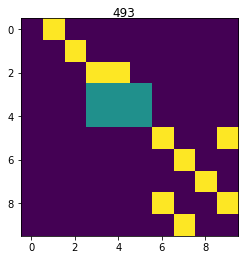

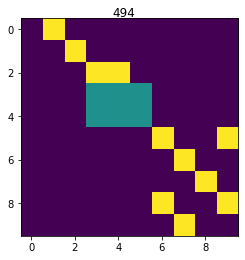

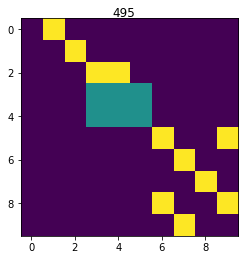

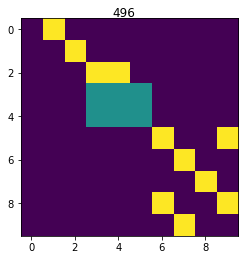

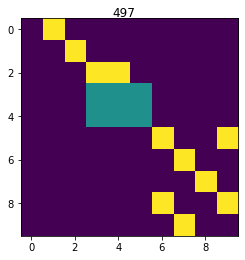

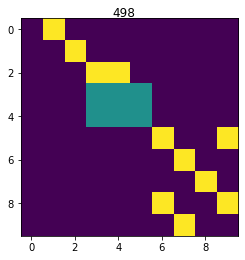

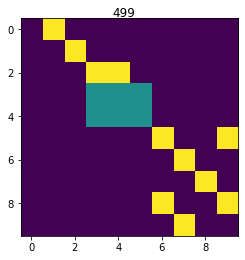

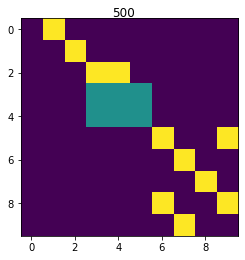

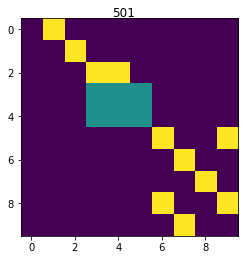

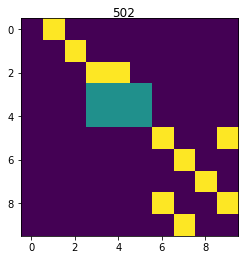

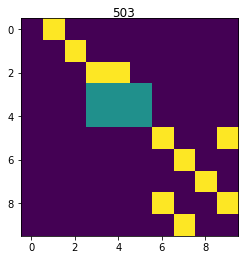

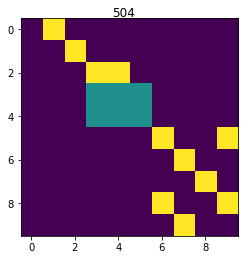

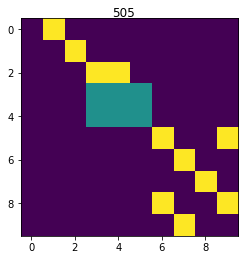

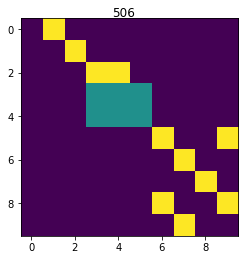

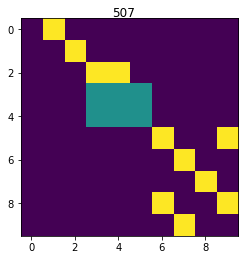

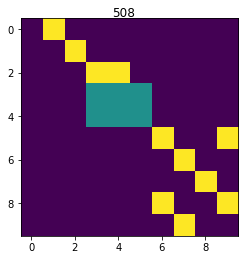

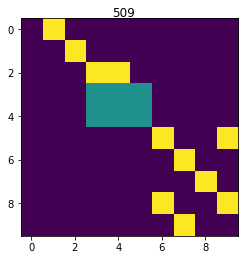

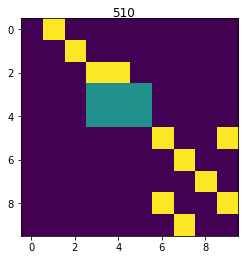

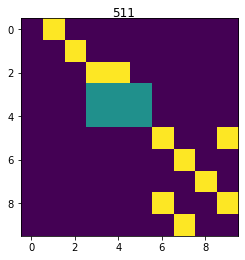

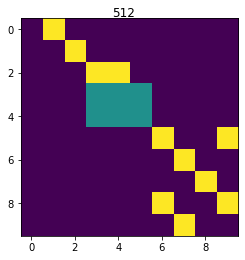

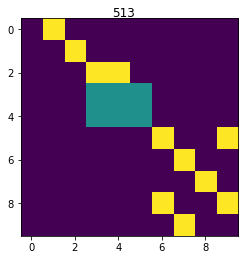

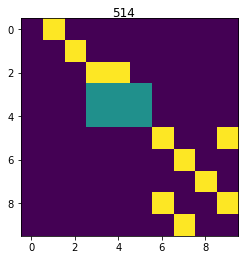

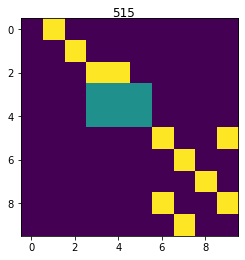

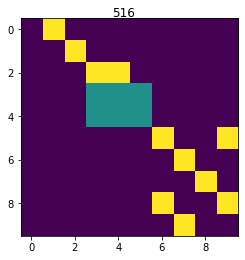

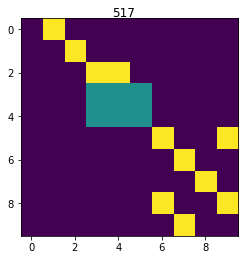

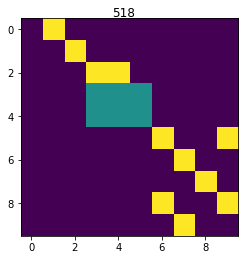

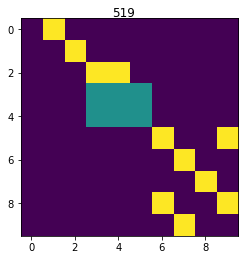

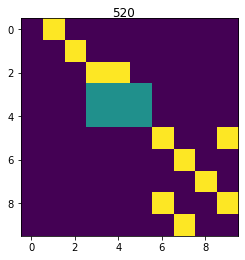

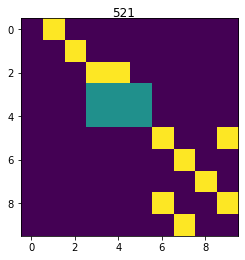

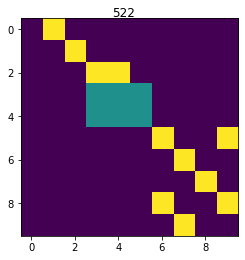

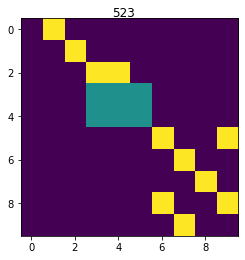

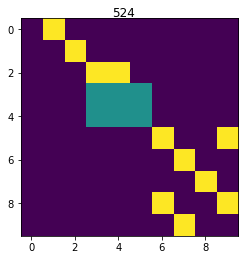

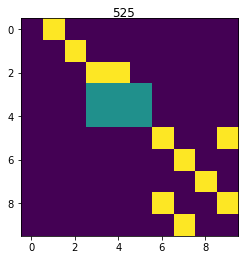

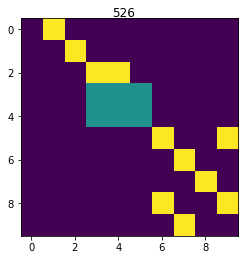

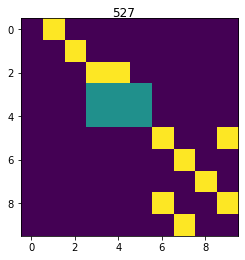

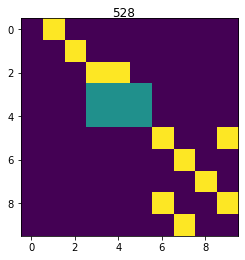

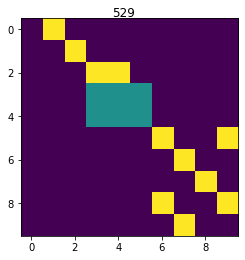

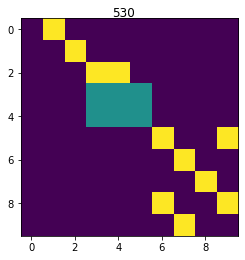

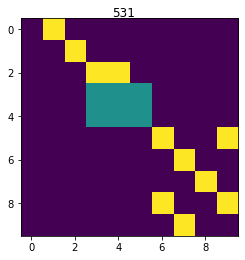

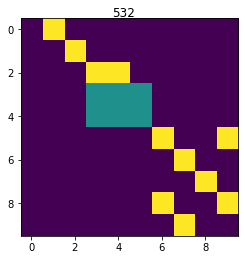

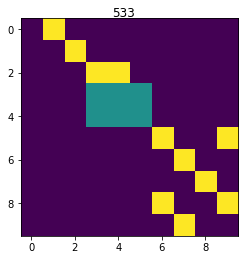

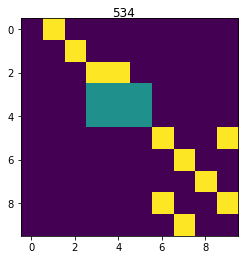

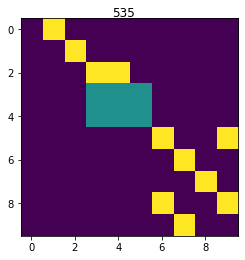

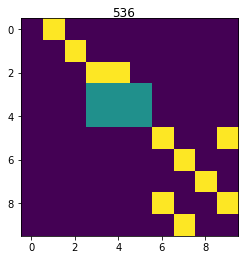

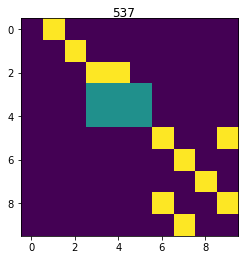

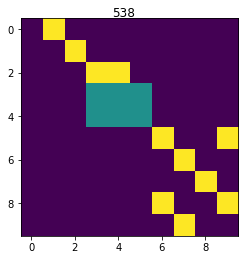

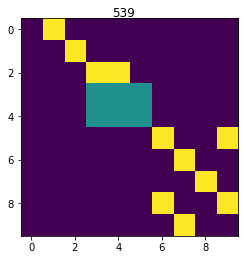

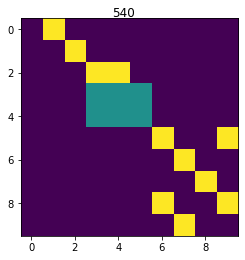

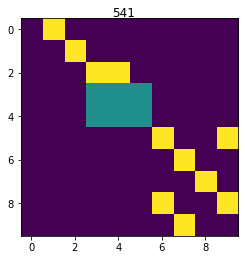

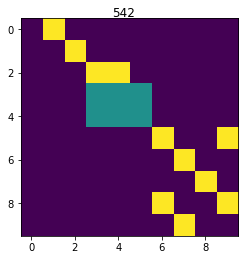

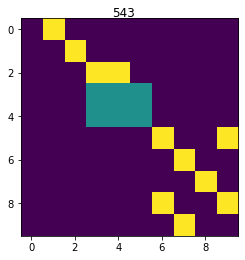

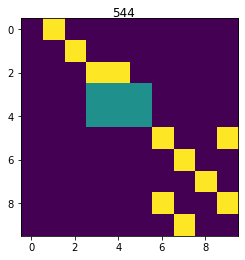

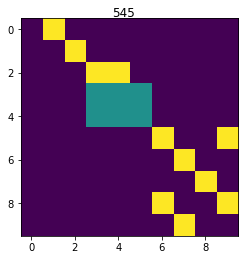

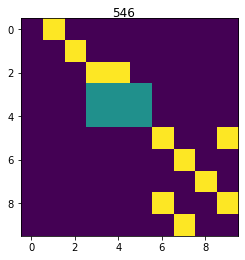

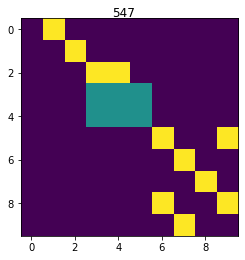

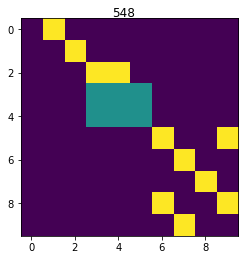

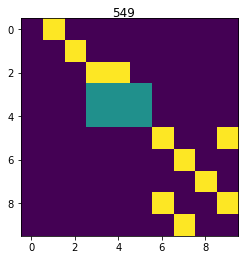

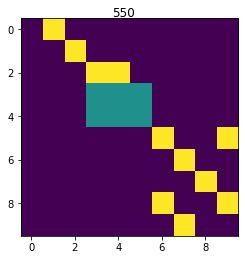

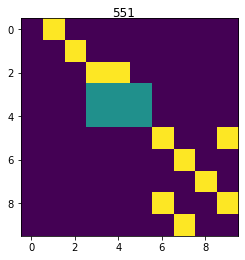

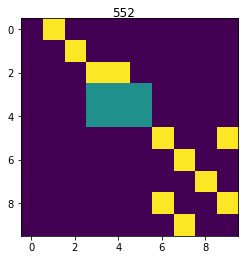

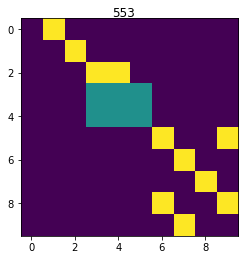

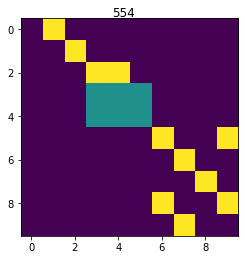

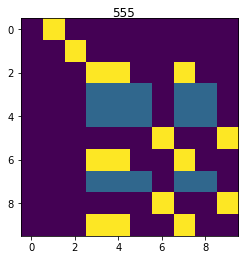

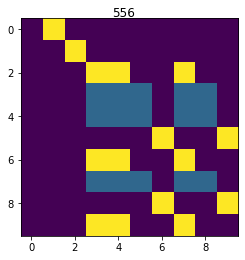

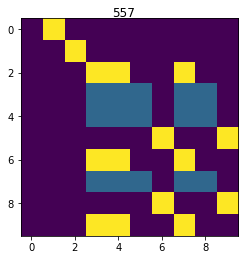

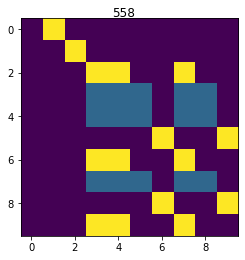

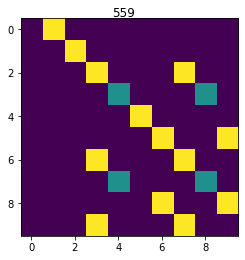

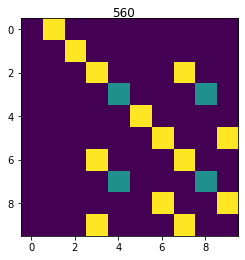

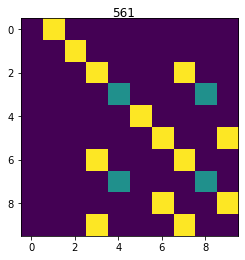

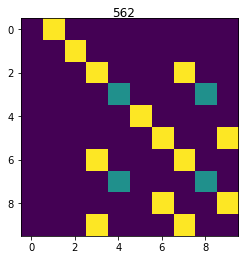

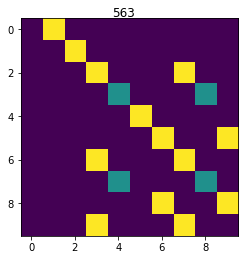

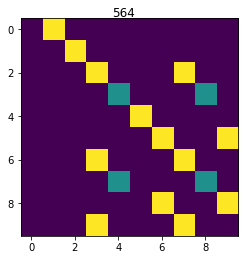

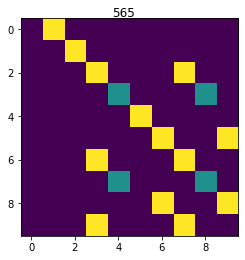

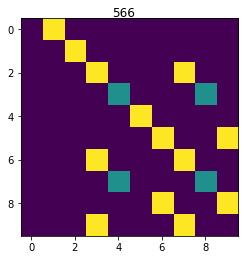

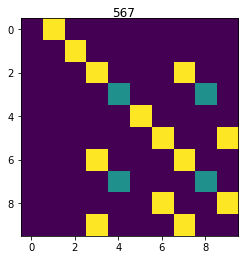

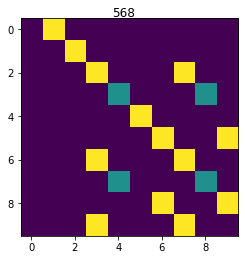

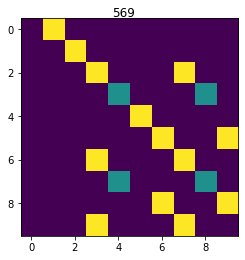

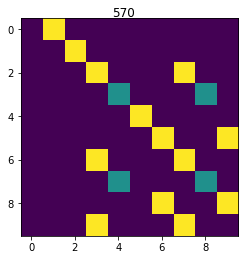

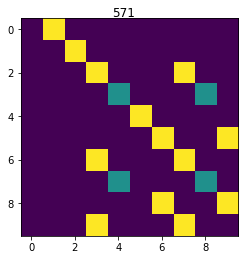

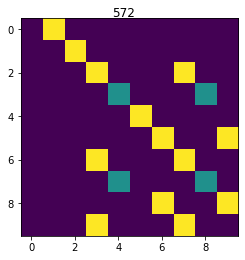

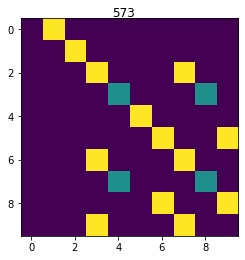

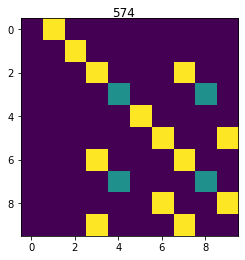

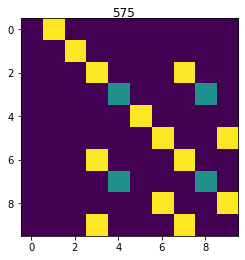

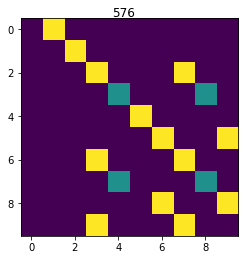

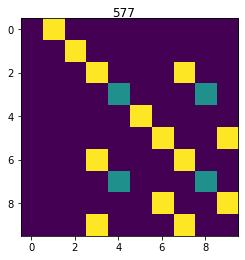

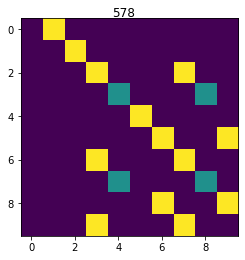

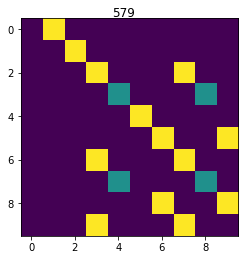

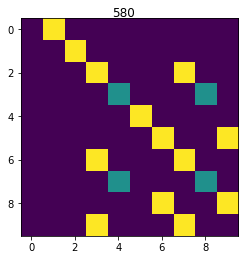

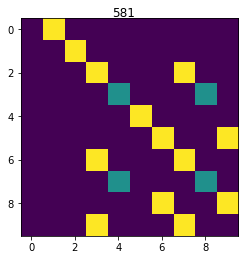

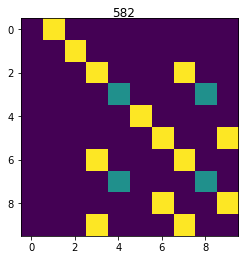

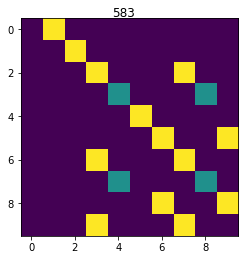

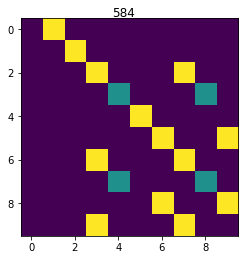

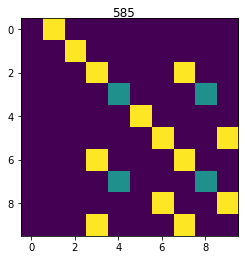

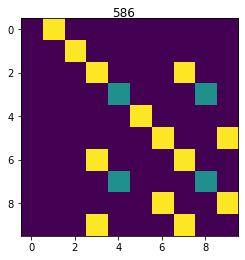

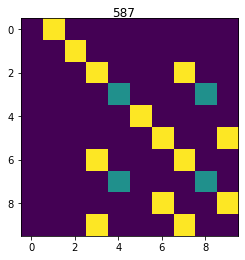

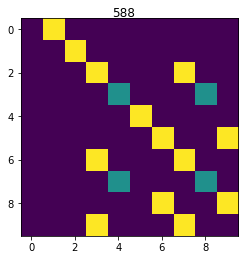

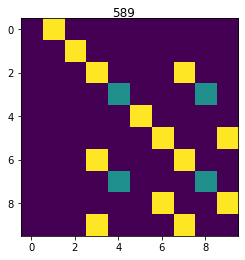

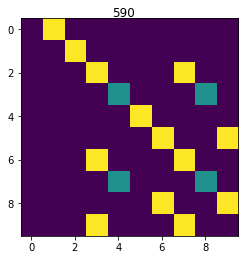

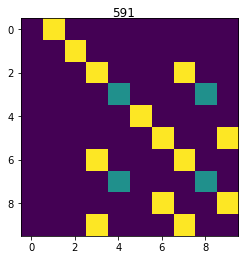

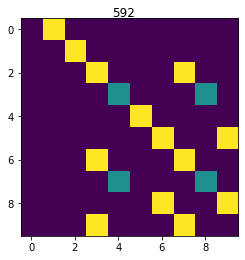

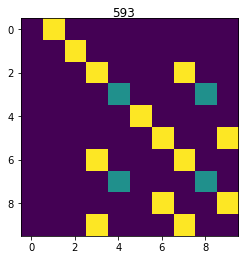

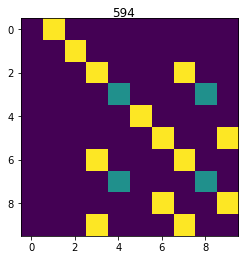

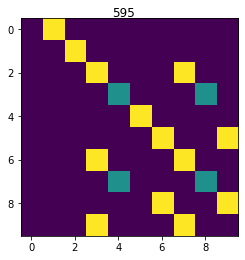

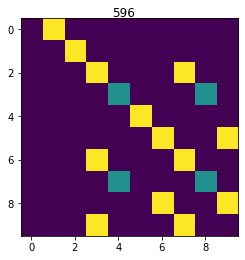

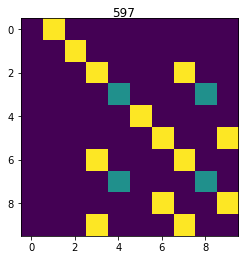

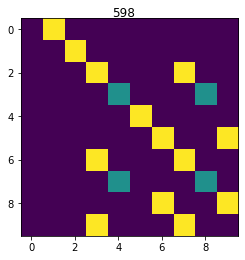

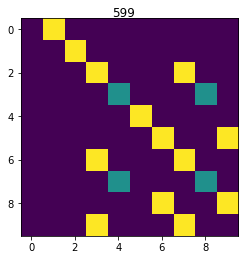

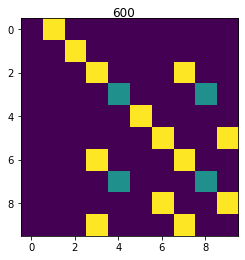

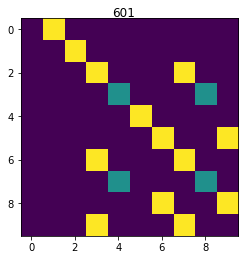

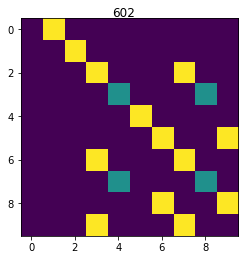

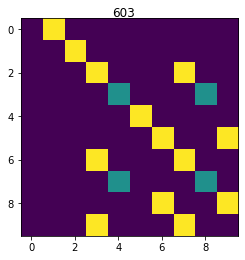

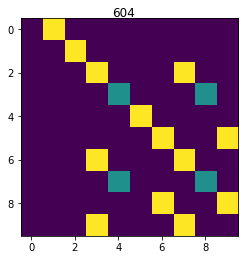

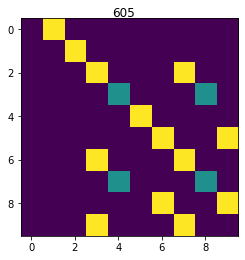

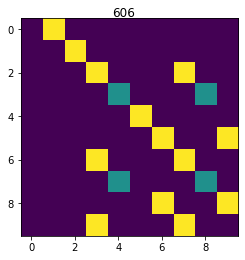

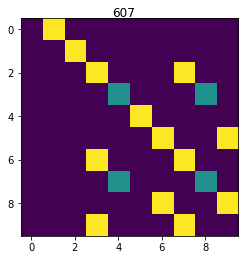

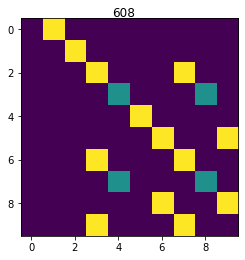

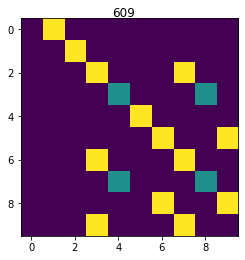

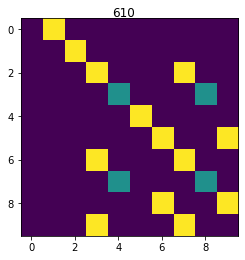

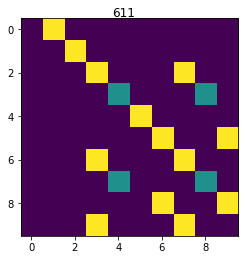

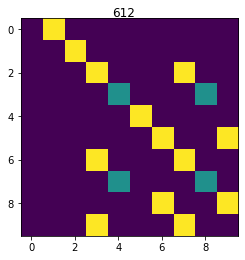

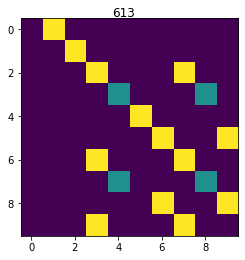

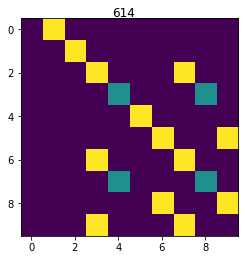

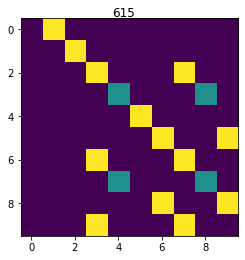

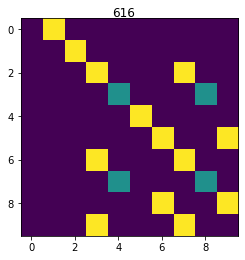

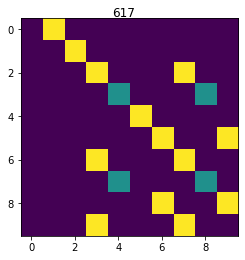

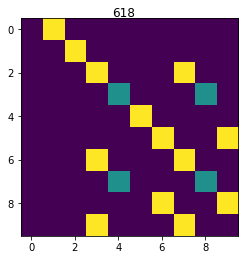

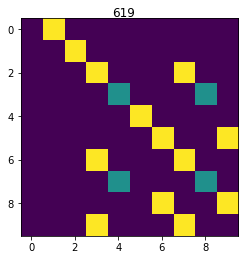

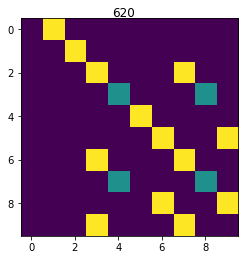

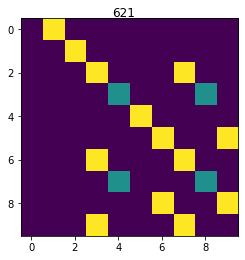

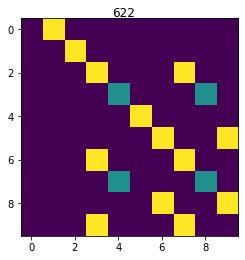

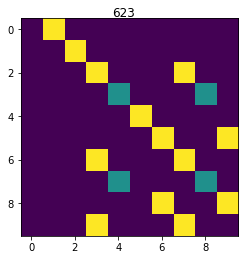

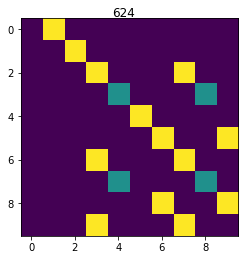

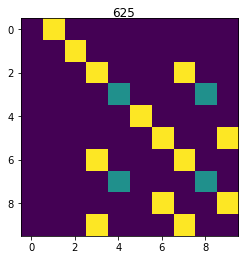

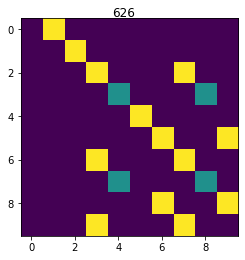

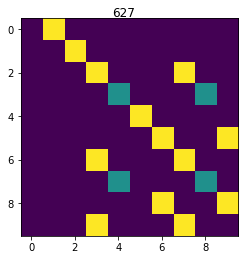

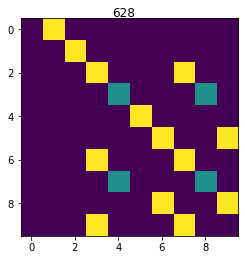

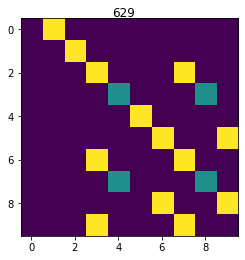

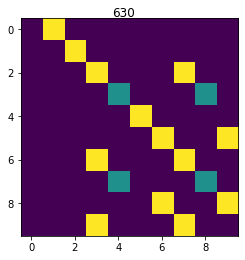

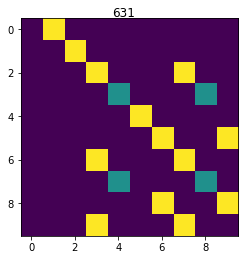

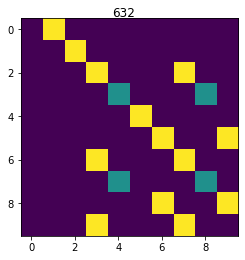

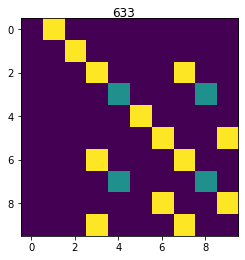

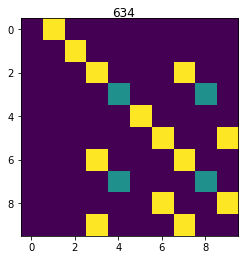

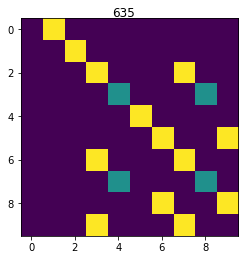

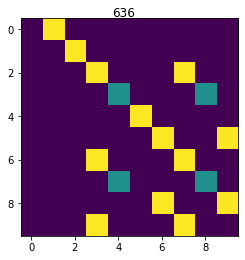

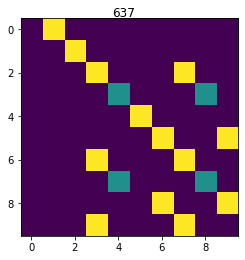

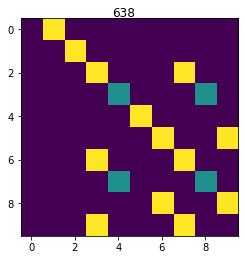

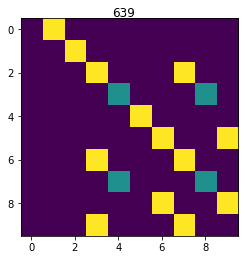

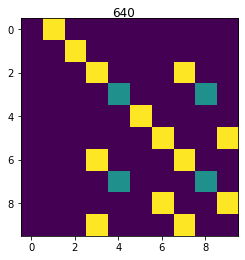

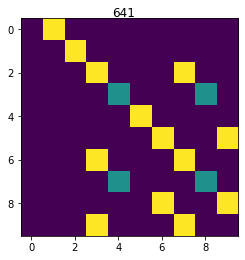

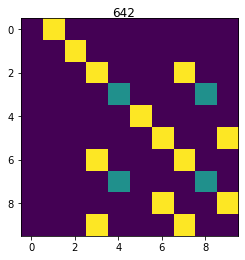

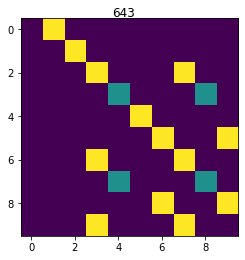

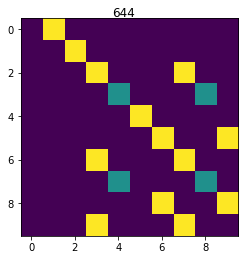

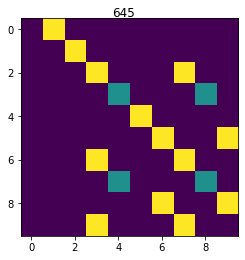

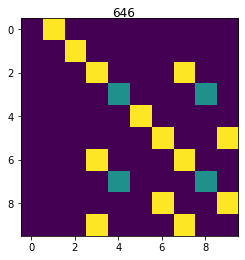

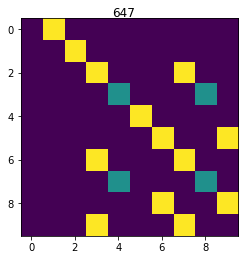

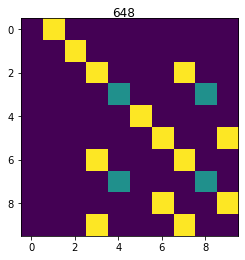

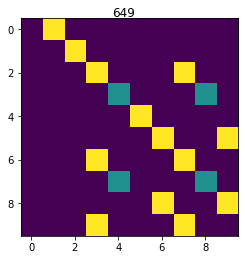

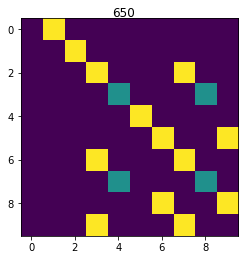

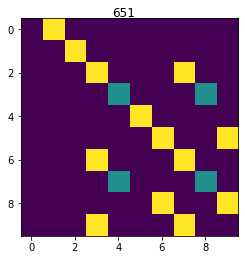

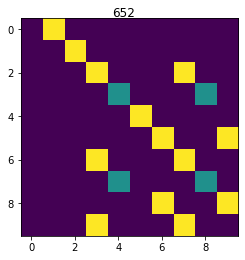

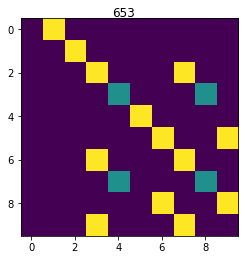

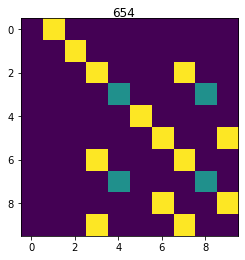

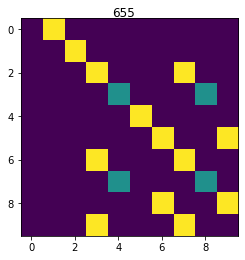

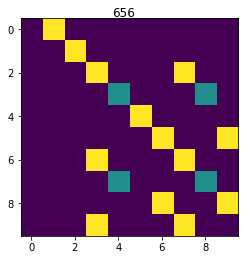

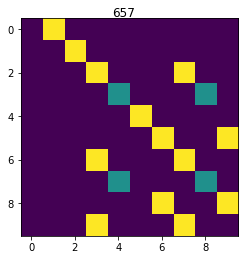

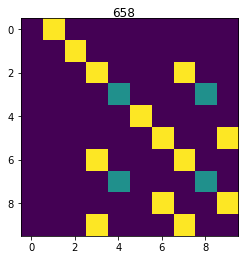

In [55]:
from pyts.image import MarkovTransitionField
import matplotlib.pyplot as plt

Xtrain = grt # both N x T time series samples
mtf = MarkovTransitionField()
im_train = mtf.fit_transform(Xtrain)
#im_test = mtf.transform(Xtest)
# plot one image
for i in range(0,659):
    plt.suptitle(i, y=0.92)
    plt.imshow(im_train[i])
    plt.show()

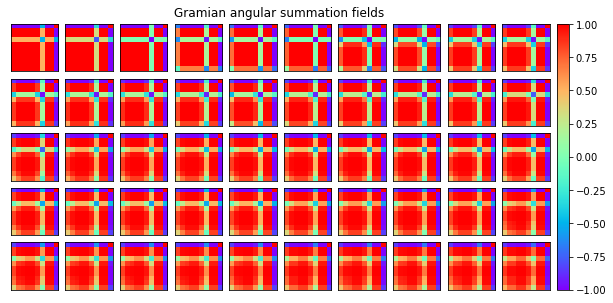

In [56]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField

# Load the GunPoint dataset
X  = grt

# Get the Gramian angular summation fields for all the time series
gaf = GramianAngularField()
X_gaf = gaf.fit_transform(X)

# Plot the 50 Gramian angular fields
fig = plt.figure(figsize=(10, 5))

grid = ImageGrid(fig, 111, nrows_ncols=(5, 10), axes_pad=0.1, share_all=True,
                 cbar_mode='single')
for i, ax in enumerate(grid):
    im = ax.imshow(X_gaf[i], cmap='rainbow', origin='lower', vmin=-1., vmax=1.)
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.colorbar(im, cax=grid.cbar_axes[0])
ax.cax.toggle_label(True)

fig.suptitle("Gramian angular summation fields ", y=0.92)

plt.show()

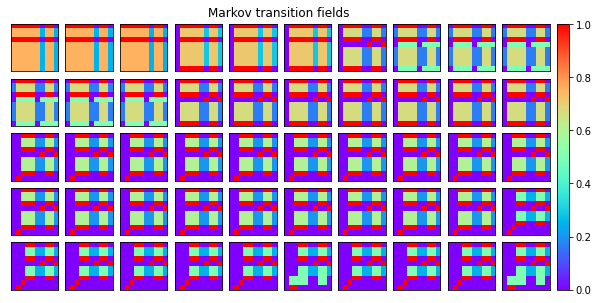

In [57]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import MarkovTransitionField

# Load the GunPoint dataset
X  =grt

# Get the recurrence plots for all the time series
mtf = MarkovTransitionField(n_bins=8)
X_mtf = mtf.fit_transform(X)

# Plot the 50 Gramian angular fields
fig = plt.figure(figsize=(10, 5))

grid = ImageGrid(fig, 111, nrows_ncols=(5, 10), axes_pad=0.1, share_all=True,
                 cbar_mode='single')
for i, ax in enumerate(grid):
    im = ax.imshow(X_mtf[i], cmap='rainbow', origin='lower', vmin=0., vmax=1.)
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
plt.colorbar(im, cax=grid.cbar_axes[0])
ax.cax.toggle_label(True)

fig.suptitle("Markov transition fields ", y=0.92)

plt.show()

In [68]:
ret = grt.set_index('eventSec')

In [69]:
ret.head()

eventName_Duel  eventName_Foul  eventName_Free Kick  \
eventSec                                                        
4.0                    0               0                    0   
6.0                    0               0                    0   
8.0                    0               0                    0   
12.0                   2               0                    0   
14.0                   2               0                    0   

          eventName_Goalkeeper leaving line  eventName_Offside  \
eventSec                                                         
4.0                                       0                  0   
6.0                                       0                  0   
8.0                                       0                  0   
12.0                                      0                  0   
14.0                                      0                  0   

          eventName_Others on the ball  eventName_Pass  \
eventSec                                                 
4.0                                  0               1   
6.0                                  0               2   
8.0                                  0               4   
12.0                                 0               5   
14.0                                 0               6   

          eventName_Save attempt  eventName_Shot  
eventSec                                          
4.0                            0               0  
6.0                            0               0  
8.0                            0               0  
12.0                           0               0  
14.0                           0               0

In [75]:
for index,rows in ret.iterrows():
    ret['eventName_Duel'] = ret['eventName_Duel']/index
    ret['eventName_Foul'] = ret['eventName_Foul']/index
    ret['eventName_Free Kick'] = ret['eventName_Free Kick']/index
    ret['eventName_Goalkeeper leaving line'] = ret['eventName_Goalkeeper leaving line']/index
    ret['eventName_Offside'] = ret['eventName_Offside']/index
    ret['eventName_Others on the ball'] = ret['eventName_Others on the ball']/index
    ret['eventName_Pass'] = ret['eventName_Pass']/index
    ret['eventName_Save attempt'] = ret['eventName_Save attempt']/index
    ret['eventName_Shot'] = ret['eventName_Shot']/index
    
    

TypeError: cannot convert the series to <class 'float'>

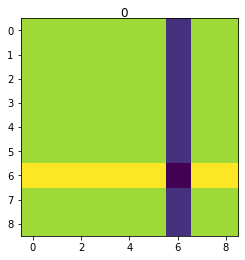

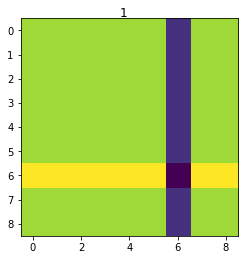

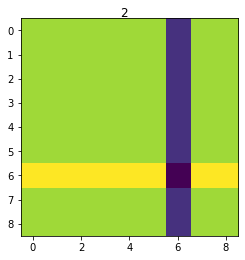

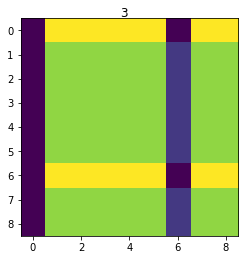

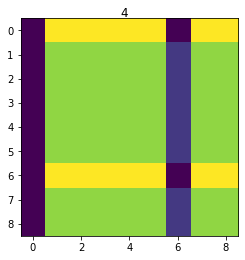

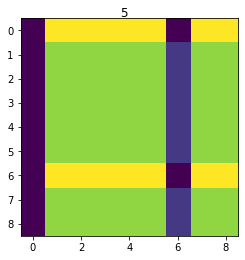

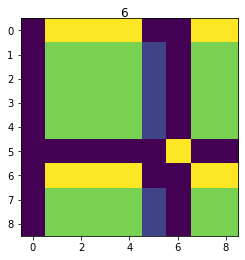

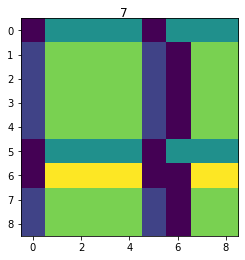

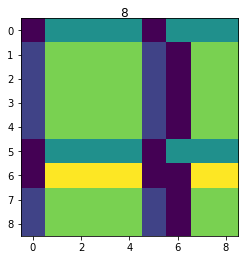

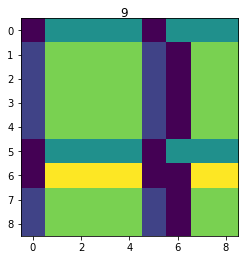

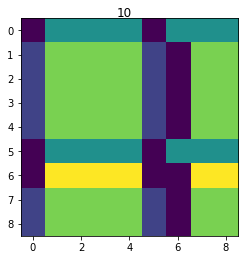

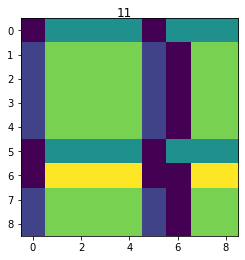

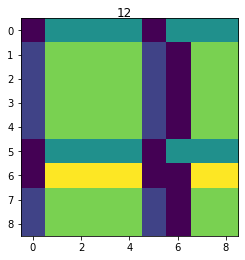

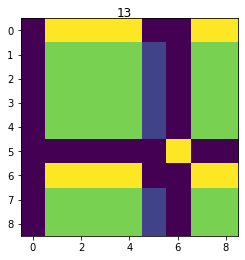

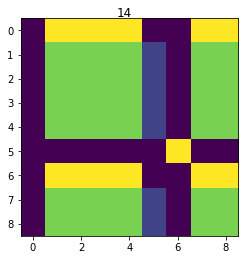

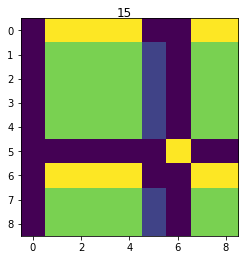

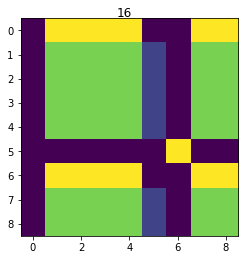

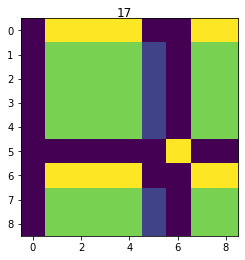

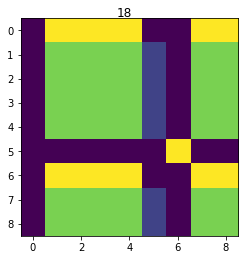

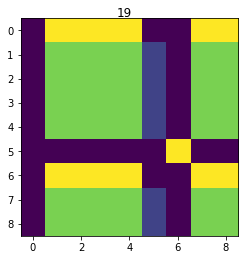

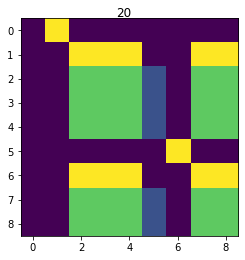

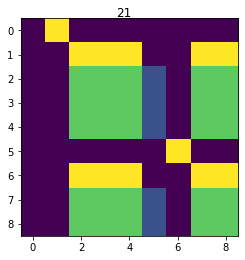

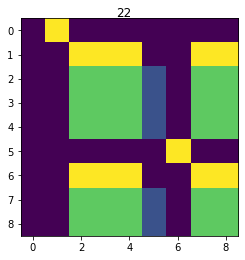

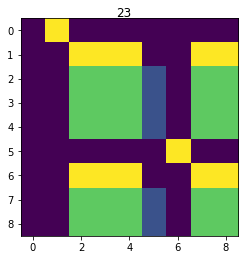

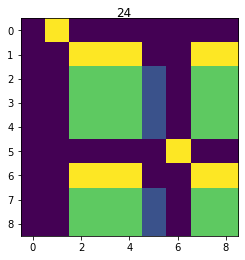

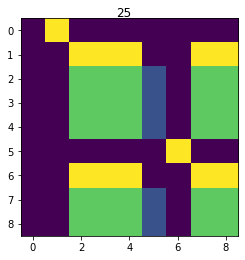

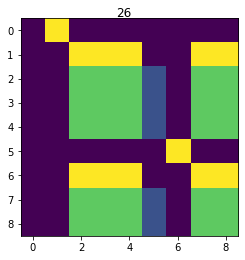

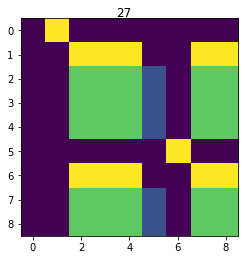

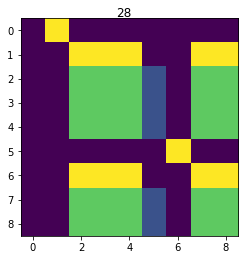

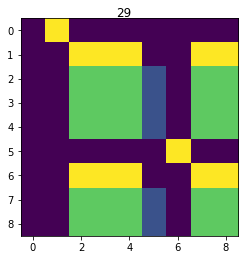

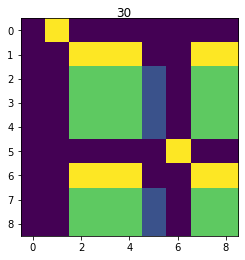

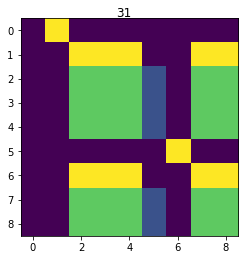

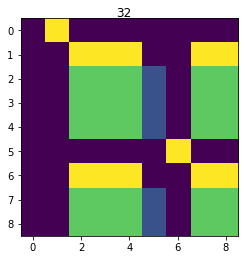

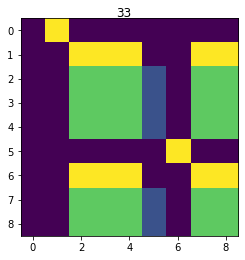

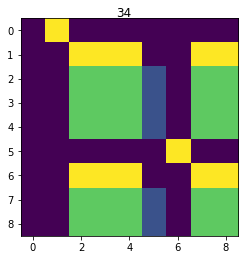

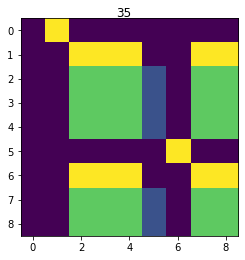

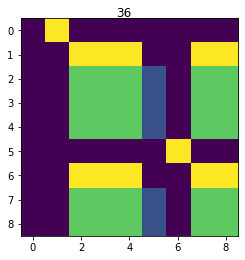

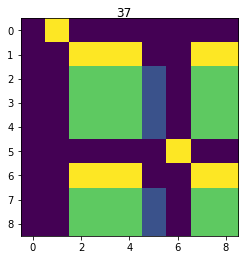

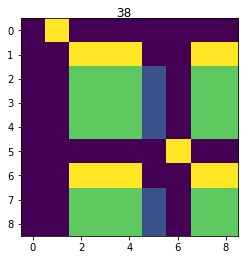

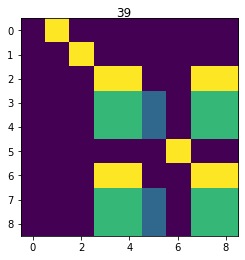

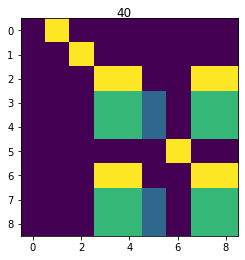

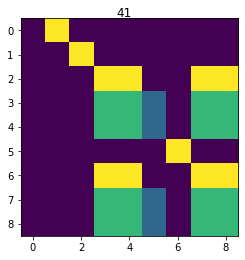

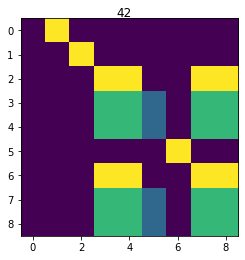

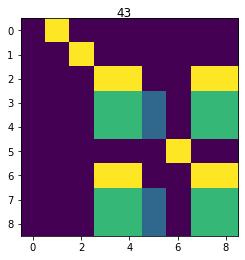

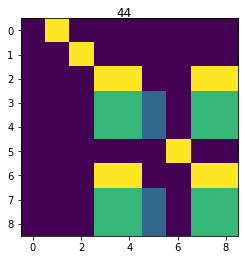

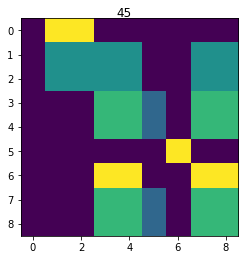

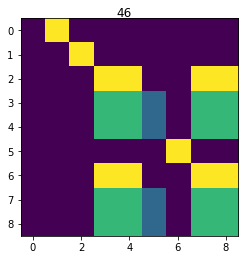

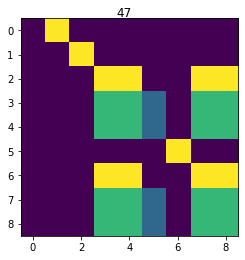

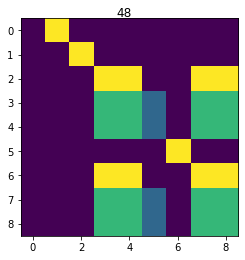

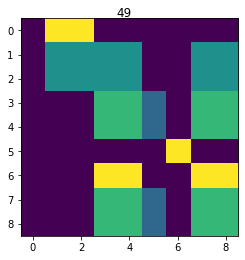

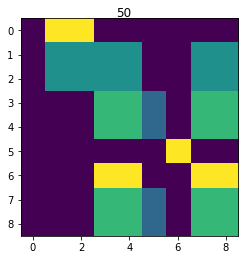

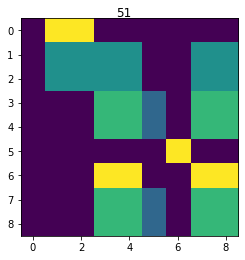

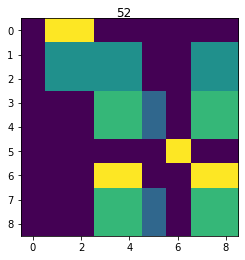

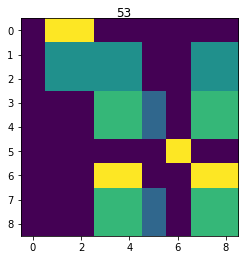

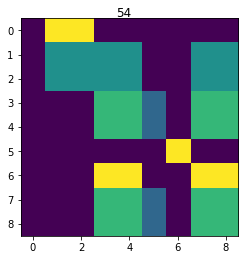

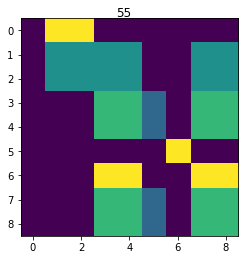

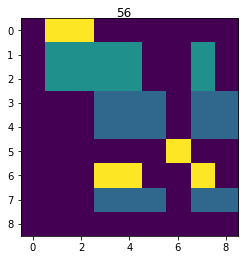

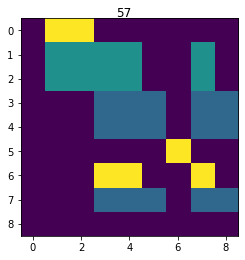

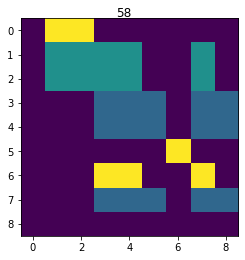

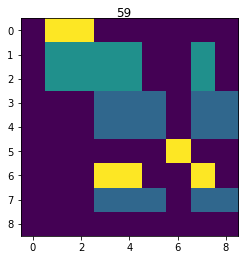

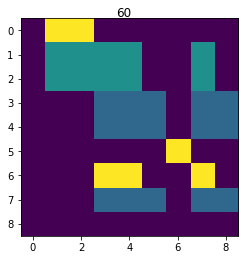

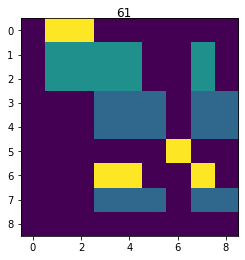

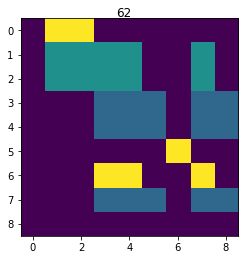

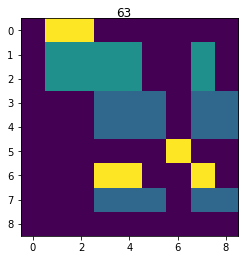

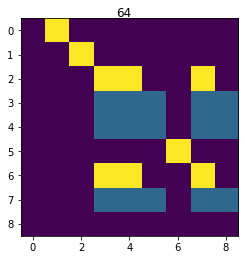

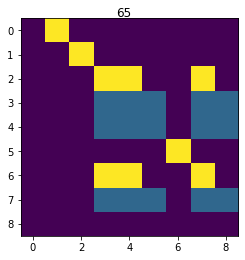

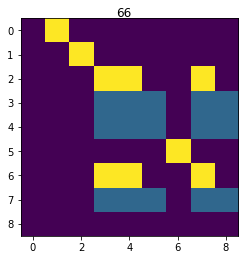

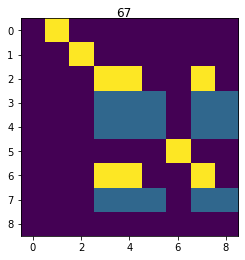

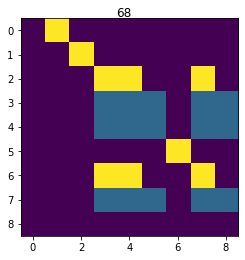

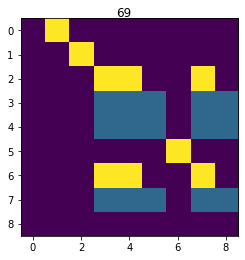

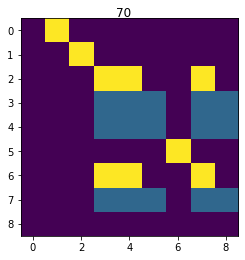

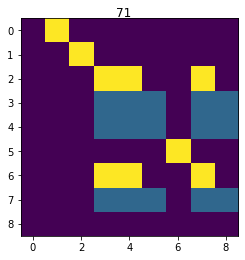

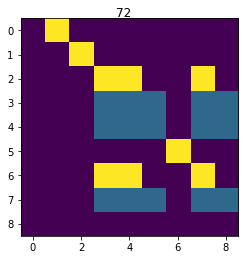

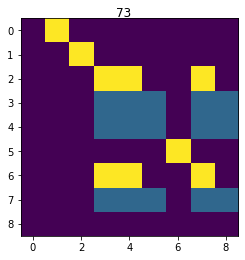

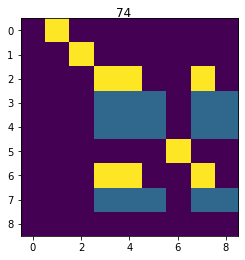

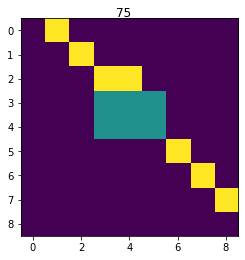

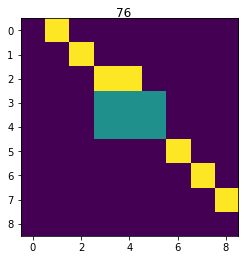

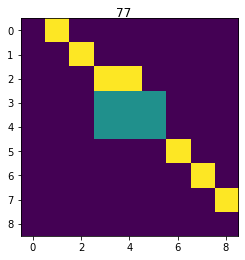

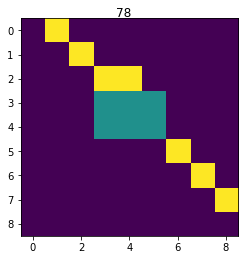

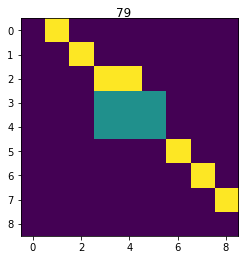

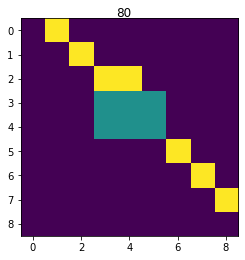

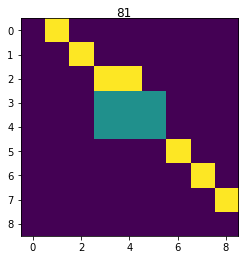

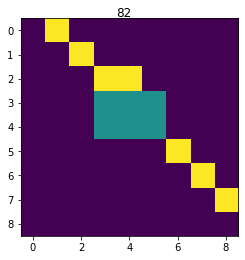

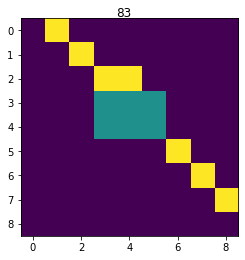

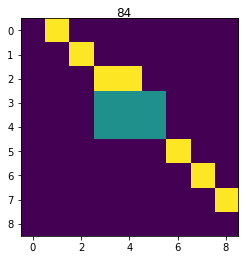

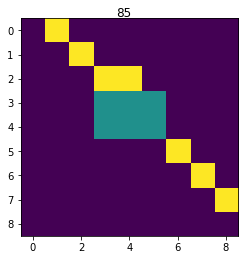

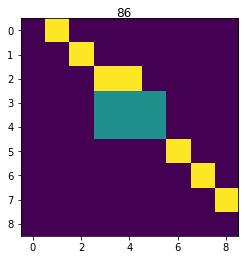

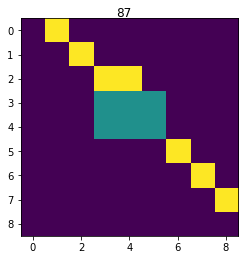

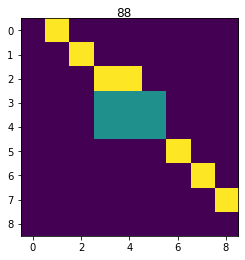

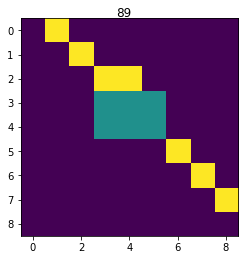

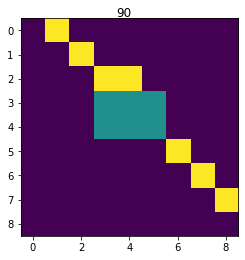

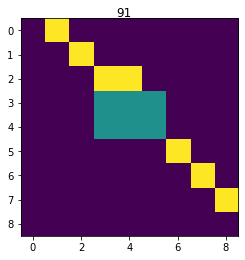

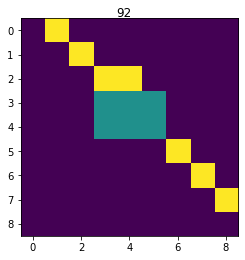

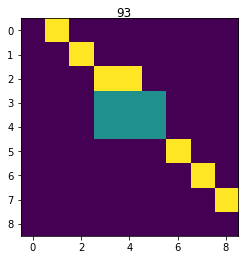

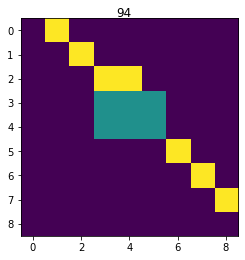

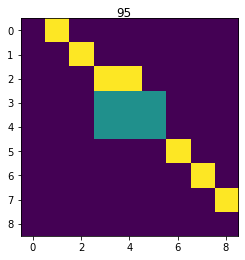

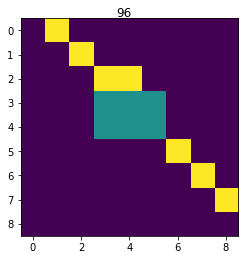

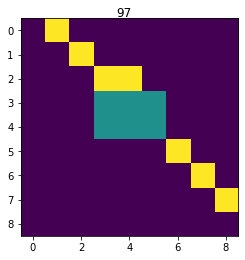

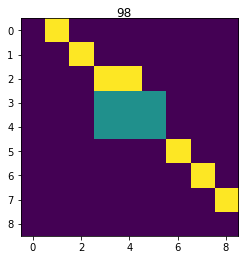

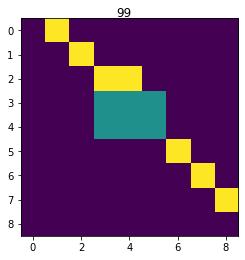

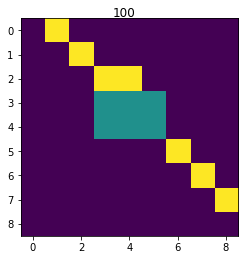

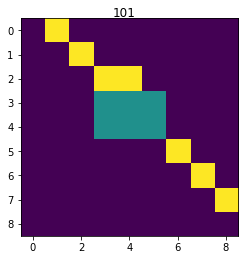

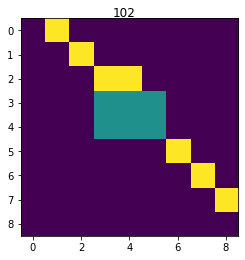

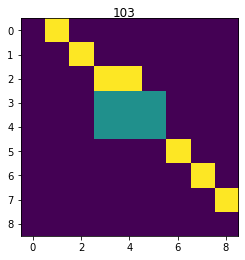

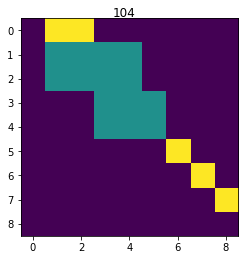

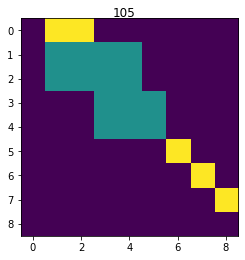

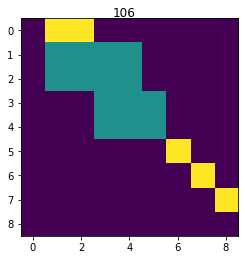

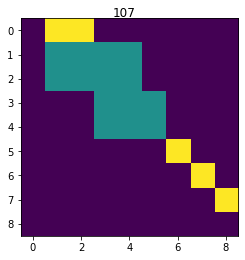

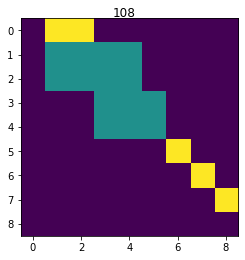

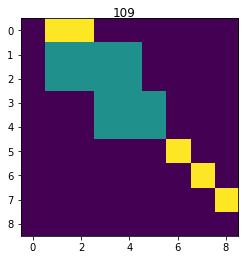

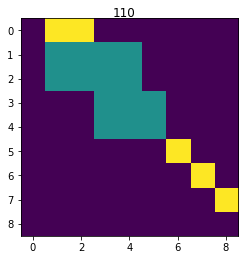

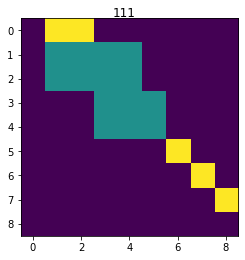

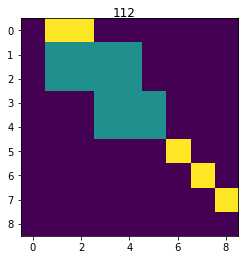

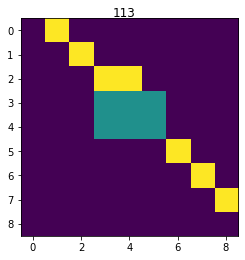

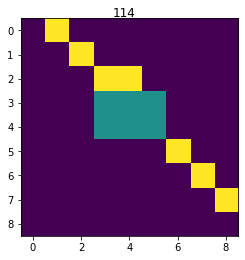

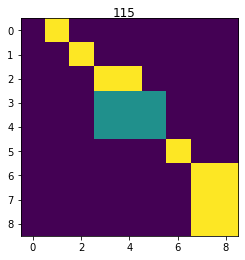

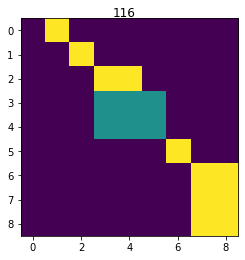

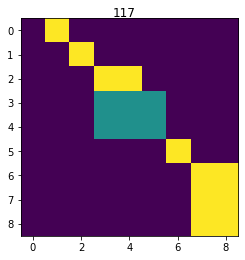

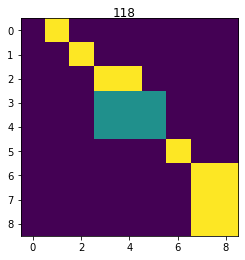

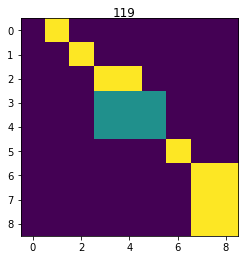

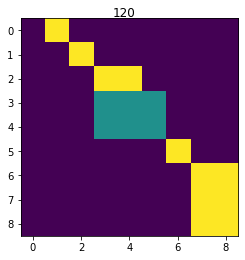

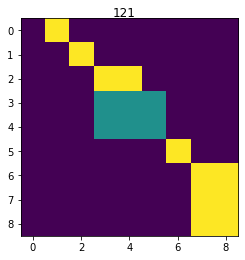

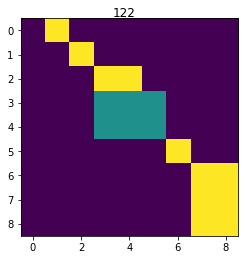

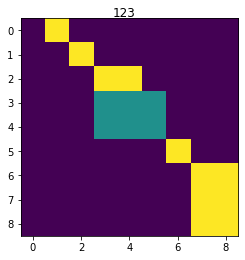

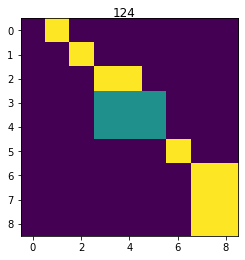

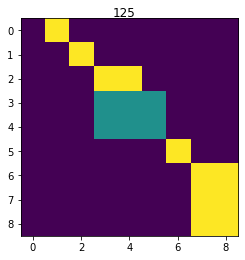

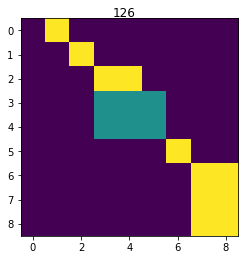

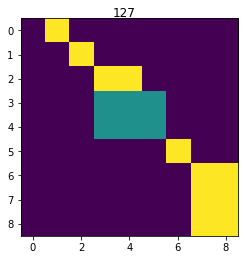

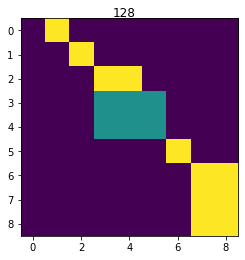

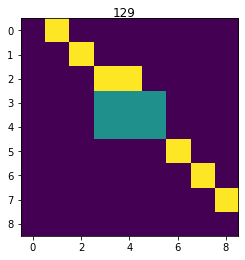

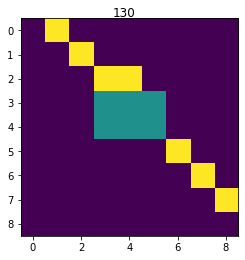

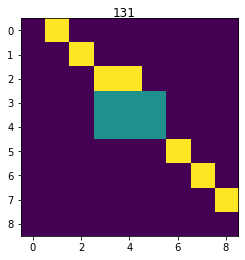

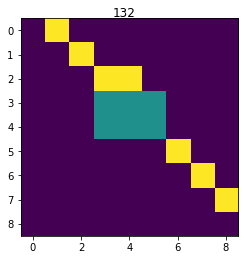

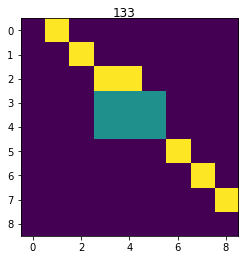

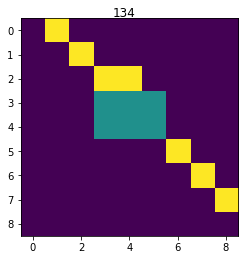

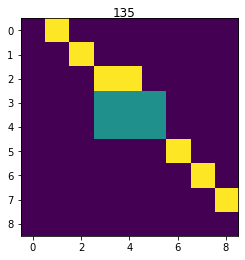

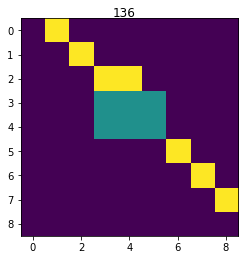

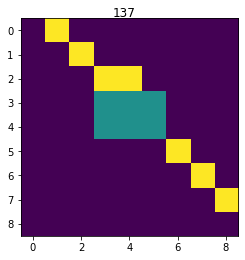

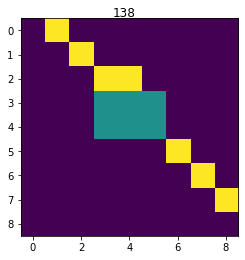

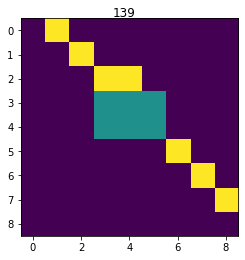

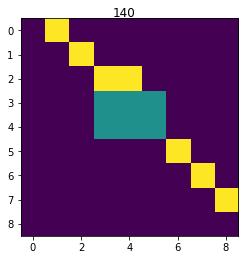

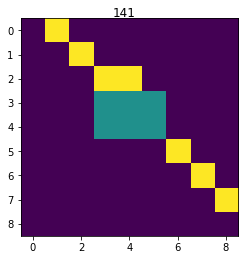

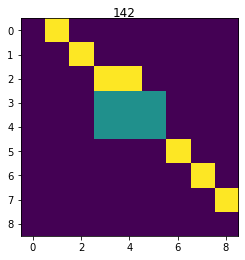

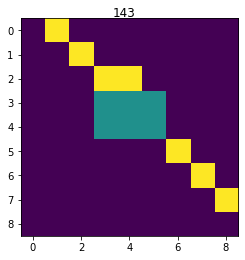

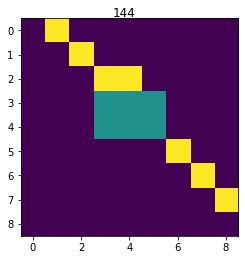

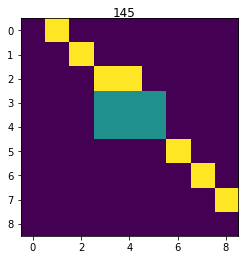

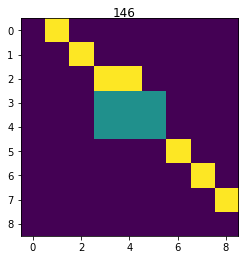

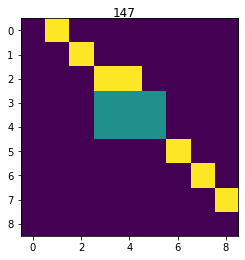

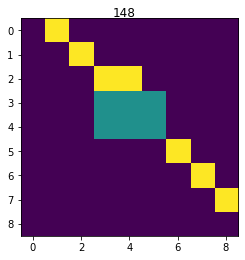

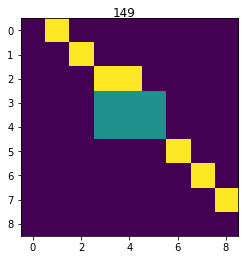

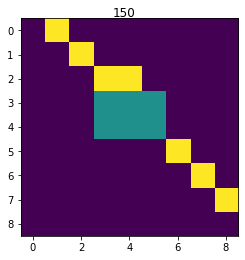

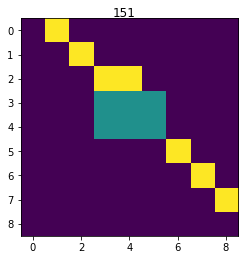

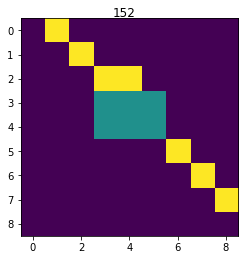

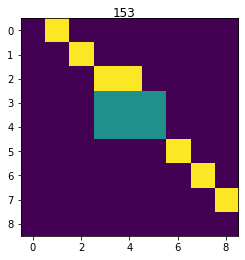

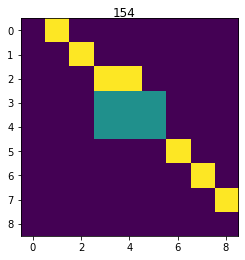

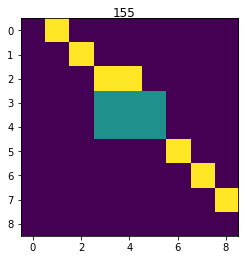

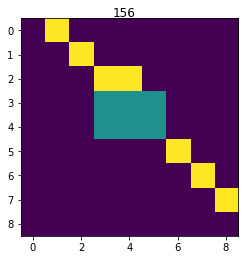

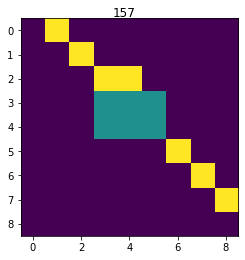

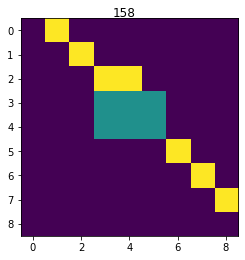

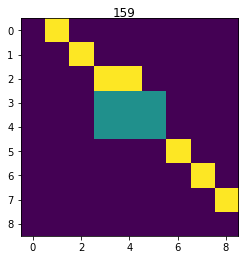

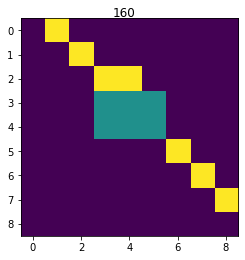

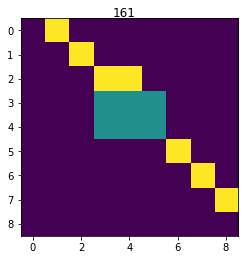

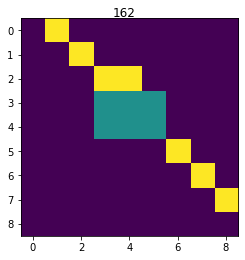

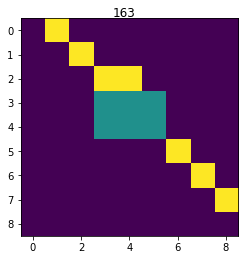

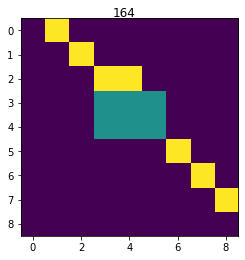

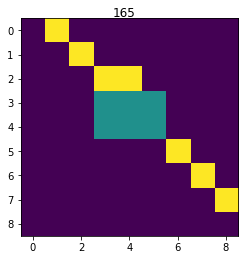

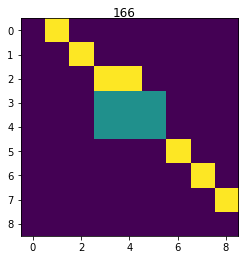

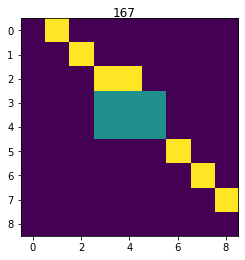

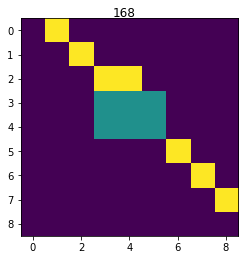

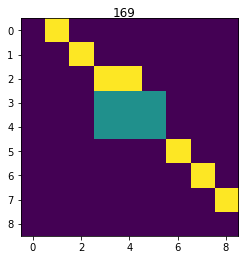

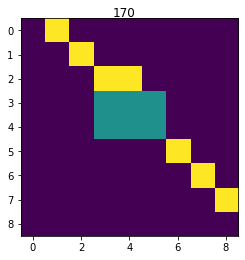

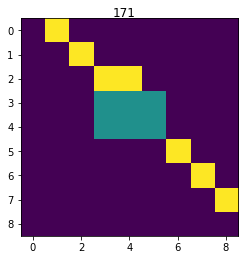

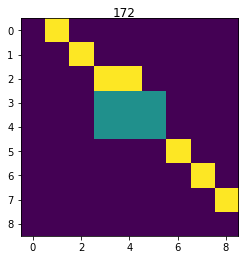

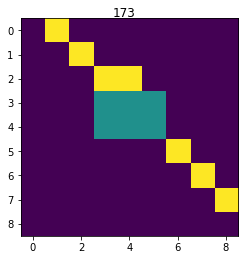

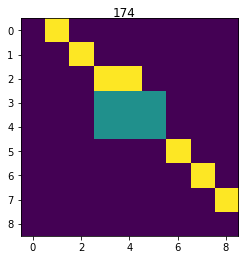

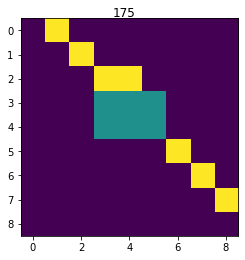

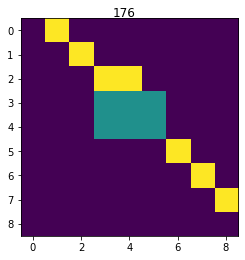

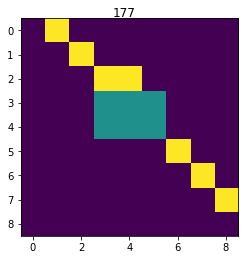

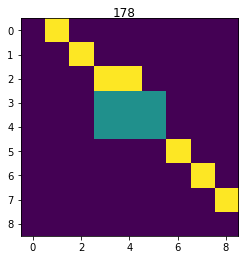

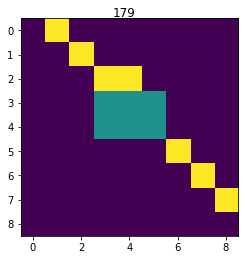

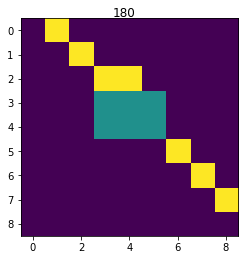

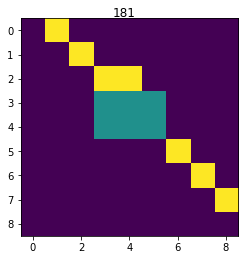

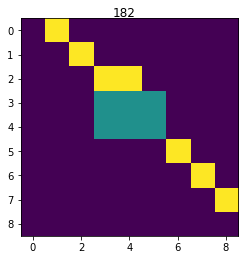

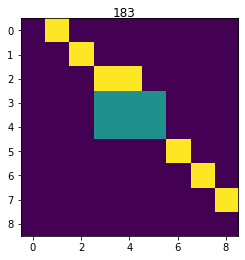

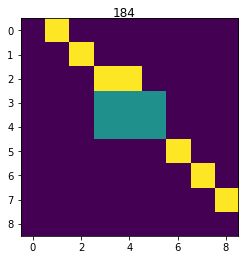

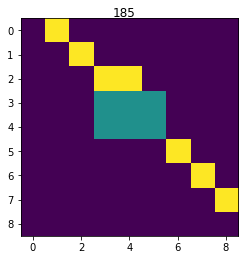

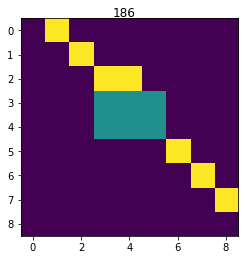

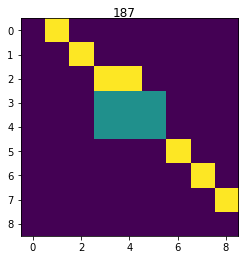

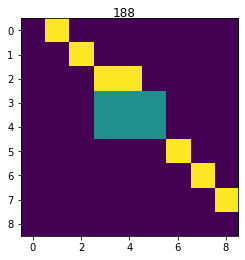

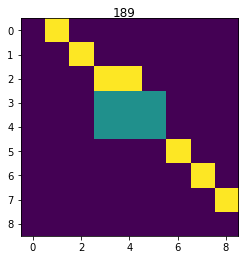

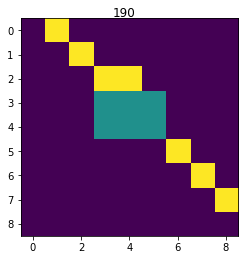

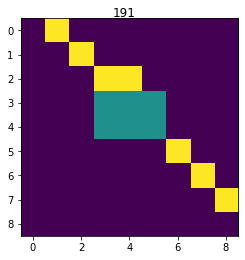

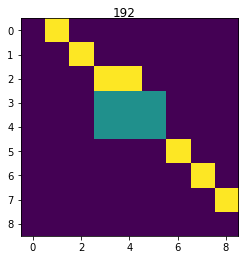

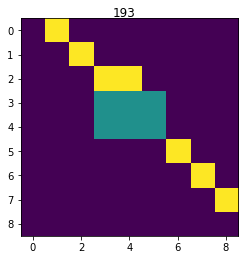

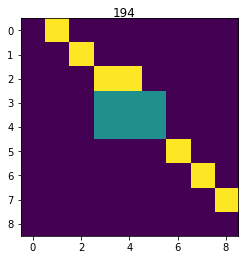

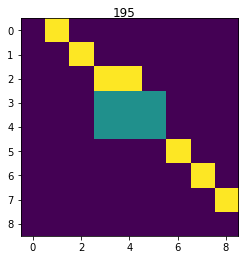

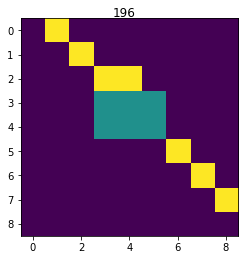

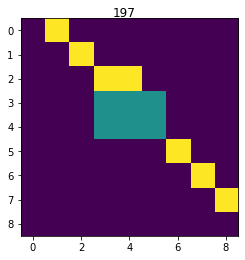

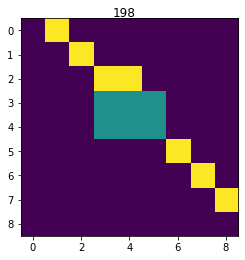

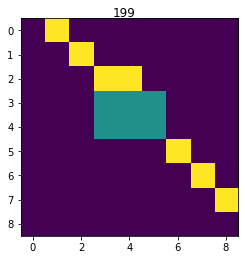

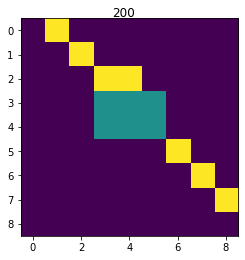

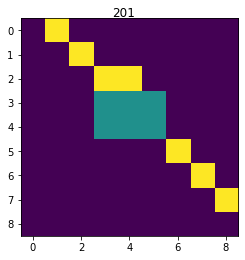

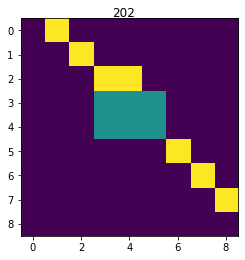

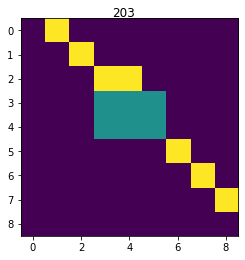

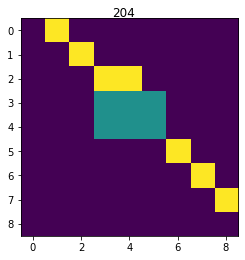

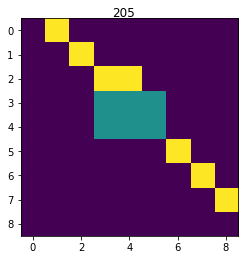

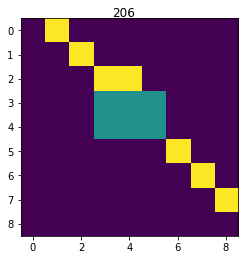

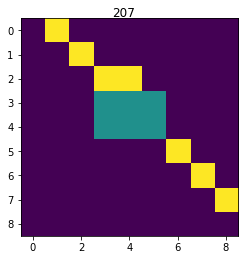

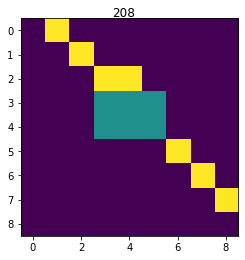

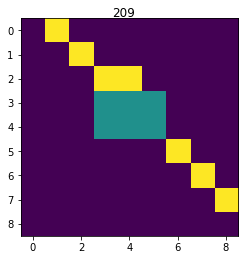

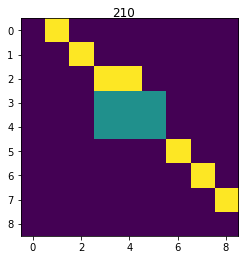

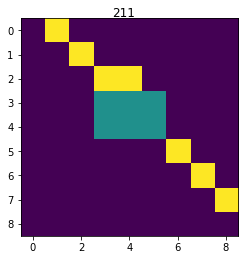

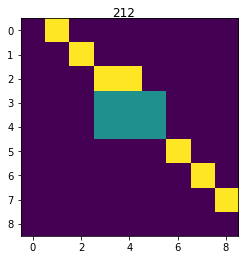

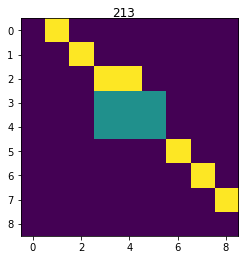

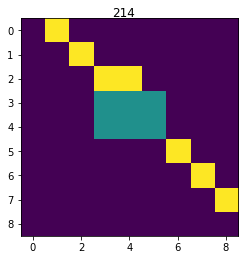

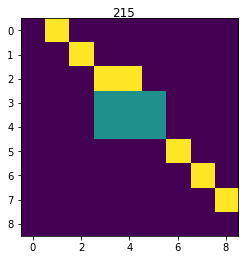

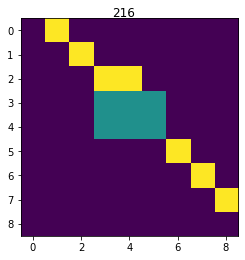

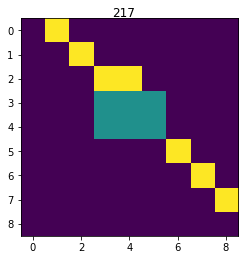

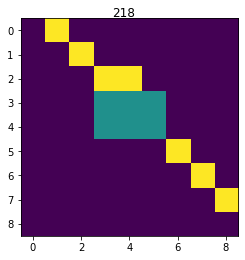

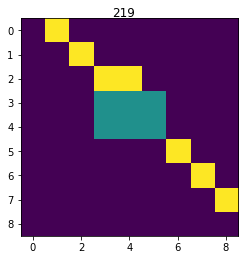

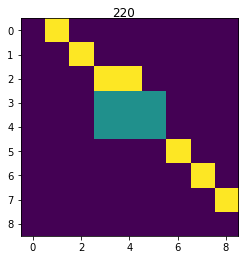

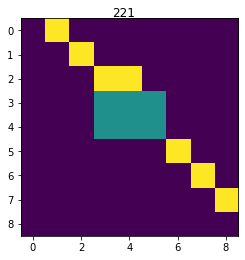

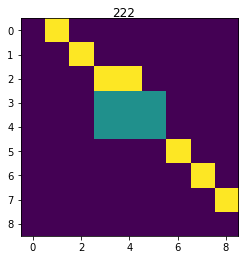

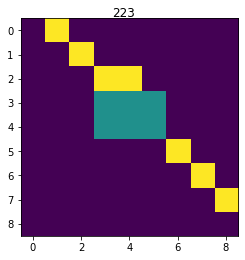

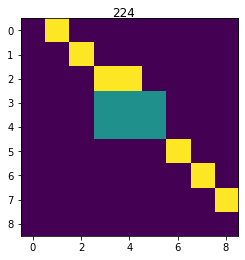

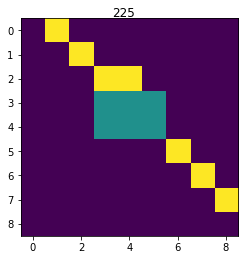

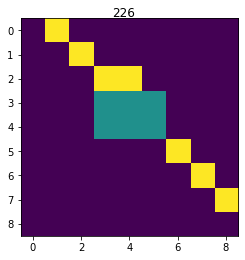

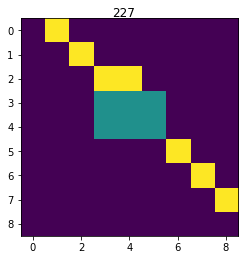

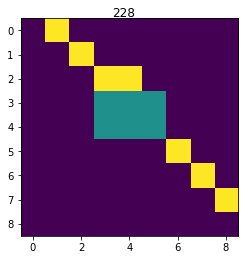

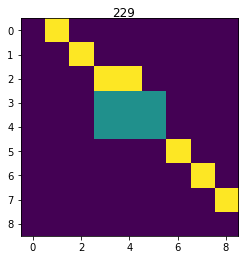

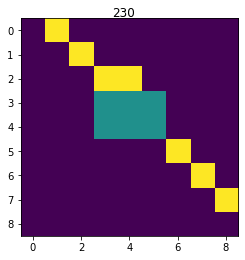

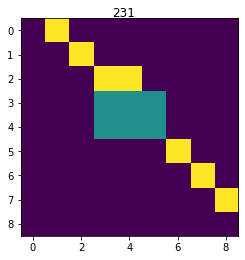

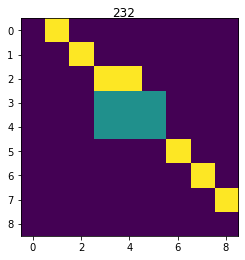

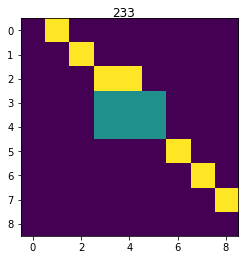

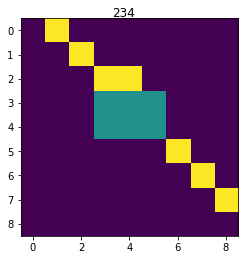

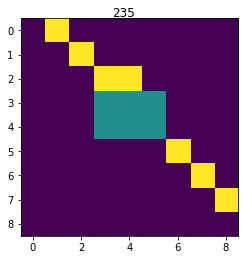

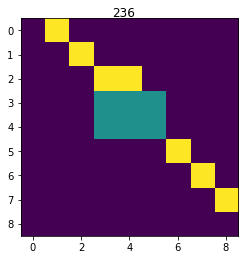

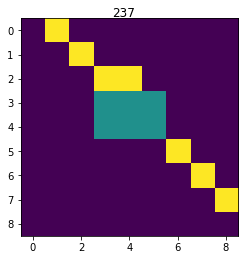

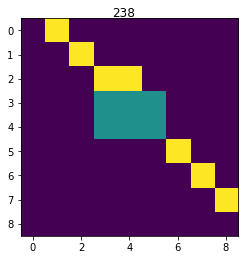

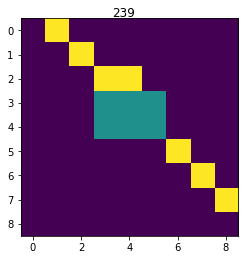

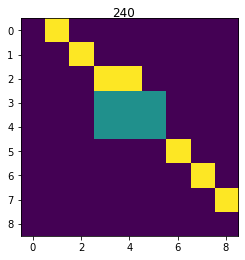

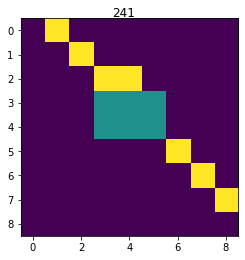

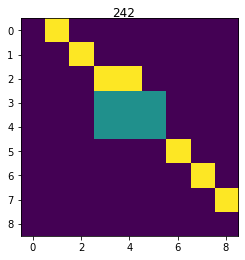

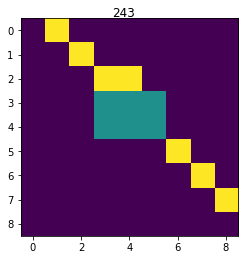

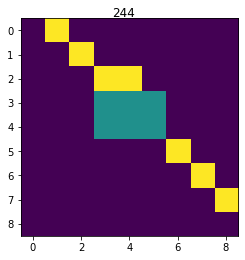

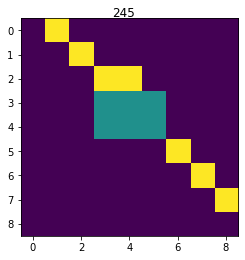

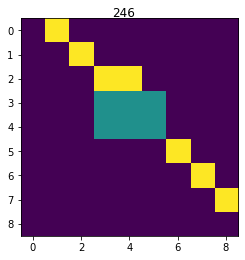

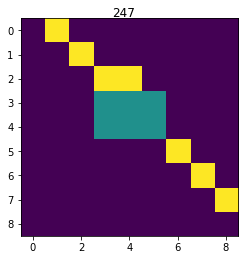

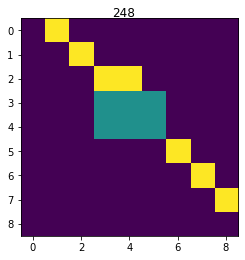

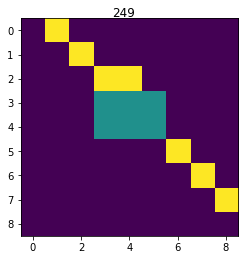

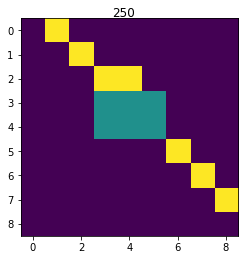

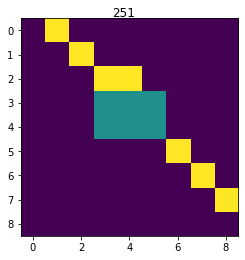

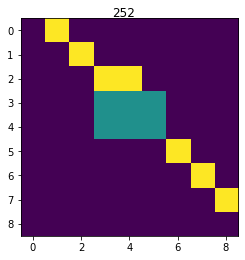

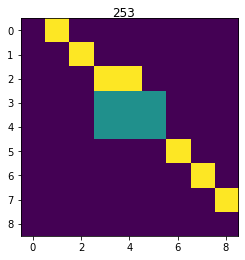

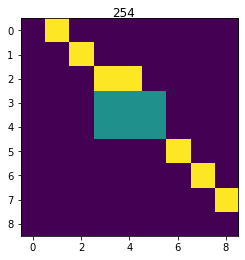

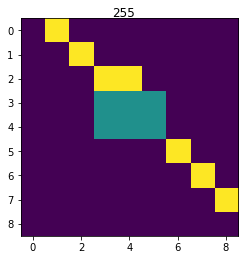

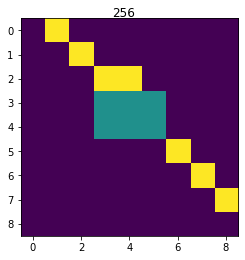

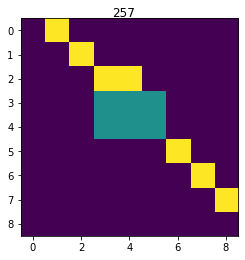

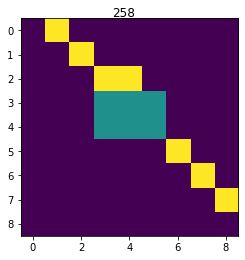

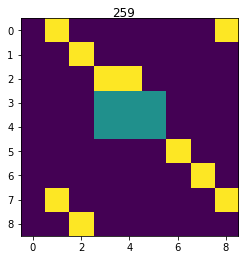

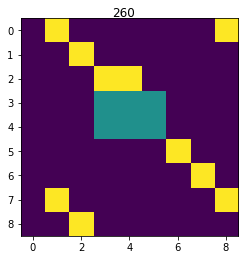

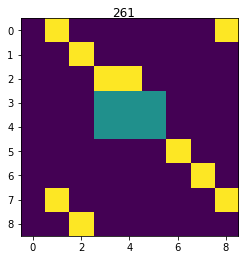

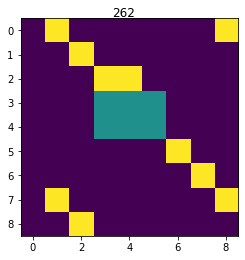

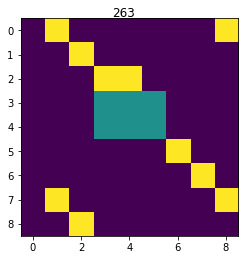

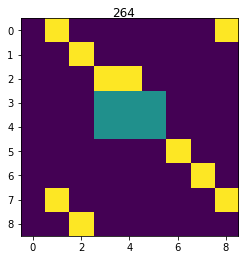

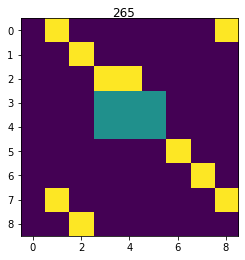

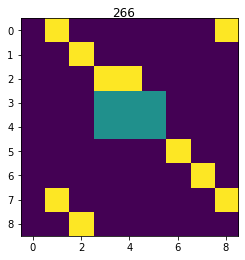

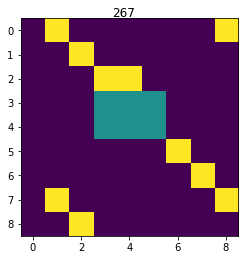

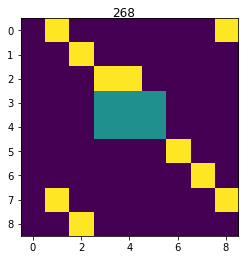

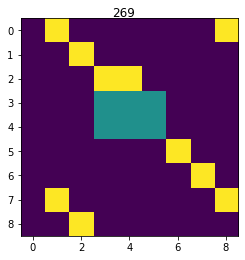

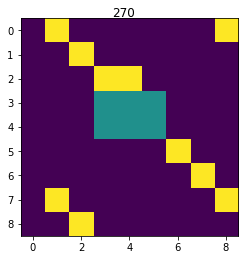

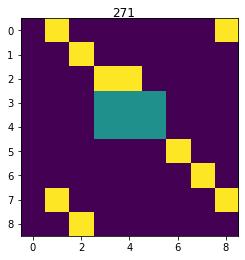

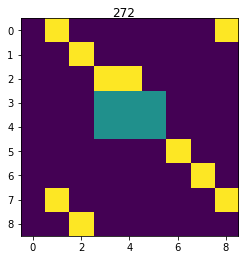

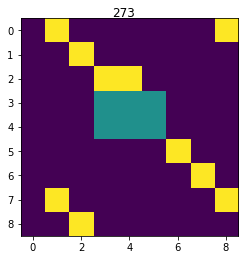

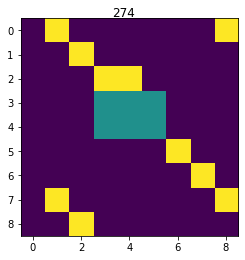

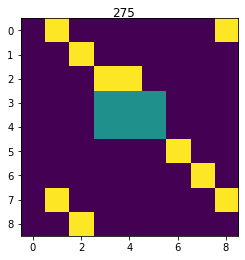

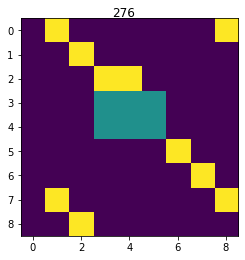

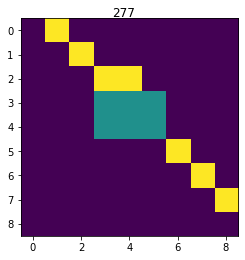

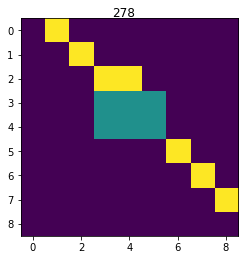

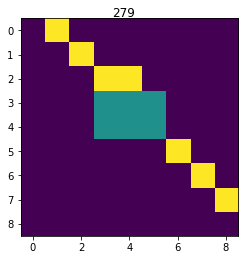

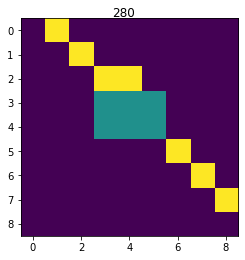

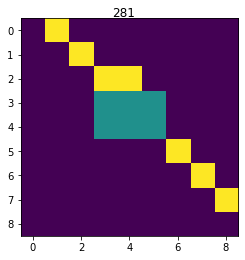

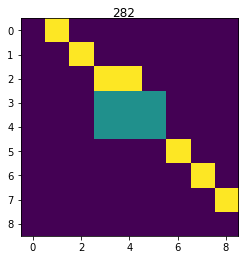

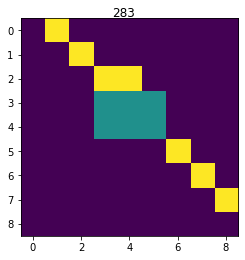

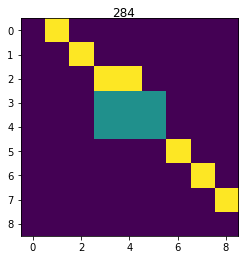

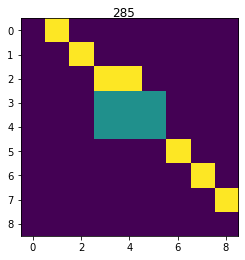

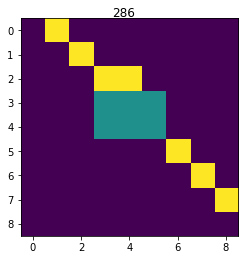

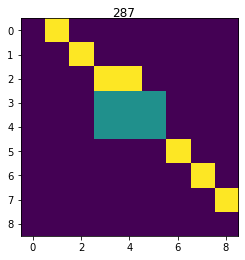

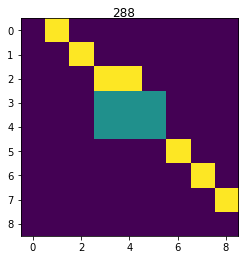

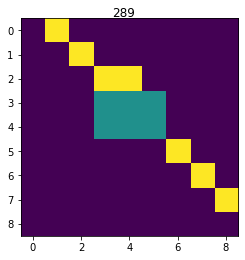

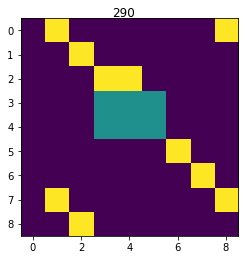

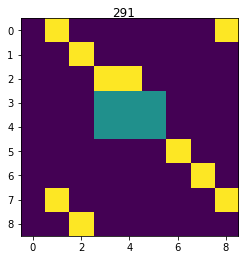

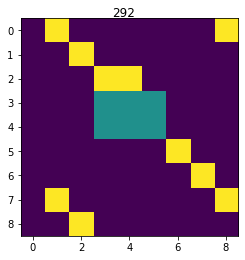

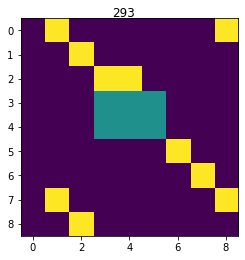

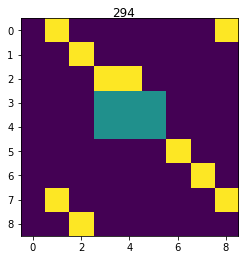

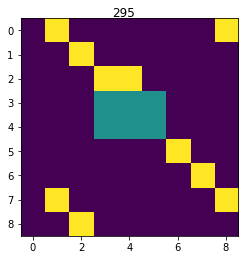

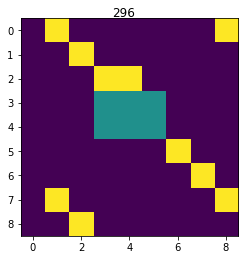

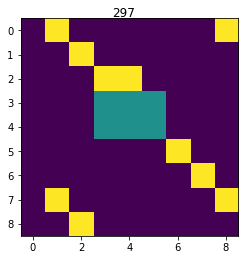

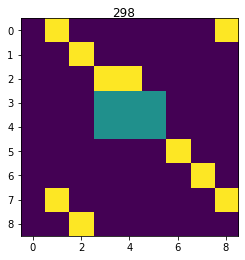

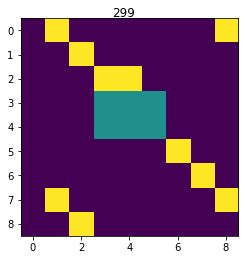

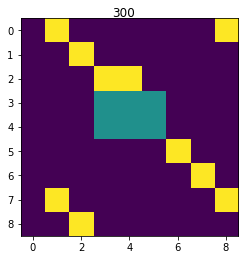

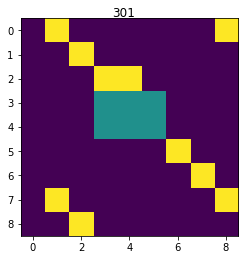

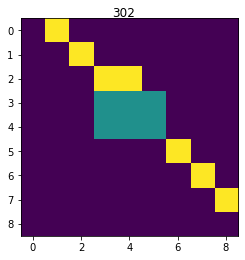

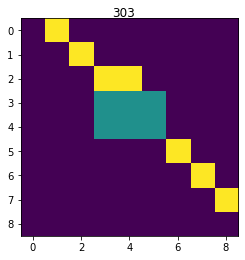

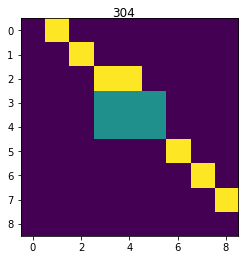

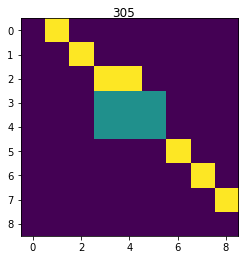

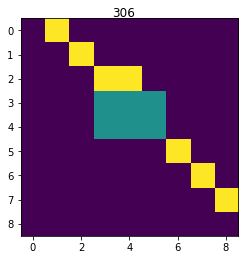

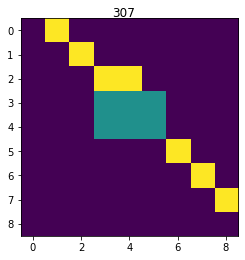

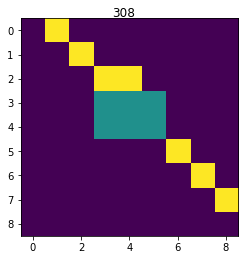

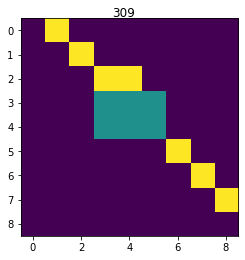

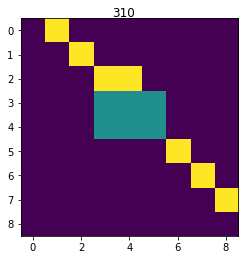

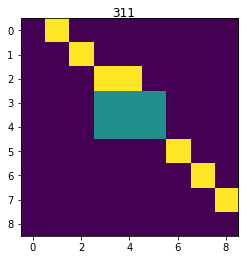

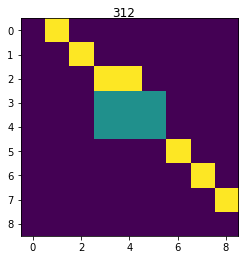

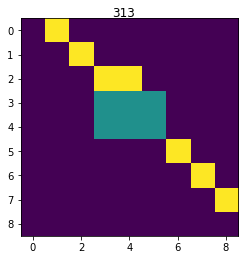

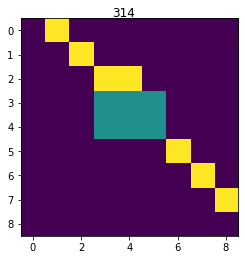

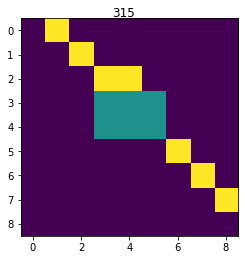

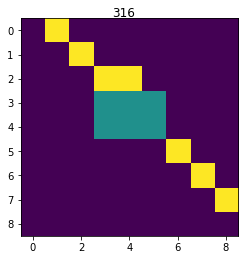

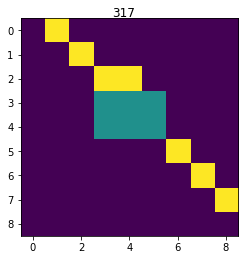

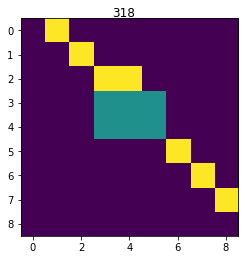

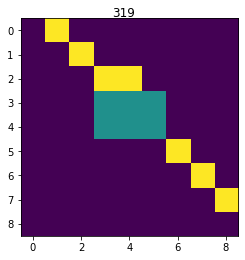

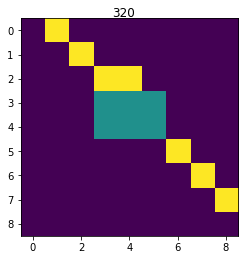

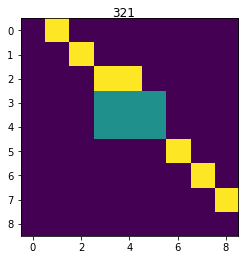

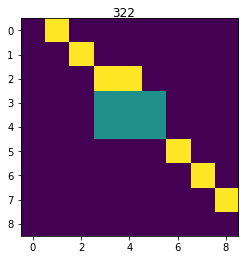

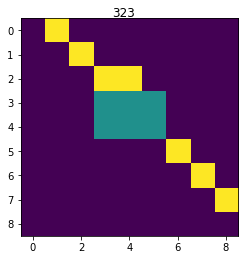

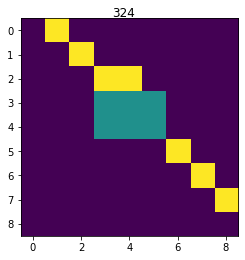

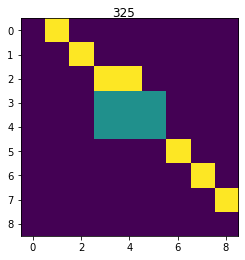

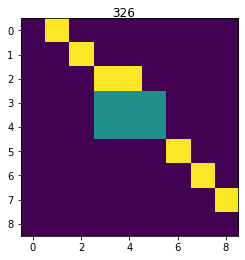

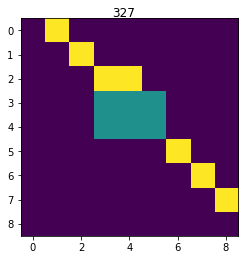

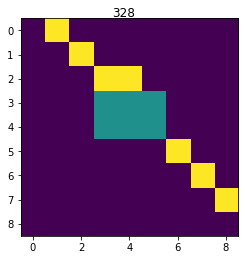

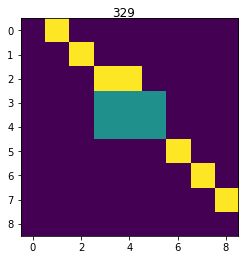

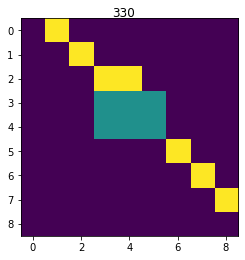

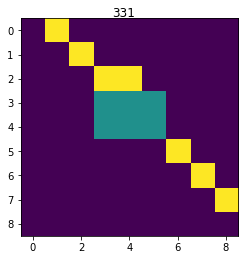

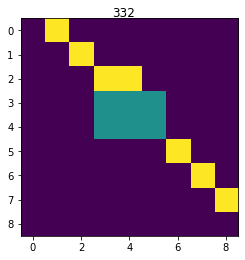

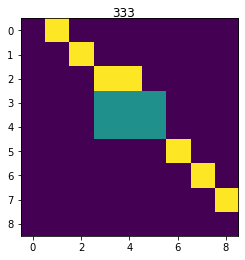

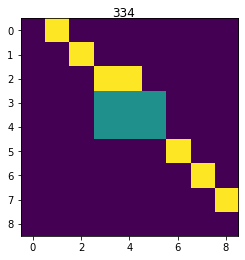

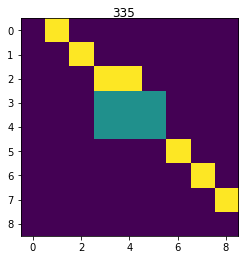

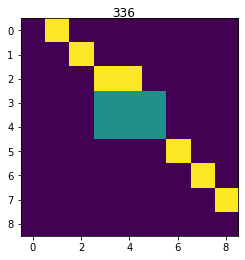

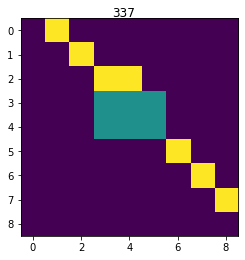

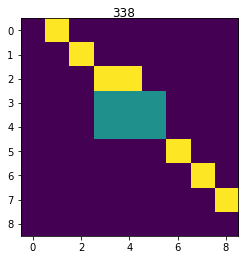

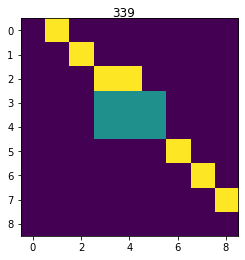

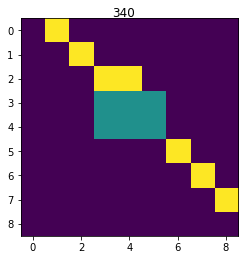

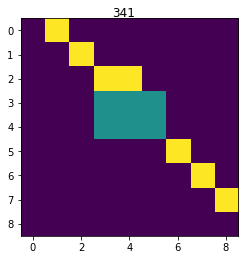

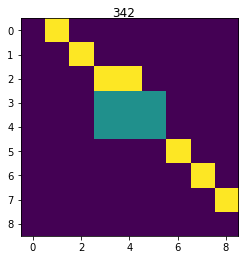

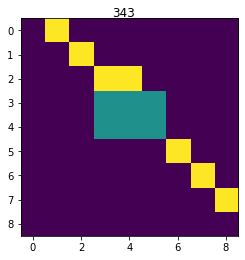

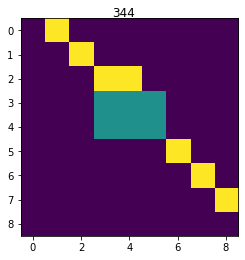

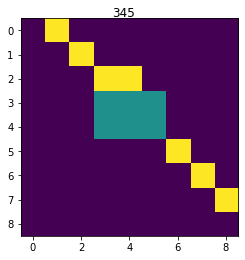

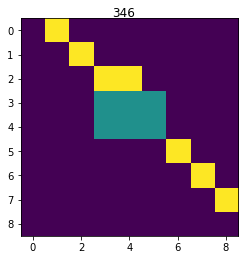

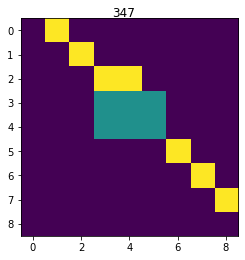

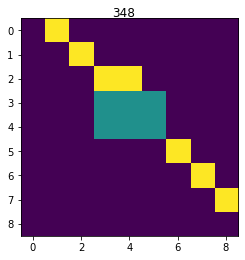

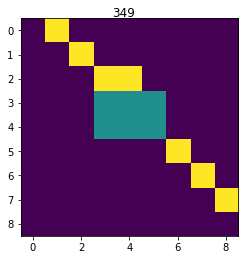

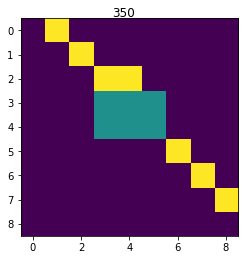

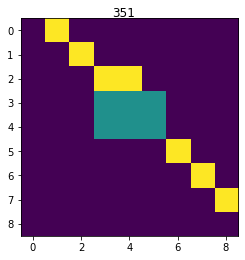

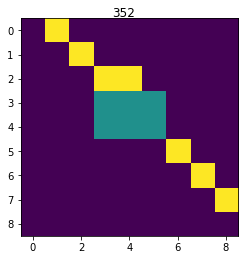

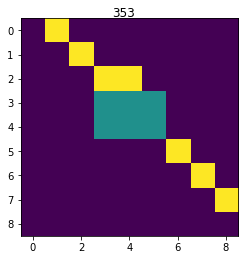

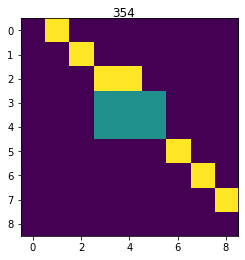

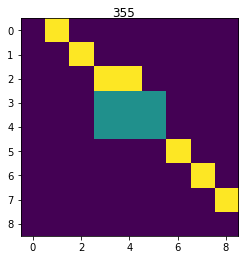

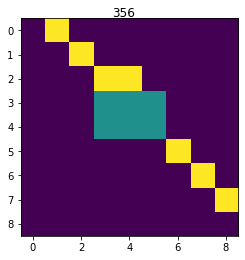

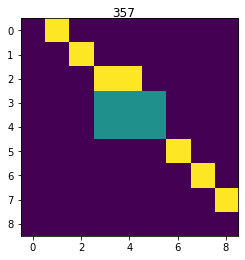

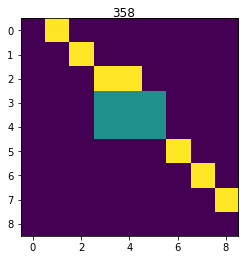

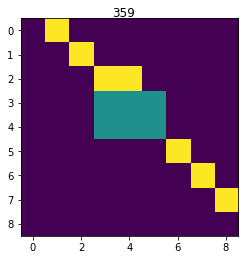

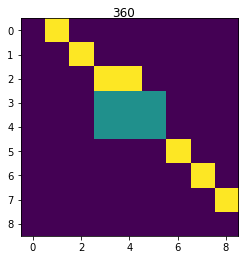

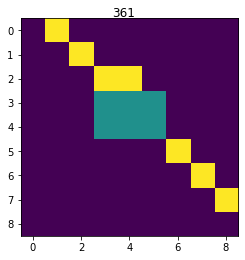

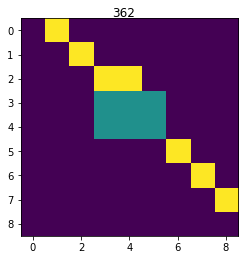

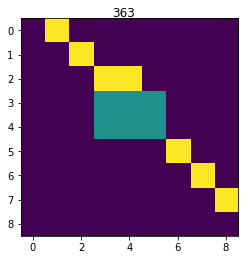

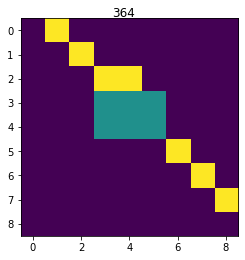

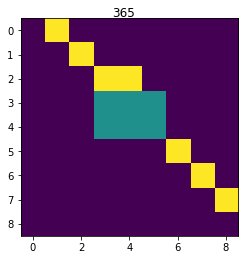

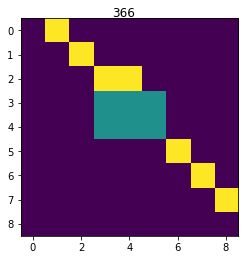

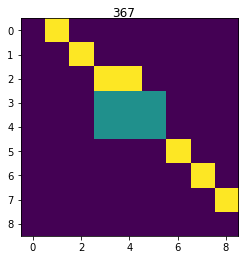

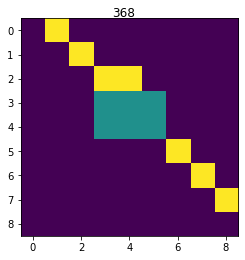

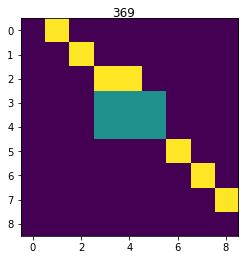

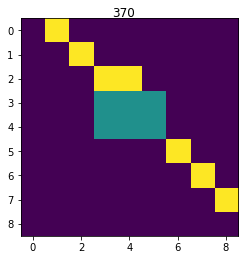

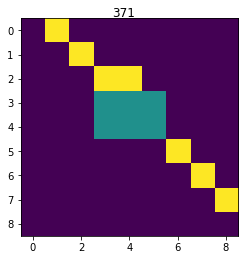

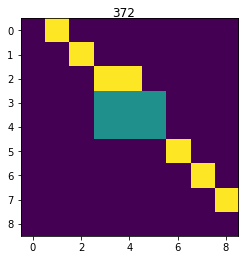

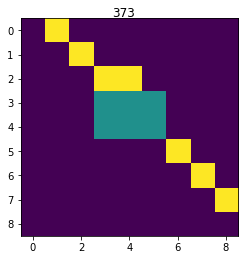

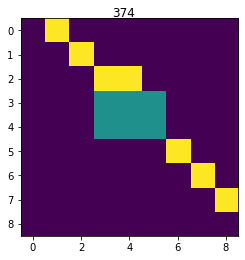

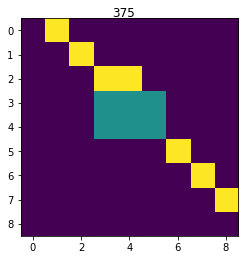

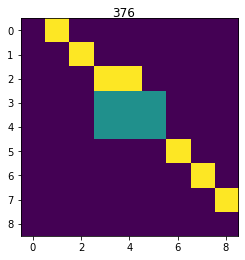

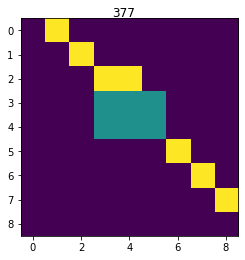

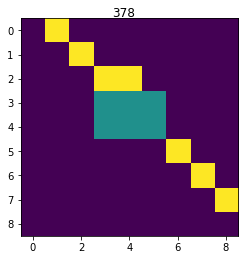

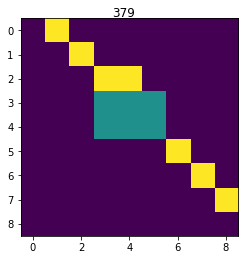

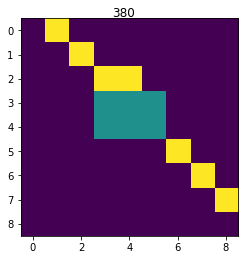

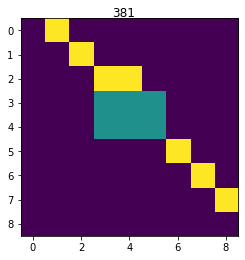

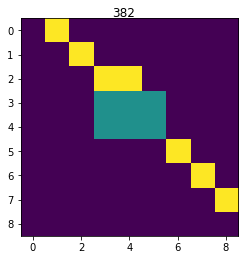

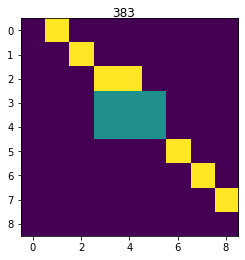

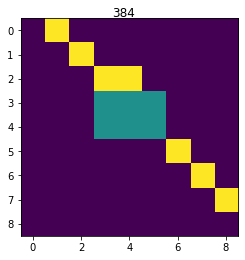

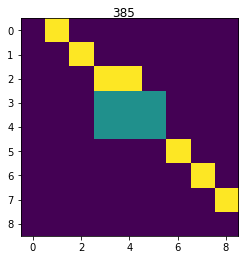

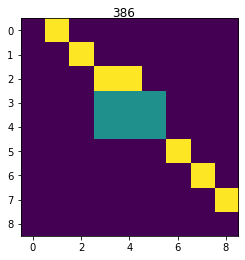

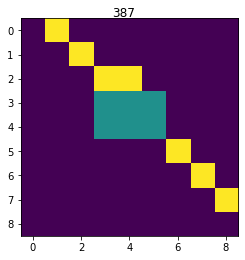

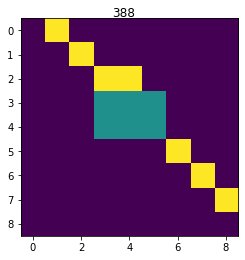

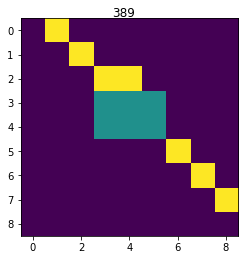

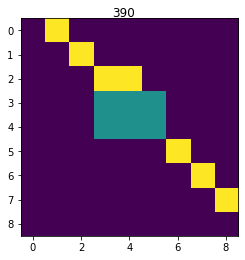

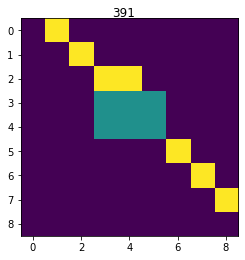

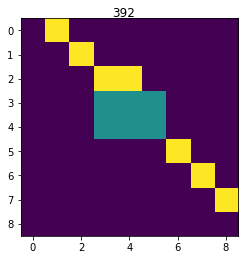

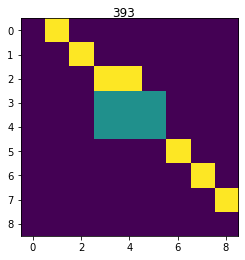

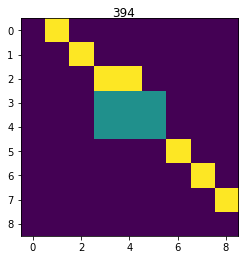

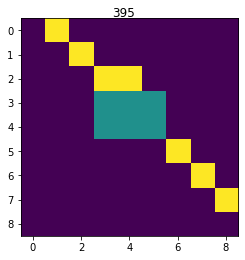

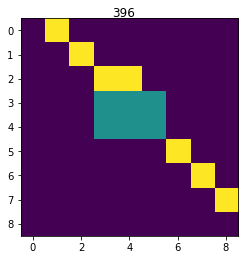

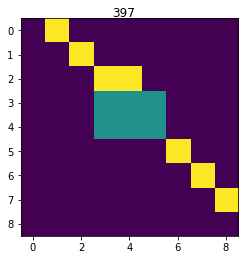

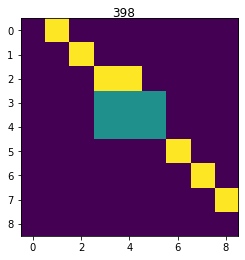

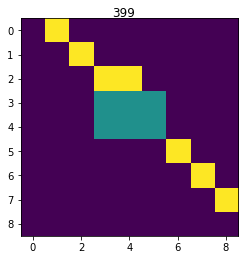

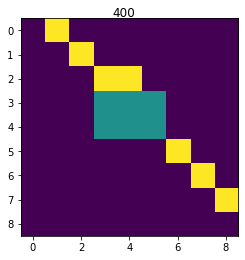

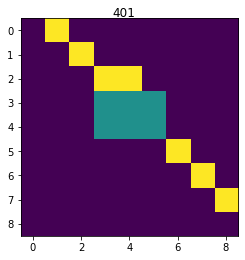

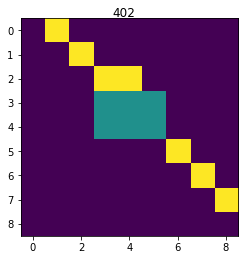

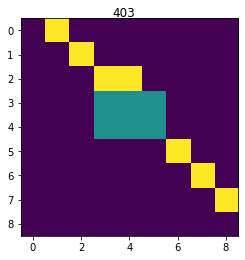

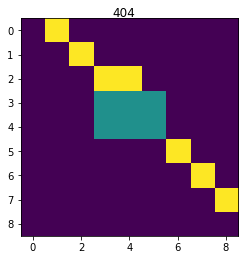

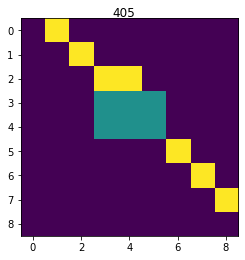

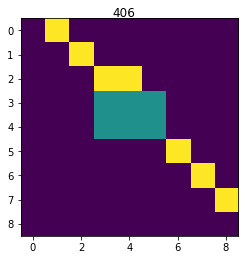

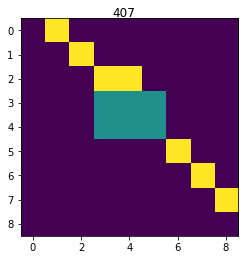

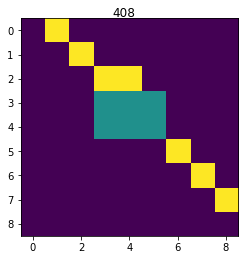

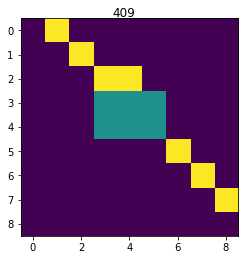

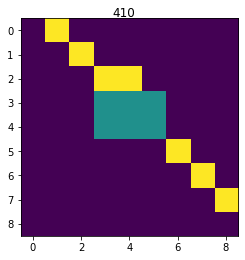

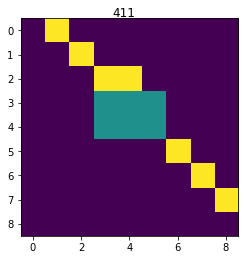

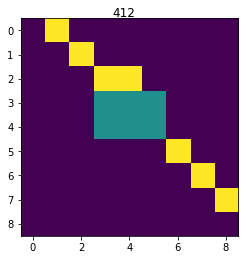

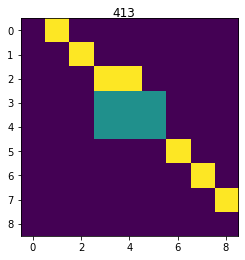

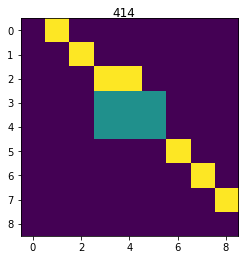

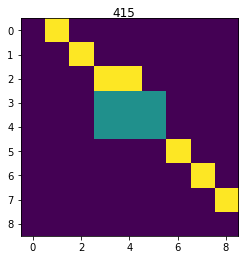

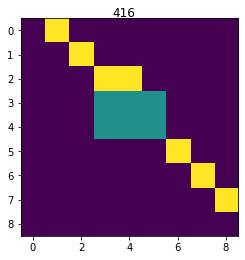

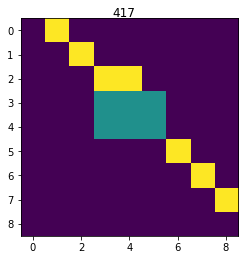

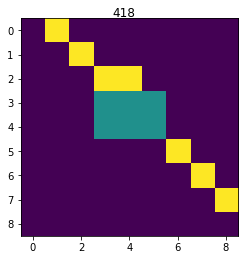

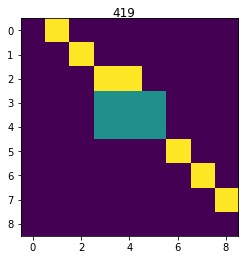

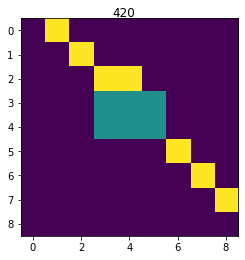

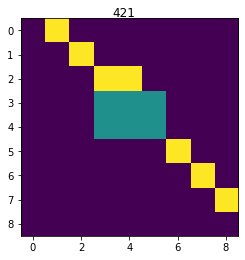

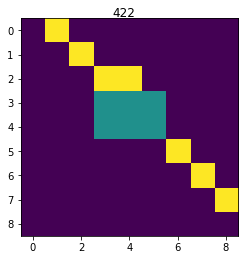

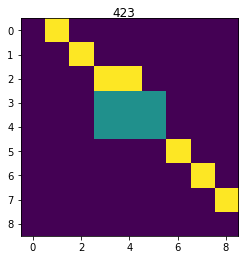

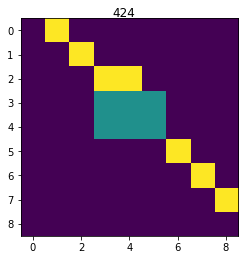

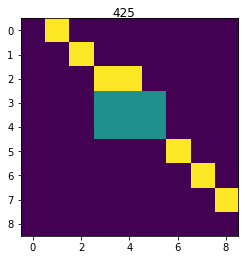

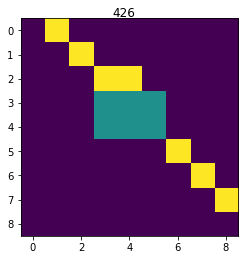

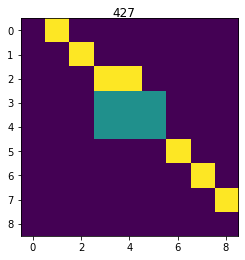

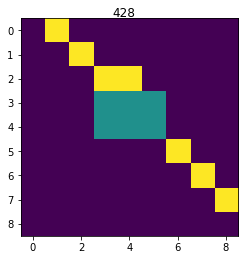

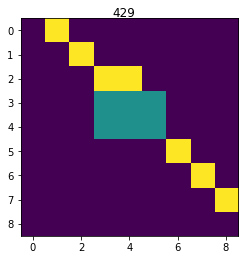

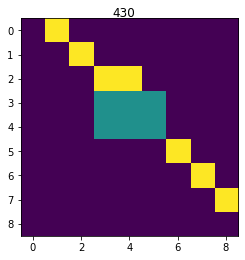

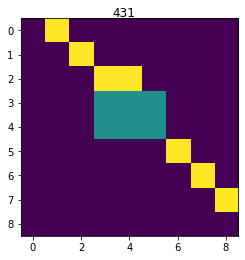

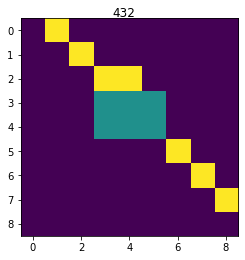

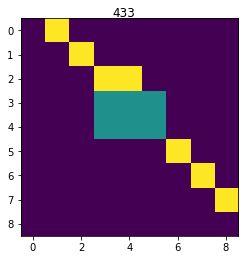

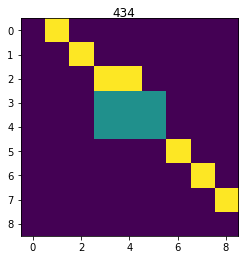

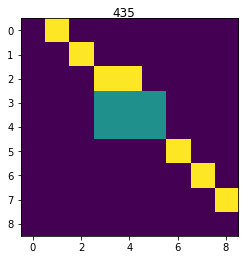

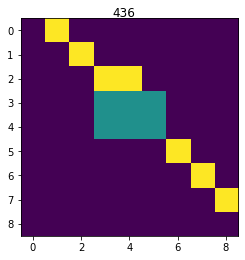

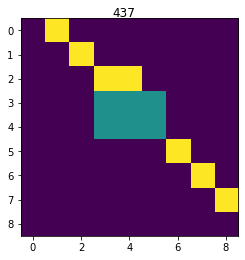

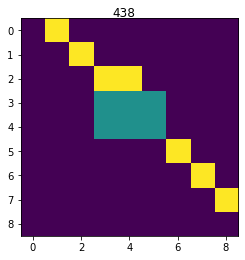

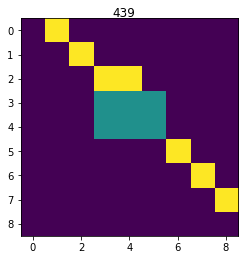

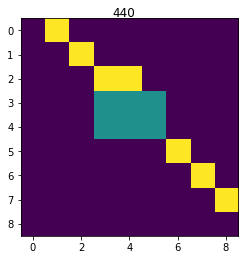

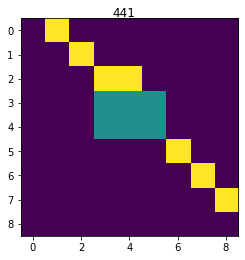

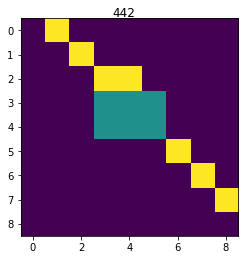

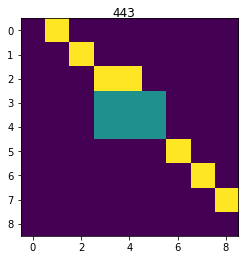

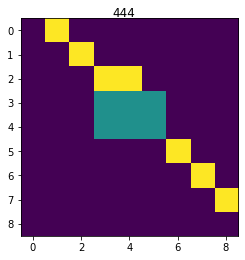

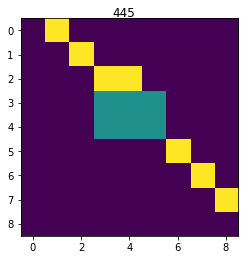

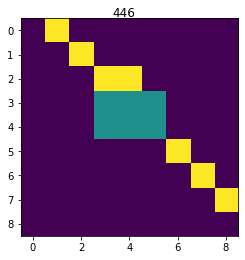

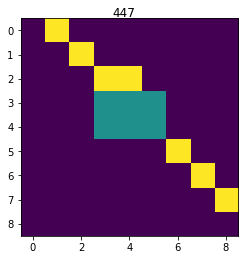

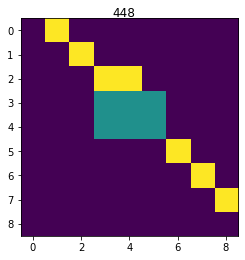

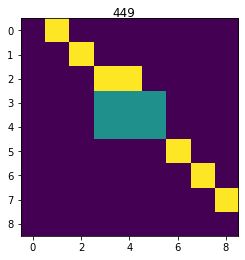

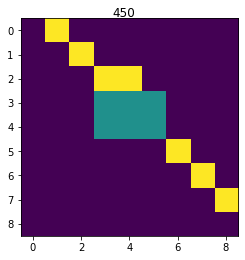

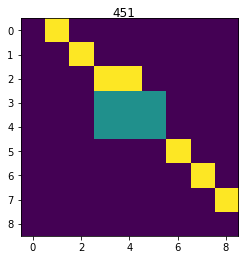

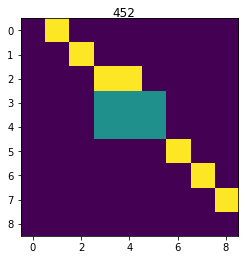

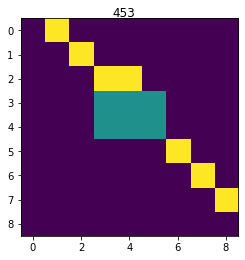

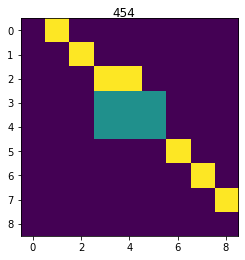

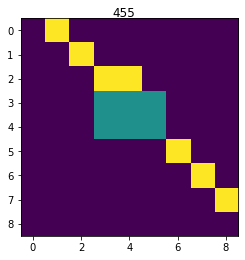

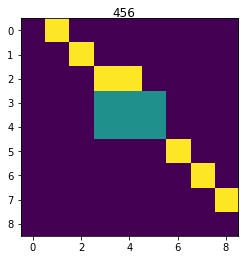

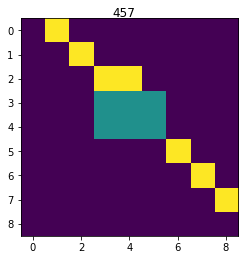

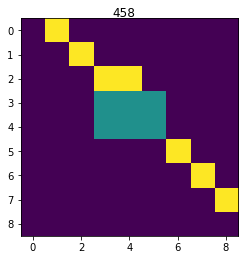

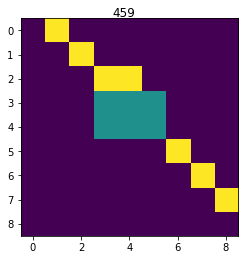

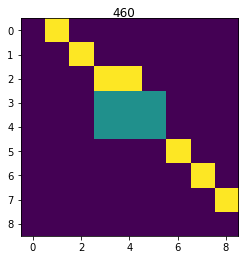

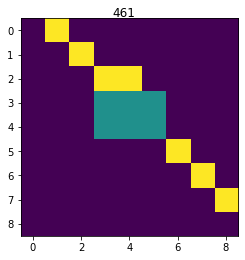

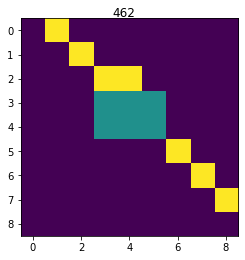

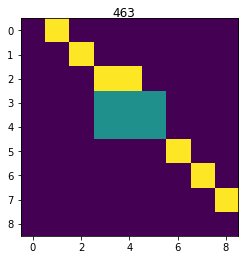

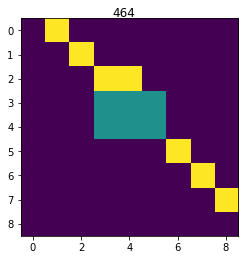

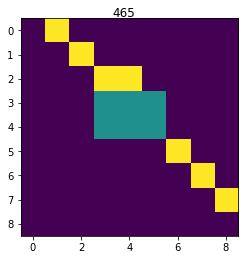

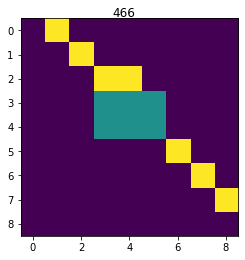

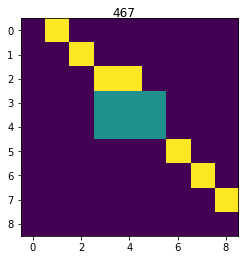

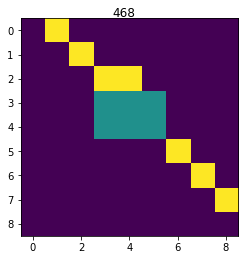

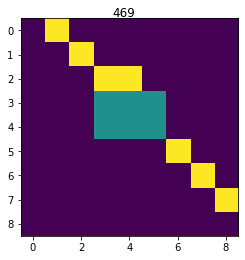

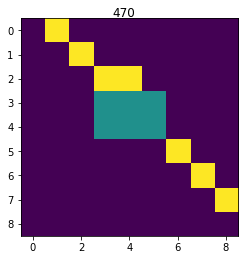

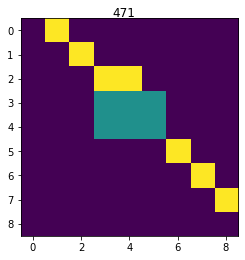

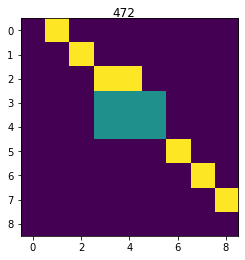

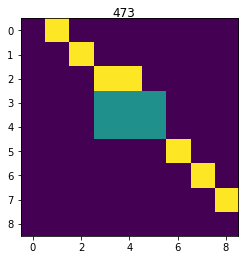

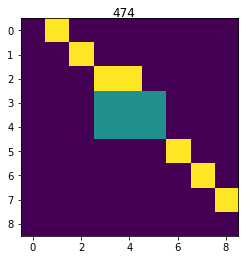

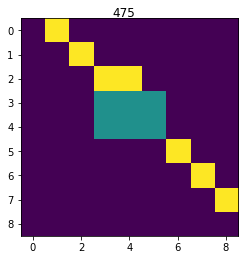

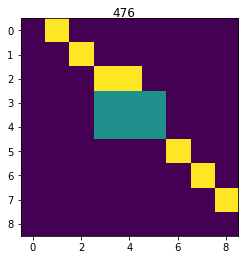

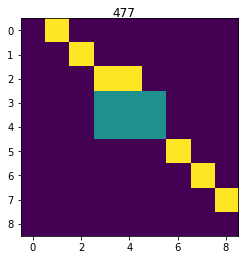

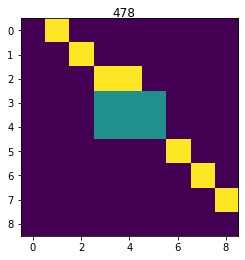

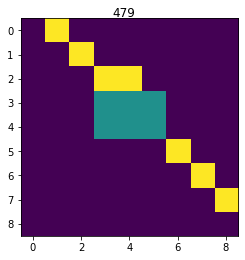

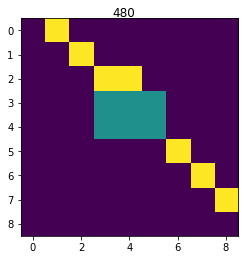

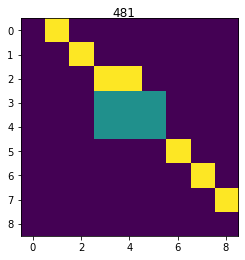

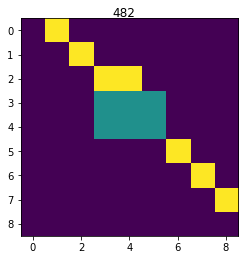

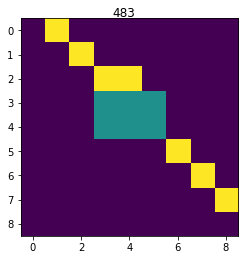

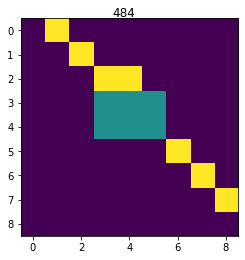

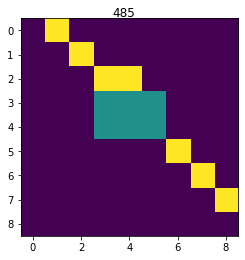

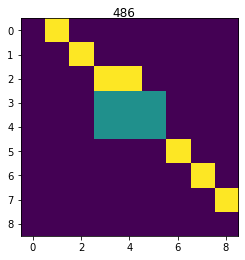

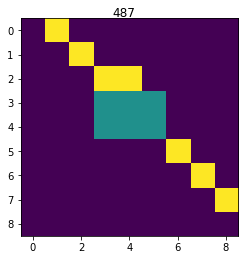

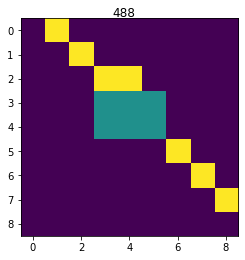

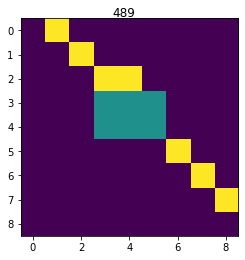

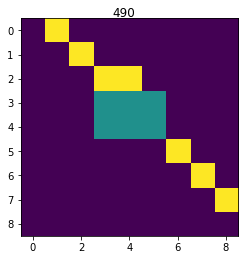

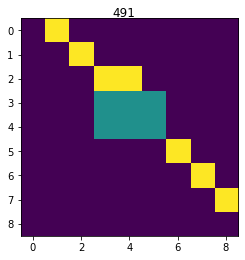

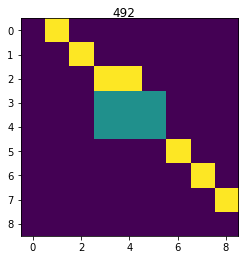

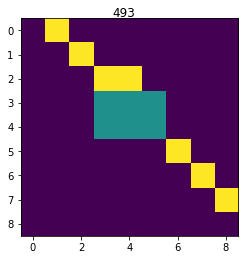

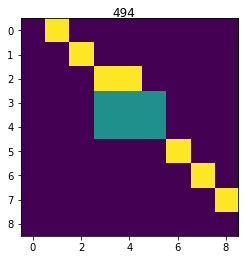

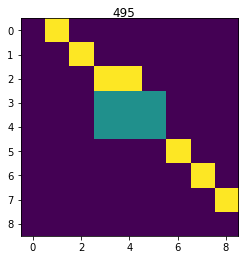

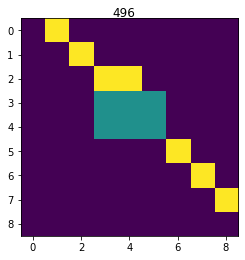

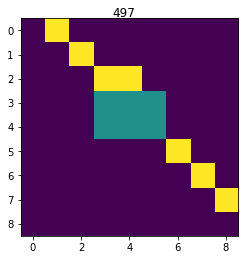

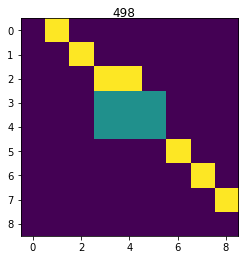

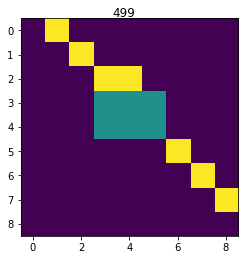

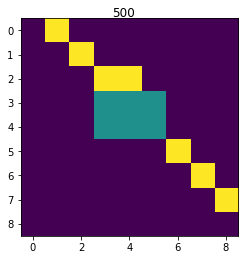

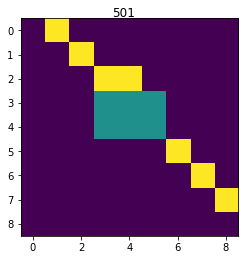

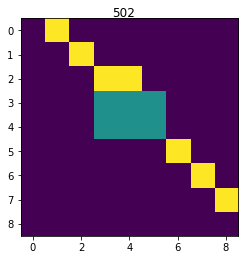

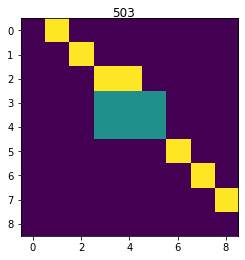

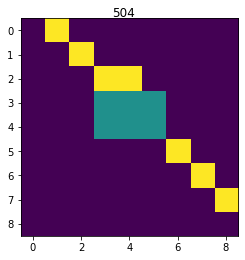

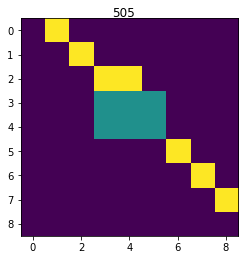

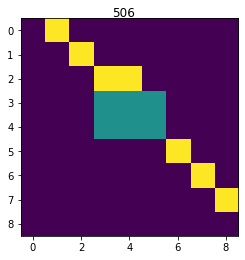

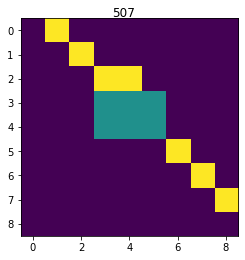

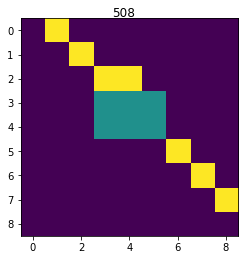

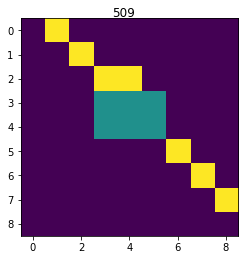

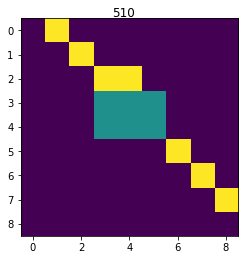

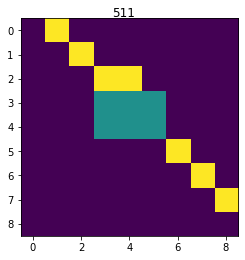

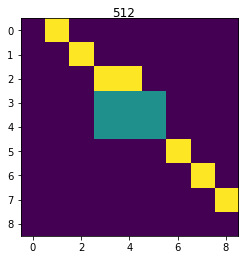

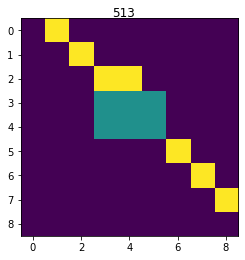

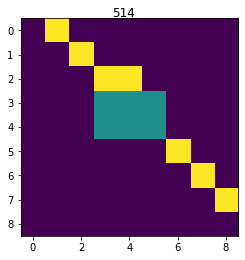

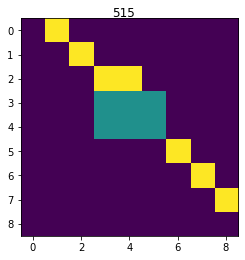

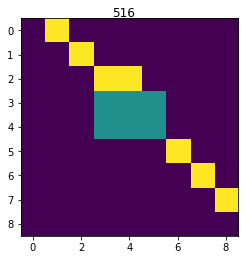

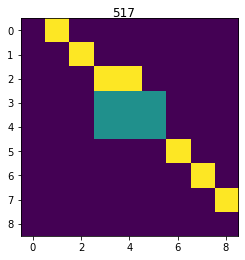

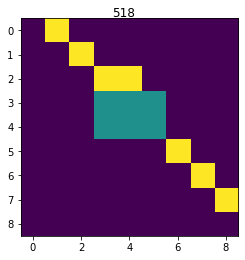

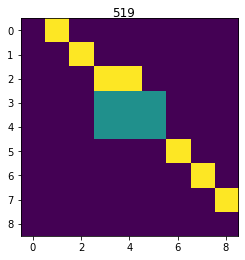

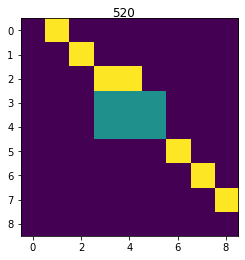

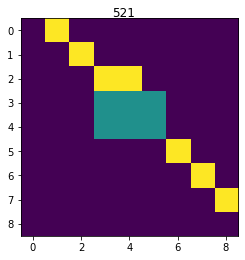

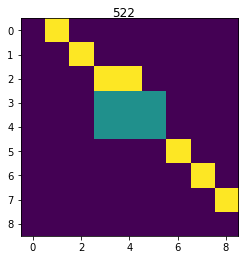

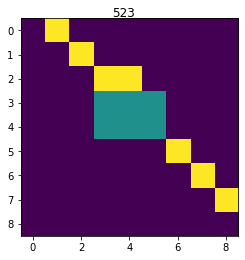

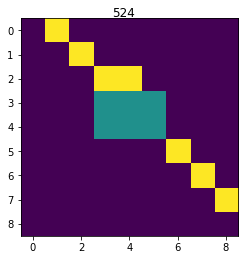

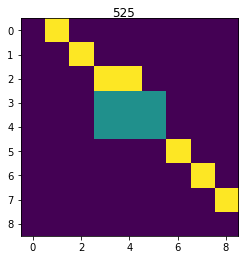

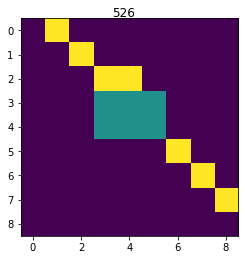

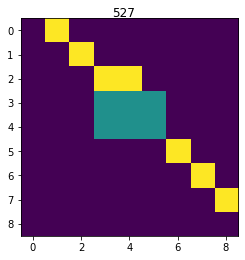

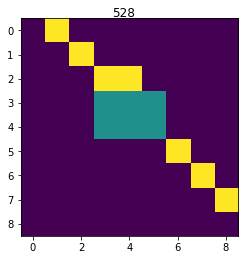

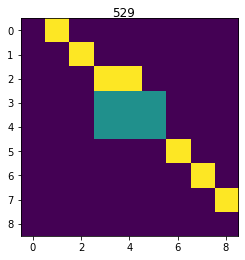

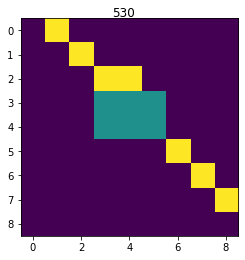

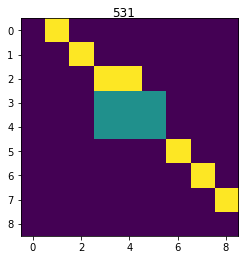

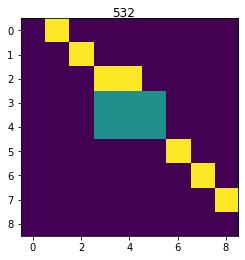

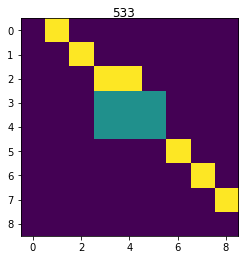

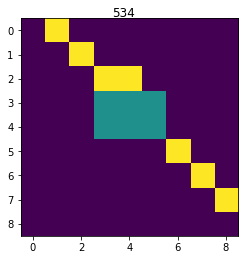

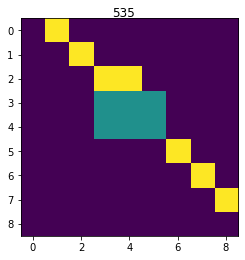

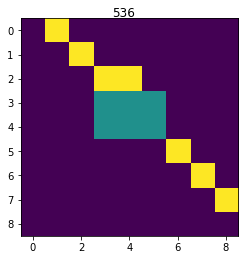

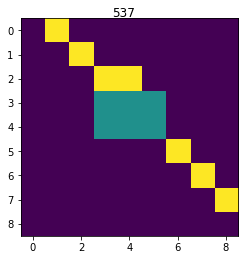

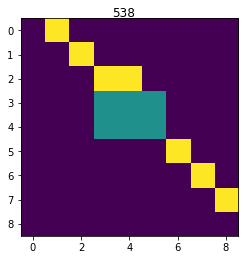

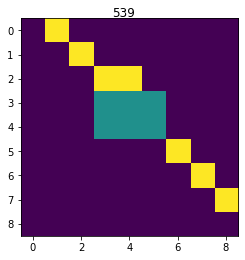

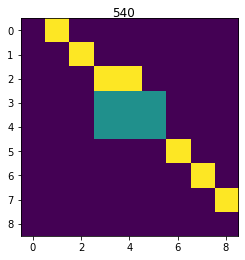

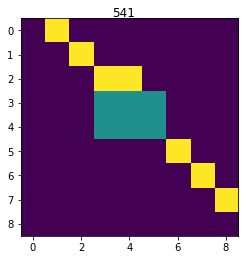

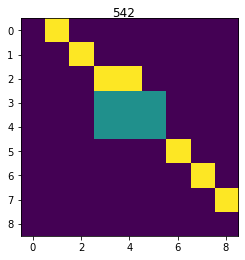

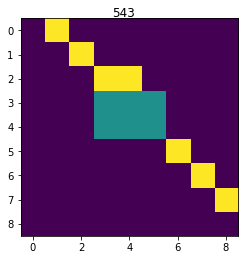

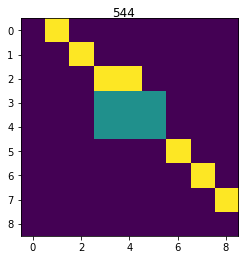

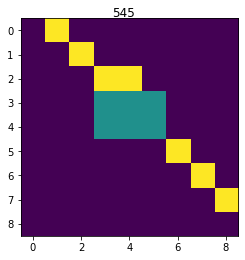

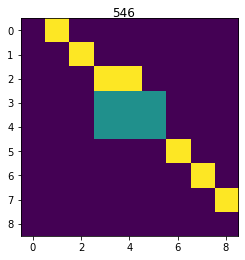

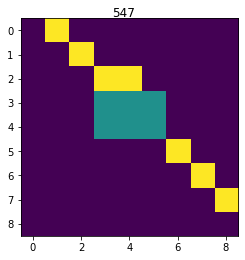

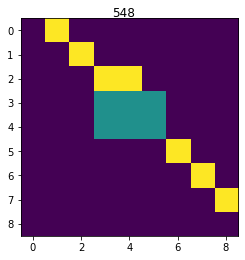

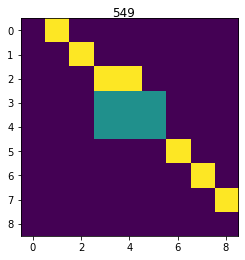

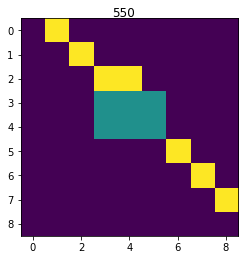

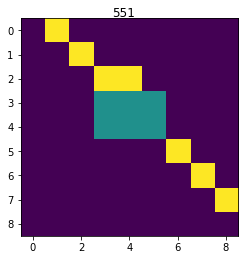

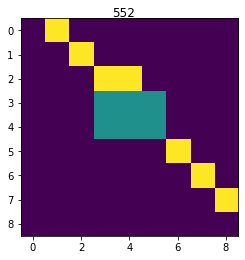

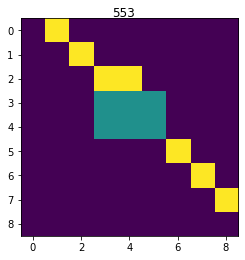

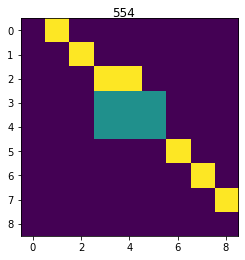

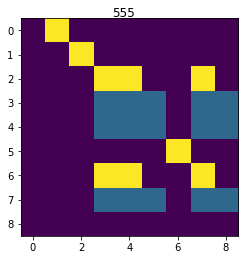

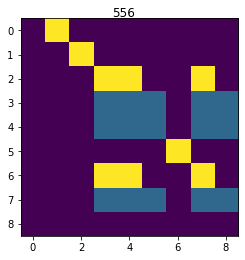

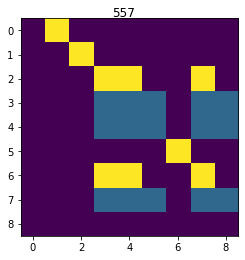

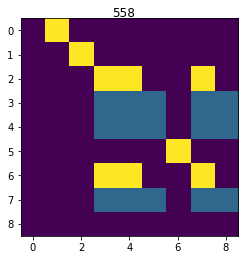

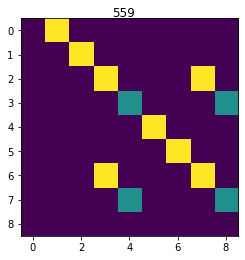

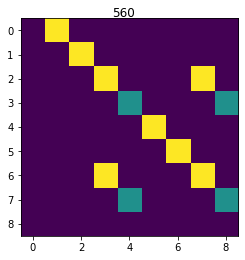

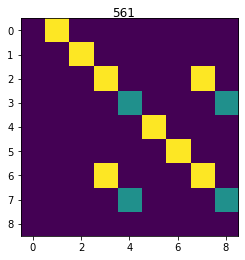

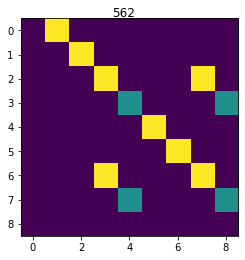

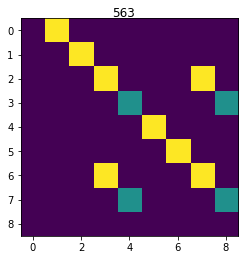

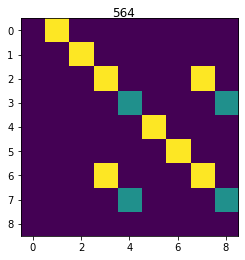

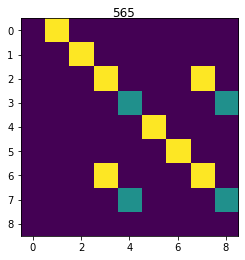

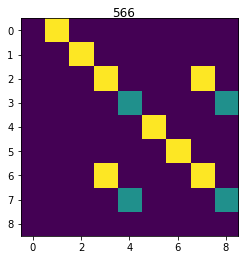

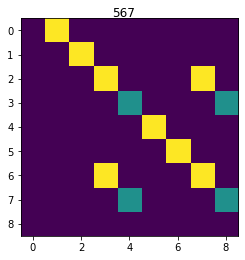

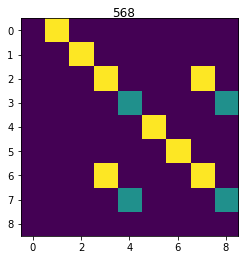

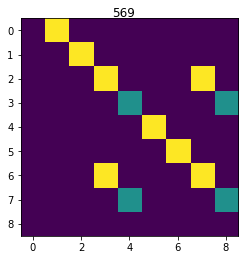

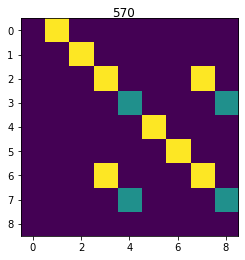

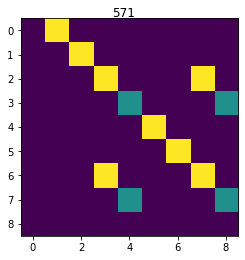

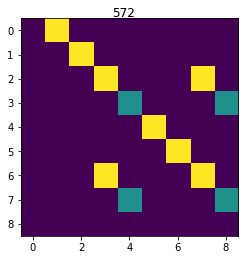

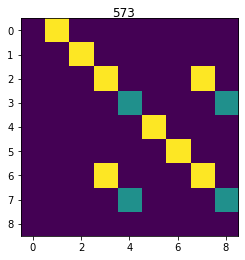

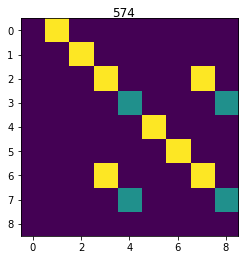

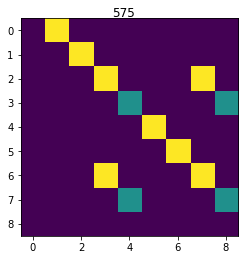

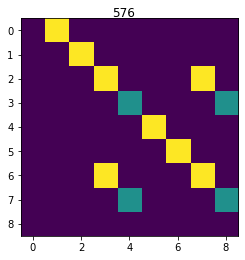

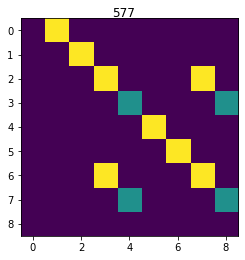

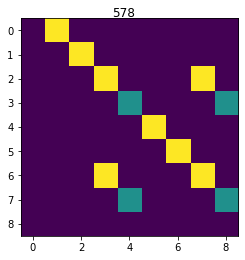

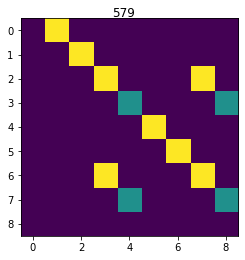

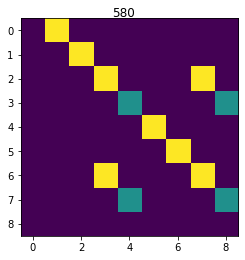

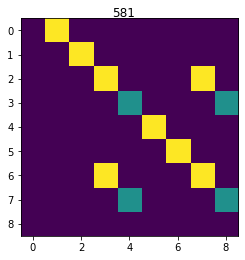

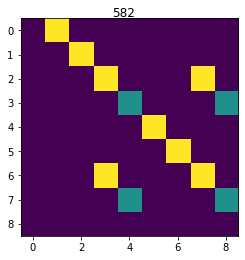

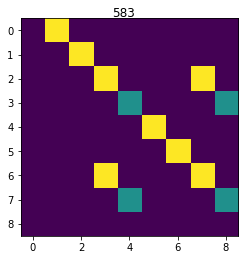

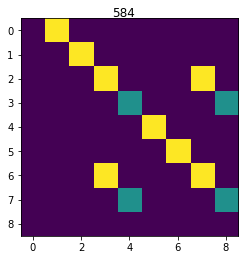

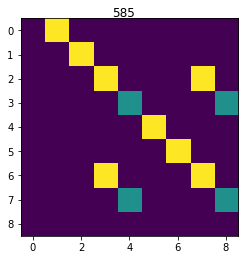

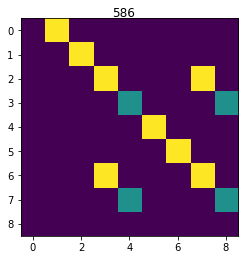

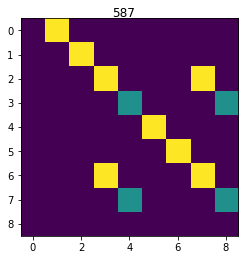

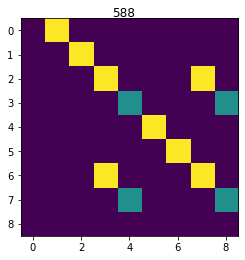

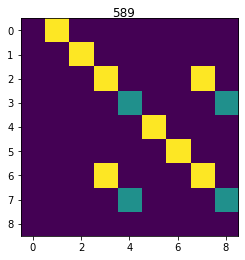

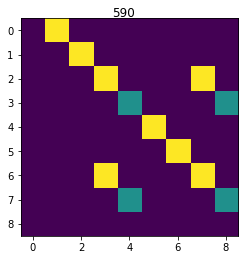

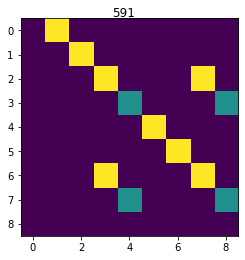

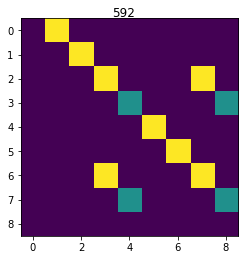

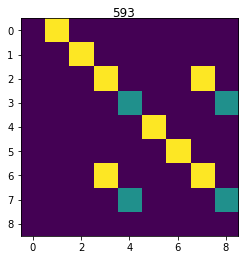

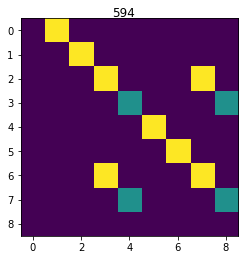

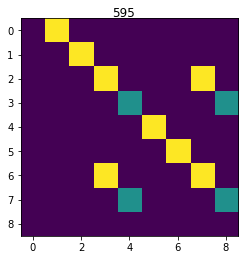

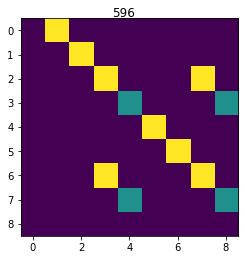

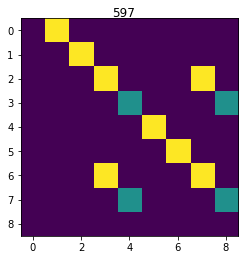

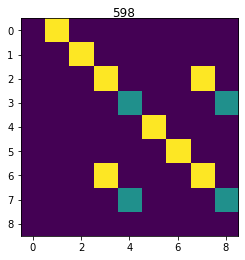

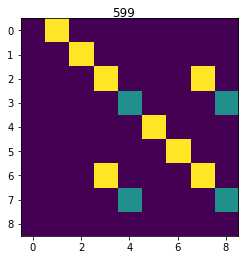

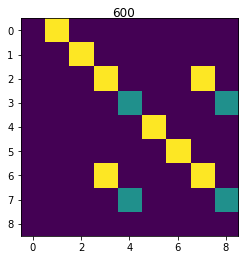

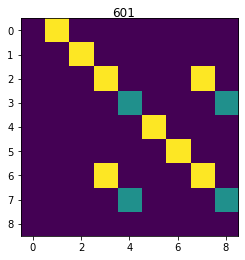

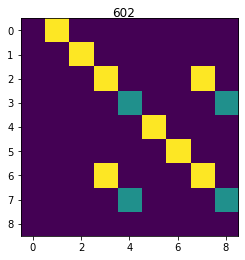

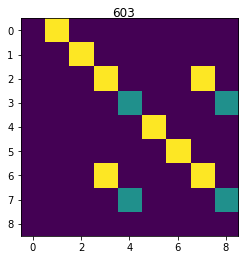

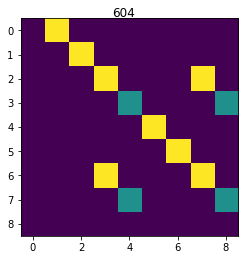

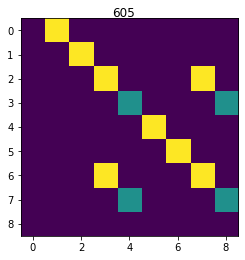

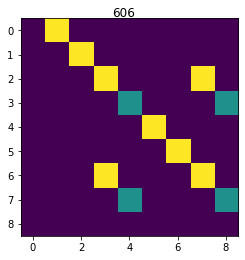

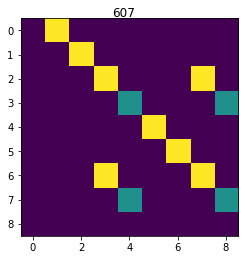

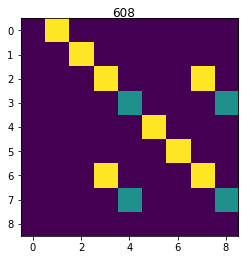

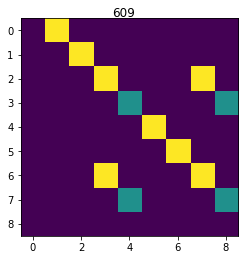

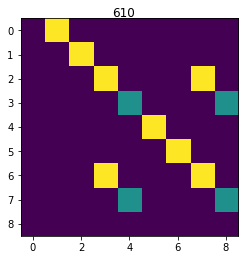

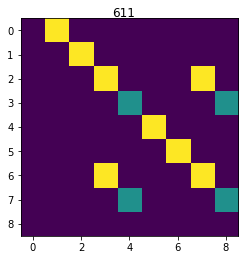

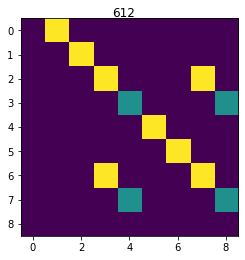

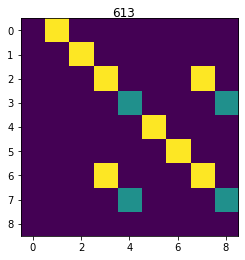

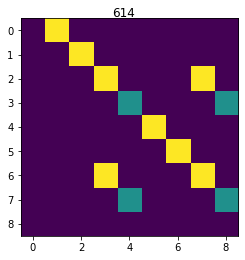

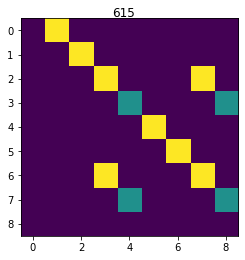

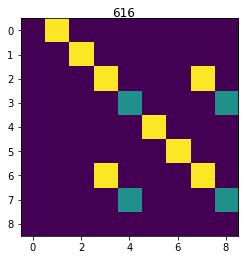

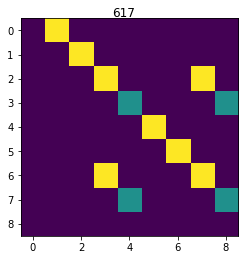

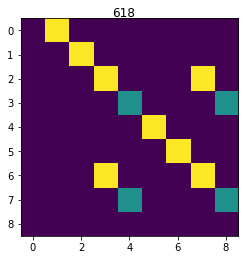

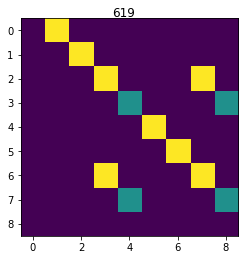

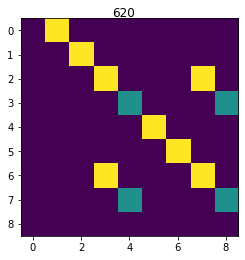

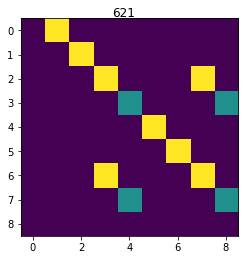

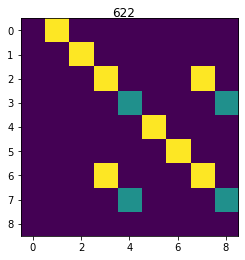

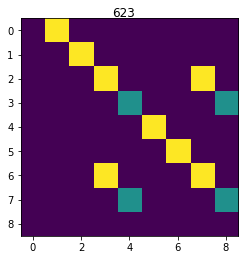

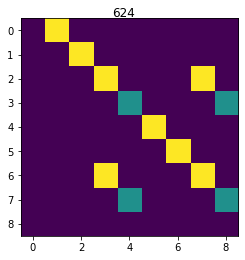

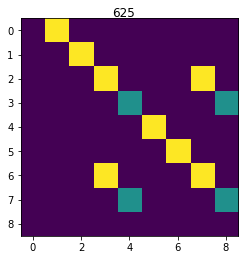

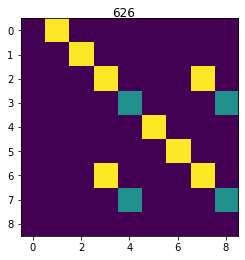

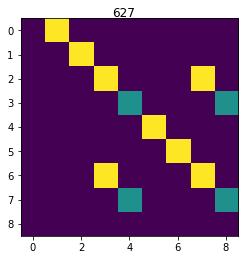

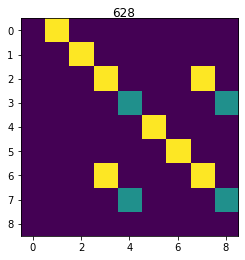

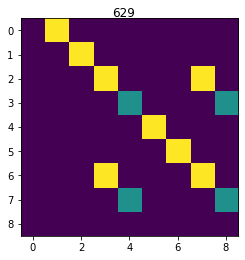

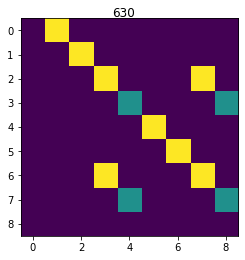

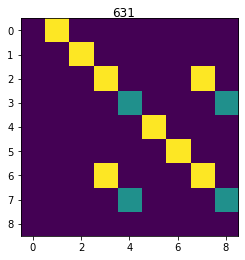

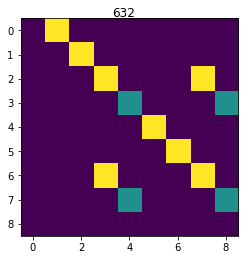

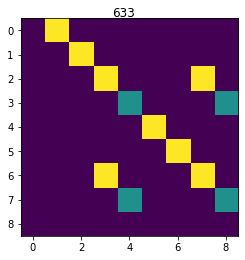

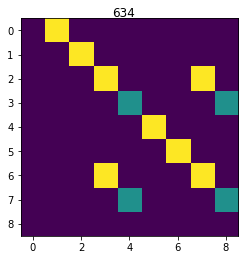

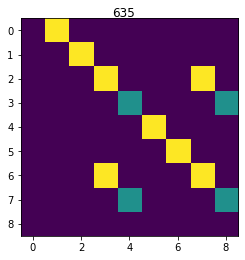

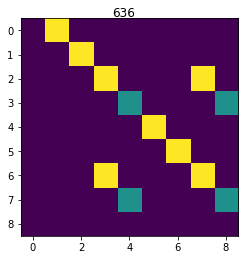

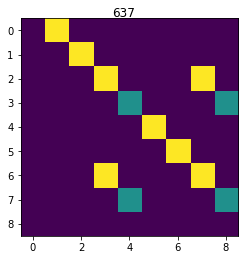

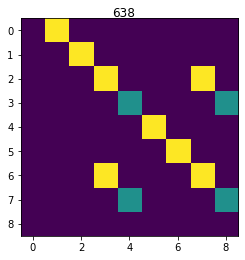

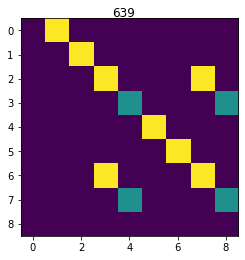

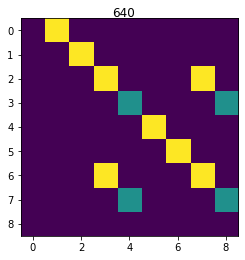

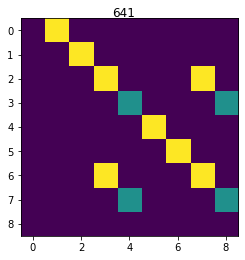

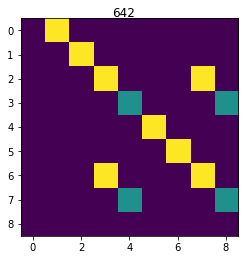

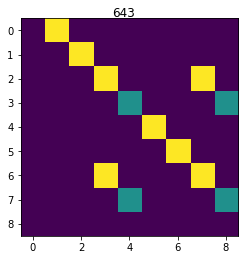

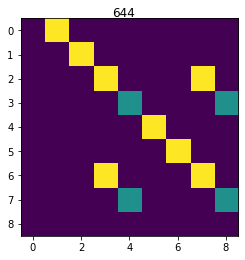

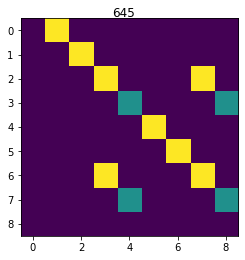

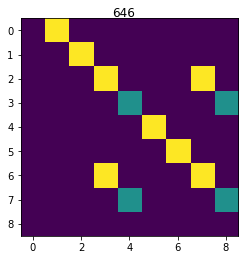

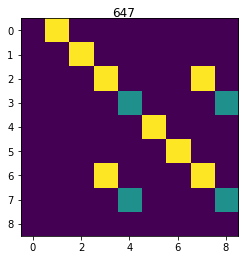

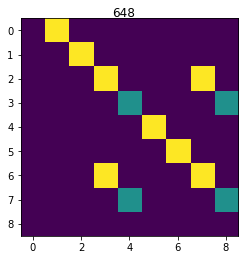

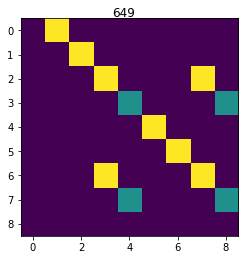

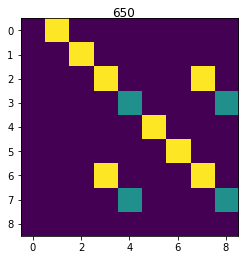

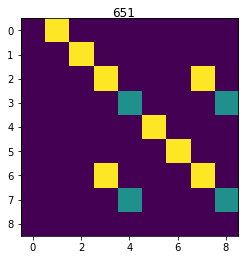

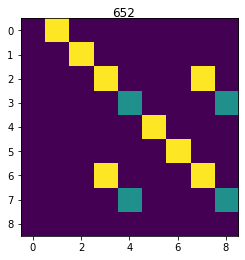

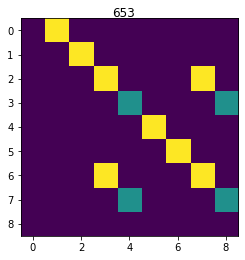

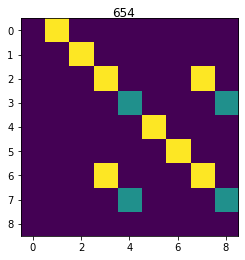

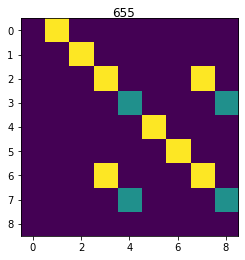

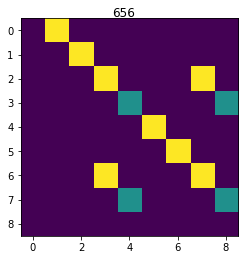

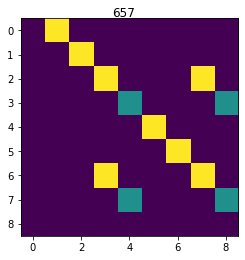

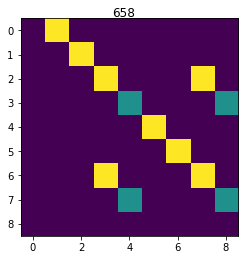

In [71]:
from pyts.image import MarkovTransitionField
import matplotlib.pyplot as plt

Xtrain = ret # both N x T time series samples
mtf = MarkovTransitionField()
im_train = mtf.fit_transform(Xtrain)
#im_test = mtf.transform(Xtest)
# plot one image
for i in range(0,659):
    plt.suptitle(i, y=0.92)
    plt.imshow(im_train[i])
    plt.show()

In [74]:
ret.head()

eventName_Duel  eventName_Foul  eventName_Free Kick  \
eventSec                                                        
4.0                  0.0             0.0                  0.0   
6.0                  0.0             0.0                  0.0   
8.0                  0.0             0.0                  0.0   
12.0                 0.0             0.0                  0.0   
14.0                 0.0             0.0                  0.0   

          eventName_Goalkeeper leaving line  eventName_Offside  \
eventSec                                                         
4.0                                     0.0                0.0   
6.0                                     0.0                0.0   
8.0                                     0.0                0.0   
12.0                                    0.0                0.0   
14.0                                    0.0                0.0   

          eventName_Others on the ball  eventName_Pass  \
eventSec                                                 
4.0                                0.0             0.0   
6.0                                0.0             0.0   
8.0                                0.0             0.0   
12.0                               0.0             0.0   
14.0                               0.0             0.0   

          eventName_Save attempt  eventName_Shot  
eventSec                                          
4.0                          0.0             0.0  
6.0                          0.0             0.0  
8.0                          0.0             0.0  
12.0                         0.0             0.0  
14.0                         0.0             0.0

In [ ]:
openExample('images/CreateFilterAndApplyItExample')